# Building an Understanding of How Nodes in Neural Networks Work
## Gary Lawson - 12 April 2019
***

### 1.0 Abstract
***

Neural networks have become a powerful tool in the world of artificial intelligence but are largely a black box to most.  To develop be able to build and interpret these models, it is important to have a solid understanding of how the hidden layers neural networks work, and what exactly the nodes in this hidden layer are identifying.  This project aims at using Python to break down a Keras neural network and build this understanding. 

### 2.0 Introduction
***

In the realm of machine learning (ML), neural networks have become king due to their ability to allow nodes within the network to learn information about input data and output predictions that have shown cutting-edge accuracy when compared to known outputs.  And while these models are becoming more and more common within the ML community, their internal workings remain a mystery to the majority of people who recognize the term.  The complicated nature of using weights and biases from the connections to each node from previous layers, to activation functions that provide input to connected nodes in future layers, to the backpropogation method that uses gradient descent to find the best possible set of weights and biases for each node to maximize the predictive power of the model have all cummulated in a very confusing network of calculations that quickly becomes hard to follow.

The intent of this exercise is to begin to untangle what is actually happening within a simple neural network.  Using a basic alphabet image dataset and a single layer neural network, this project will aim to achieve a few goals: 1. Explore neural nets to get a fundamental understanding of how they work using a simple problem, 2. Examine alternateive neural network structures and configuration, 3. Learn how to fit a neural network directly in Python using Keras.  4. Develop an understanding of what the hidden layer nodes are responding to. By acheiving these goals, a firm understanding of neural networks should be gained and will prepare the way for building and understanding deep neural networks.

To acheive the goals of this project, a Jupyter Notebook will be used to implement Python code and document findings. To support the quick and efficient development of the neural networks in this exercise, Keras was used.  Keras is a high-level API that can use TensorFlow in the background, which was the configuraiton for all neural networks developed here. 

### 3.0 Literature Review
***

For coding examples and a deep understanding of how each of the components of a neural network function, Géron (2017) and associated code examples was extremely helpful.

Géron, A. (2017). *Hands-on machine learning with Scikit-Learn and TensorFlow : concepts, tools, and techniques to build intelligent systems*. Sebastopol, CA: O'Reilly Media. ISBN: 978-1491962299 

For an understanding of the mathematics behind forward and backpropagation, Maren (Draft 2019) was helpful.

Maren, A. (Draft 2019). *Statistical Mechanics, Neural Networks, and Artificial Intelligence*. Not Yet Published.

Blogposts by Brownlee (2017) and Zhang (2017) were referenced to help create a visual chart of the neural network.

J. Brownlee.  (2017, December 13). How to visualize a deep learning neural network model in Keras.  Retrieved from https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/

Y. Zhang. (2017, December 2). How to plot keras models. Retrieved from https://medium.com/@zhang_yang/how-to-plot-keras-models-493469884fd5

Stackoverflow forums were referenced to help extract hidden layer information from neural networks.

GoingMyWay. (2017, January 18). Keras, how to get the ouput of each layer?  Retrieved from https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer

### 4.0 Methods
***

To meet the 4 objectives of this project, I began with an exploratory data analysis (EDA) and proceeded to conduct 5 experiments, each supporting the 4 objectives.  The EDA is used to set up the project for all future coding, import and prepare the data for use in modeling, explore the data, and visualize the images that are being studied.  The first experiement compares several different models with varying number of nodes, hidden layer activation functions, output activation functions, loss functions, and optimization functions.  The second experiment attempts to visualize what hidden layer nodes are activiating for each letter that is input to the model.  The third experiment attmpts to visualize what output layer nodes are activiating for each letter that is input to the model.  The fourth experiment looks at comparing hidden layer node activiations to determine which letters the network is finding similar.  In the fifth experiment, the hidden layer outputs will be plotted as a new image to attempt to identify what the model is identifying.

#### 4.1 Exploratory Data Analysis
***

As an initial step in the EDA, it is important to review the data to get an understanding of what it consists of.  Methods to accomplish this include looking at the number of obserations (rows) and features (columns) that are available.  Taking a look at the first few observations gives you a feel for how the data is structured, and what the different features may be.  Also, the data should be evaluated for missing values, which if present, may need to be addressed through data cleaning.  Last, looking at basic statistics such as mean values, minimums, maximums, and quartiles helps to provide insight into the distribution of the data.

Once the data is reviewed, it is beneficial to understand what the data is representing.  In this case we are working with image data, so creating visualizations to see what the data represents is important.  To prepare the data for plotting and use in neural network modeling, the data needs to be prepared in a fashion that supports both objectives.  Here, we will partition the data into input data (X_train) and response variable data (y_train) and convert both into arrays.  Also, One-Hot encoding will be used to prepare the target variable for use in a Keras neural network.  A test dataset will not be created in this project since our objectives revolve around understanding how the model trains and learns. 

In [1]:
# Import packages

# Import base and prepocessing packages
import numpy as np # for creating and working with arrays
import pandas as pd # for creating and working with dataframes
from sklearn.preprocessing import LabelBinarizer # for One Hot Encoding
import time # for recording times on model runs
import pickle  # used for dumping and loading binary files

# Import NN packages
from keras.models import Sequential
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import plot_model # For visualizing Keras model

# Import plotting and data visualization packages
import matplotlib.pyplot as plt  # static plotting
import matplotlib as mpl
%matplotlib inline
from collections import OrderedDict  # for creating table output
import IPython # For plotting Keras Model visualizations
import seaborn as sns # For heatmap visualization

# Import seeding packages for reproducible results
from numpy.random import seed
from tensorflow import set_random_seed
import random as rn

Using TensorFlow backend.


In [201]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 26)

In [3]:
# Read alphabet letter data and create a dataframe
train_import = pd.read_csv('alphabet-sample-data.csv')
print('Data imports successful.')

Data imports successful.


In [4]:
# Check the pandas DataFrame object train_import
print('\nFeature List (including target variable(s)): \n', train_import.columns)
print('\nNumber of Features (including target variable(s): ', len(train_import.columns))
print('\nDataFrame (first five rows):')
train_import.head()


Feature List (including target variable(s)): 
 Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61',
       'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71',
       'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81',
       'letter'],
      dtype='object')

Number of Features (including target variable(s):  82

DataFrame (first five rows):


x1  x2  x3  x4  x5  x6  x7  x8  x9  x10  ...  x73  x74  x75  x76  x77  x78  \
0   0   0   0   0   1   0   0   0   0    0  ...    1    0    0    0    0    0   
1   1   1   1   1   0   0   0   0   0    1  ...    1    1    1    1    0    0   
2   0   1   1   1   1   0   0   0   0    1  ...    1    1    1    1    1    0   
3   1   1   1   1   0   0   0   0   0    1  ...    1    1    1    1    0    0   
4   1   1   1   1   1   1   1   0   0    1  ...    1    1    1    1    1    1   

   x79  x80  x81  letter  
0    0    0    1       A  
1    0    0    0       B  
2    0    0    0       C  
3    0    0    0       D  
4    1    0    0       E  

[5 rows x 82 columns]

In [5]:
# Look at general information about the training data
print('\nGeneral description of the DataFrame:')
print(train_import.info())


General description of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 82 columns):
x1        26 non-null int64
x2        26 non-null int64
x3        26 non-null int64
x4        26 non-null int64
x5        26 non-null int64
x6        26 non-null int64
x7        26 non-null int64
x8        26 non-null int64
x9        26 non-null int64
x10       26 non-null int64
x11       26 non-null int64
x12       26 non-null int64
x13       26 non-null int64
x14       26 non-null int64
x15       26 non-null int64
x16       26 non-null int64
x17       26 non-null int64
x18       26 non-null int64
x19       26 non-null int64
x20       26 non-null int64
x21       26 non-null int64
x22       26 non-null int64
x23       26 non-null int64
x24       26 non-null int64
x25       26 non-null int64
x26       26 non-null int64
x27       26 non-null int64
x28       26 non-null int64
x29       26 non-null int64
x30       26 non-null int64
x31       26 non-n

In [313]:
# Look at the descriptive statistics of the data.
print('\nTable 1: Descriptive statistics of the DataFrame:')
train_import.describe()


Table 1: Descriptive statistics of the DataFrame:


x1         x2         x3         x4         x5         x6  \
count  26.000000  26.000000  26.000000  26.000000  26.000000  26.000000   
mean    0.769231   0.576923   0.576923   0.576923   0.538462   0.423077   
std     0.429669   0.503831   0.503831   0.503831   0.508391   0.503831   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     1.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     1.000000   1.000000   1.000000   1.000000   1.000000   0.000000   
75%     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

              x7         x8         x9        x10        x11   x12        x13  \
count  26.000000  26.000000  26.000000  26.000000  26.000000  26.0  26.000000   
mean    0.307692   0.192308   0.461538   0.730769   0.153846   0.0   0.038462   
std     0.470679   0.401918   0.508391   0.452344   0.367946   0.0   0.196116   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.0   0.000000   
25%     0.000000   0.000000   0.000000   0.250000   0.000000   0.0   0.000000   
50%     0.000000   0.000000   0.000000   1.000000   0.000000   0.0   0.000000   
75%     1.000000   0.000000   1.000000   1.000000   0.000000   0.0   0.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   0.0   1.000000   

       ...        x69        x70        x71        x72        x73        x74  \
count  ...  26.000000  26.000000  26.000000  26.000000  26.000000  26.000000   
mean   ...   0.192308   0.038462   0.115385   0.269231   0.653846   0.538462   
std    ...   0.401918   0.196116   0.325813   0.452344   0.485165   0.508391   
min    ...   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%    ...   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%    ...   0.000000   0.000000   0.000000   0.000000   1.000000   1.000000   
75%    ...   0.000000   0.000000   0.000000   0.750000   1.000000   1.000000   
max    ...   1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

             x75        x76        x77        x78        x79        x80  \
count  26.000000  26.000000  26.000000  26.000000  26.000000  26.000000   
mean    0.500000   0.500000   0.500000   0.346154   0.230769   0.192308   
std     0.509902   0.509902   0.509902   0.485165   0.429669   0.401918   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.500000   0.500000   0.500000   0.000000   0.000000   0.000000   
75%     1.000000   1.000000   1.000000   1.000000   0.000000   0.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

             x81  
count  26.000000  
mean    0.307692  
std     0.470679  
min     0.000000  
25%     0.000000  
50%     0.000000  
75%     1.000000  
max     1.000000  

[8 rows x 81 columns]

In [7]:
# Create a training dataset of the inputs, and a separate dataset of the target output.  Note that
    # no test dataset is created.  Instead, the training dataset will be used for validation.
X_train_df = train_import.drop(columns=['letter'])
y_train_df = train_import['letter']

# Convert the X_train data to an array
X_train = X_train_df.values

# Need to encode the y_train variable using a One-Hot encoder
encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train_df.values)

In [8]:
'''
# Another way to complete One-Hot Encoding
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train_df)
encoded_Y = encoder.transform(y_train_df)

# convert integers to dummy variables (i.e. one hot encoded)
y_train_test = to_categorical(encoded_Y)
y_train_test
'''

'\n# Another way to complete One-Hot Encoding\nfrom keras.utils.np_utils import to_categorical\nfrom sklearn.preprocessing import LabelEncoder\n\n# encode class values as integers\nencoder = LabelEncoder()\nencoder.fit(y_train_df)\nencoded_Y = encoder.transform(y_train_df)\n\n# convert integers to dummy variables (i.e. one hot encoded)\ny_train_test = to_categorical(encoded_Y)\ny_train_test\n'

In [9]:
# Print the shape and complete X_train dataset.
print("Input Dataset Shape: ",X_train.shape)
print("Input Dataset:")
print(X_train)

Input Dataset Shape:  (26, 81)
Input Dataset:
[[0 0 0 ... 0 0 1]
 [1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]]


In [10]:
print("Label Dataset Shape: ", y_train.shape)
print("Label Dataset:")
print(y_train)

Label Dataset Shape:  (26, 26)
Label Dataset:
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0

In [11]:
# Plot a single digit specified by specific .iloc
def plot_digit(data):
    image = data.reshape(9, 9)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

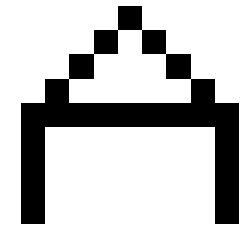

In [12]:
# Plot the first letter in the dataset.
plot_digit(X_train[:1])

In [13]:
# Plot all letters
def plot_digits(instances, images_per_row=5, **options):
    size = 9
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Figure 1: Plot of All 26 Input Letters


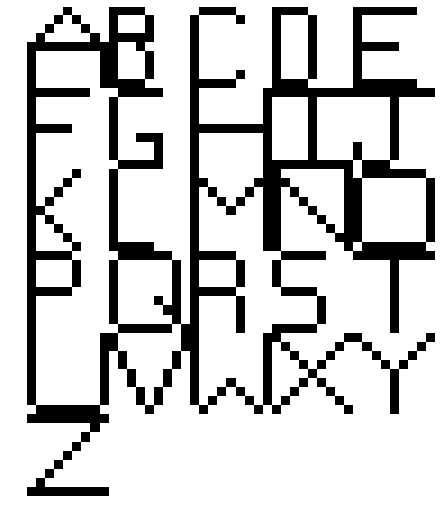

In [312]:
# Plot all letters in the dataset.
print('Figure 1: Plot of All 26 Input Letters')
plt.figure(figsize=(9,9))
example_images = np.r_[X_train[:]]
plot_digits(example_images, images_per_row=5)
#save_fig("more_digits_plot")
plt.show()



#### 4.2 Experiment #1 - Evaluate Several Neural Network Configurations
***

In this first experiment, the intent is to evaluate several different model configurations to see what components of the model impact performance.  For the purposes of this project, a component will be considered a configuration or function of the neural network that helps it learn.  The components that I will evaluate are the number of nodes in the hidden layer, the hidden layer activation function, the output layer activation function, the loss function, and the optimization function.

To evaluate these components, a loop will be used to iterate through every combination of selected components using Keras, with each iteration being considered a specific model.  This will allow each model to be compared to other models to identify what impacts each component has on the model accuracy.  The results of all models will be displayed together in one table to fasiliate comparison.  A set 5,000 epochs will be used for all models, and in addition to the following components being tabulated, the comparison table of all models will include the time to train the model, the accuracy based on the training set, and the number of epochs required to get to a perfect model.

While many options exist for each component, I have limited the set of components that will be compared in each model to just a few.  For the number of nodes in the hidden layer, I will consider extremely small graphs such as two nodes, and will increase these nodes to numbers similar to the number of expected outputs (26) as well as the number of inputs (81).  The intent is to see how the nodes are able to learn the input data to predict the output variable.  When considering the activation function of the hidden layer, I have selected to focus on the tanh, sigmoid, and relu functions.  Each of these functions activates the node in a slightly different fashion, but each ultimately converts the hidden layer output value to a new value between 0 and 1 by applying a function that has an inflection point at zero (Geron, 2017).  This is important when understanding back propogation which will be described more later.  While the output activation function works similarly, the most common variations are sigmoid and softmax.  These are the only two activation functions that will be evaluated.  The loss function used is very dependant on the type of output that is desired.  Because the output in this project is one of 26 letters, the loss function has to account for multiple output classes.  The two most appropriate loss functions to meet this objective are the mean squared error and categorical crossentropy function, both of which will be evaluated.  The final component reviewed is the optimization function.  This is the means in which back propogation is conducted.  This is a component where several options exist, but I have limited  this project to consider only three: Stoichastic Gradient Descent (SDG), Adaptive Momentum Estimation (ADAM), and AdaGrad.  All optimizaiton functions use the derivative of the activation functions to complete the back propogation, but the way in which the back propogation algorimth moves along the derivative to find the global minimum differs.  In SDG, each iteration of back propogation moves a set amount along the derivative curves, which is controlled by the learning rate, Eta.  AdaGrad scales down the learning rate along the steepest dimensions to prevent the back propogation algorithm from overshooting the minimum, essentially speeding up the time to train the model by preventing oscillation around this minimum.  The ADAM optimization function is able to consider past gradients and adjusts the learning rate to allow for faster training of the model.

In [15]:
# Define a function to plot Model Accuracy and Model Loss

def plot_figs(binary_accuracy, loss, model_id, nodes, hidden_activation, out_activation, loss_var, optimizer_var):
    # Plot the training history
    plt.figure(figsize=(15,3))

    #print(history.history.keys())
    plt.subplot(1,2,1)
    plt.plot(history.history[binary_accuracy])
    plt.title('Model Accuracy for Model No. %r,\n No. of Nodes: %r\n Act Funcs: (%r, %r)\n Loss Func: %r\n Opt Func: %r'\
              %(model_id, nodes, hidden_activation, out_activation, loss_var, optimizer_var))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history[loss])
    plt.title('Model Loss for Model No. %r,\n No. of Nodes: %r\n Act Funcs: (%r, %r)\n Loss Func: %r\n Opt Func: %r'\
              %(model_id, nodes, hidden_activation, out_activation, loss_var, optimizer_var))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper right')

In [16]:
# Set parameters to loop through

nodes = [2,4,8,32,96]
hidden_activation = ['sigmoid','relu','tanh']
out_activation = ['sigmoid','softmax']
loss_var = ['mean_squared_error', 'categorical_crossentropy']
optimizer_var = ['sgd','adam','adagrad']
num_epochs = 5000

In [17]:
# Create lists to hold the results of each iteration.
model_id = 1 # initial model ID
model_id_list = []
node_list = []
hidden_activation_list = []
out_activation_list = []
loss_var_list = []
optimizer_var_list = []
max_acc_list = []
epoch_max_list = []
#validation_performance_results = []
processing_time = []

---------------------------------------------------------------
Model No.: 1
Number of Nodes: 2
Hidden Layer Activiation: 'sigmoid'
Output Layer Activiation: 'sigmoid'
Hidden Layer Loss Function: 'mean_squared_error'
Hidden Layer Optimizer: 'sgd'
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.

Processing time (seconds): 3.575036
Maxium Accuarcy: 0.03846153989434242, Epochs Required to Achieve this Accuracy: 447
---------------------------------------------------------------
Model No.: 2
Number of Nodes: 2
Hidden Layer Activiation: 'sigmoid'
Output Layer Activiation: 'sigmoid'
Hidden Layer Loss Function: 'mean_squared_error'
Hidden Layer Optimizer: 'adam'

Processing time (seconds): 4.026903
Maxium Accuarcy: 0.03846153989434242, Epochs Required to Achieve this Accuracy: 9
---------------------------------------------------------------
Model No.: 3
Number of Nodes: 2
Hidden Layer Activiation: 'sigmoid'
Output Layer 


Processing time (seconds): 4.660478
Maxium Accuarcy: 0.5384615659713745, Epochs Required to Achieve this Accuracy: 4991
---------------------------------------------------------------
Model No.: 22
Number of Nodes: 2
Hidden Layer Activiation: 'relu'
Output Layer Activiation: 'relu'
Hidden Layer Loss Function: 'categorical_crossentropy'
Hidden Layer Optimizer: 'sgd'


C:\Users\DELL\Anaconda3\envs\DeepLearning\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



Processing time (seconds): 5.279071
Maxium Accuarcy: 0.26923078298568726, Epochs Required to Achieve this Accuracy: 4398
---------------------------------------------------------------
Model No.: 23
Number of Nodes: 2
Hidden Layer Activiation: 'relu'
Output Layer Activiation: 'relu'
Hidden Layer Loss Function: 'categorical_crossentropy'
Hidden Layer Optimizer: 'adam'

Processing time (seconds): 5.298830
Maxium Accuarcy: 0.692307710647583, Epochs Required to Achieve this Accuracy: 3716
---------------------------------------------------------------
Model No.: 24
Number of Nodes: 2
Hidden Layer Activiation: 'relu'
Output Layer Activiation: 'relu'
Hidden Layer Loss Function: 'categorical_crossentropy'
Hidden Layer Optimizer: 'adagrad'

Processing time (seconds): 5.874045
Maxium Accuarcy: 0.5, Epochs Required to Achieve this Accuracy: 4454
---------------------------------------------------------------
Model No.: 25
Number of Nodes: 2
Hidden Layer Activiation: 'tanh'
Output Layer Activiat


Processing time (seconds): 6.055841
Maxium Accuarcy: 0.5769230723381042, Epochs Required to Achieve this Accuracy: 3635
---------------------------------------------------------------
Model No.: 46
Number of Nodes: 4
Hidden Layer Activiation: 'sigmoid'
Output Layer Activiation: 'sigmoid'
Hidden Layer Loss Function: 'categorical_crossentropy'
Hidden Layer Optimizer: 'sgd'

Processing time (seconds): 6.233509
Maxium Accuarcy: 0.3076923191547394, Epochs Required to Achieve this Accuracy: 4735
---------------------------------------------------------------
Model No.: 47
Number of Nodes: 4
Hidden Layer Activiation: 'sigmoid'
Output Layer Activiation: 'sigmoid'
Hidden Layer Loss Function: 'categorical_crossentropy'
Hidden Layer Optimizer: 'adam'

Processing time (seconds): 6.881100
Maxium Accuarcy: 0.7692307829856873, Epochs Required to Achieve this Accuracy: 4812
---------------------------------------------------------------
Model No.: 48
Number of Nodes: 4
Hidden Layer Activiation: 'sigm


Processing time (seconds): 7.760738
Maxium Accuarcy: 1.0, Epochs Required to Achieve this Accuracy: 1500
---------------------------------------------------------------
Model No.: 69
Number of Nodes: 4
Hidden Layer Activiation: 'tanh'
Output Layer Activiation: 'tanh'
Hidden Layer Loss Function: 'mean_squared_error'
Hidden Layer Optimizer: 'adagrad'

Processing time (seconds): 7.693397
Maxium Accuarcy: 0.9615384340286255, Epochs Required to Achieve this Accuracy: 4133
---------------------------------------------------------------
Model No.: 70
Number of Nodes: 4
Hidden Layer Activiation: 'tanh'
Output Layer Activiation: 'tanh'
Hidden Layer Loss Function: 'categorical_crossentropy'
Hidden Layer Optimizer: 'sgd'

Processing time (seconds): 8.007279
Maxium Accuarcy: 0.6538461446762085, Epochs Required to Achieve this Accuracy: 3808
---------------------------------------------------------------
Model No.: 71
Number of Nodes: 4
Hidden Layer Activiation: 'tanh'
Output Layer Activiation: 't


Processing time (seconds): 9.457644
Maxium Accuarcy: 0.03846153989434242, Epochs Required to Achieve this Accuracy: 0
---------------------------------------------------------------
Model No.: 92
Number of Nodes: 8
Hidden Layer Activiation: 'relu'
Output Layer Activiation: 'relu'
Hidden Layer Loss Function: 'mean_squared_error'
Hidden Layer Optimizer: 'adam'

Processing time (seconds): 8.950583
Maxium Accuarcy: 1.0, Epochs Required to Achieve this Accuracy: 525
---------------------------------------------------------------
Model No.: 93
Number of Nodes: 8
Hidden Layer Activiation: 'relu'
Output Layer Activiation: 'relu'
Hidden Layer Loss Function: 'mean_squared_error'
Hidden Layer Optimizer: 'adagrad'

Processing time (seconds): 8.488227
Maxium Accuarcy: 1.0, Epochs Required to Achieve this Accuracy: 526
---------------------------------------------------------------
Model No.: 94
Number of Nodes: 8
Hidden Layer Activiation: 'relu'
Output Layer Activiation: 'relu'
Hidden Layer Loss F


Processing time (seconds): 10.522316
Maxium Accuarcy: 1.0, Epochs Required to Achieve this Accuracy: 306
---------------------------------------------------------------
Model No.: 115
Number of Nodes: 32
Hidden Layer Activiation: 'sigmoid'
Output Layer Activiation: 'sigmoid'
Hidden Layer Loss Function: 'mean_squared_error'
Hidden Layer Optimizer: 'sgd'

Processing time (seconds): 9.952716
Maxium Accuarcy: 0.03846153989434242, Epochs Required to Achieve this Accuracy: 0
---------------------------------------------------------------
Model No.: 116
Number of Nodes: 32
Hidden Layer Activiation: 'sigmoid'
Output Layer Activiation: 'sigmoid'
Hidden Layer Loss Function: 'mean_squared_error'
Hidden Layer Optimizer: 'adam'

Processing time (seconds): 10.715736
Maxium Accuarcy: 1.0, Epochs Required to Achieve this Accuracy: 359
---------------------------------------------------------------
Model No.: 117
Number of Nodes: 32
Hidden Layer Activiation: 'sigmoid'
Output Layer Activiation: 'sigmoi


Processing time (seconds): 12.440961
Maxium Accuarcy: 1.0, Epochs Required to Achieve this Accuracy: 256
---------------------------------------------------------------
Model No.: 138
Number of Nodes: 32
Hidden Layer Activiation: 'tanh'
Output Layer Activiation: 'tanh'
Hidden Layer Loss Function: 'categorical_crossentropy'
Hidden Layer Optimizer: 'adagrad'

Processing time (seconds): 12.169722
Maxium Accuarcy: 1.0, Epochs Required to Achieve this Accuracy: 157
---------------------------------------------------------------
Model No.: 139
Number of Nodes: 32
Hidden Layer Activiation: 'tanh'
Output Layer Activiation: 'tanh'
Hidden Layer Loss Function: 'mean_squared_error'
Hidden Layer Optimizer: 'sgd'

Processing time (seconds): 11.862159
Maxium Accuarcy: 0.0, Epochs Required to Achieve this Accuracy: 0
---------------------------------------------------------------
Model No.: 140
Number of Nodes: 32
Hidden Layer Activiation: 'tanh'
Output Layer Activiation: 'tanh'
Hidden Layer Loss Fun


Processing time (seconds): 14.866423
Maxium Accuarcy: 1.0, Epochs Required to Achieve this Accuracy: 875
---------------------------------------------------------------
Model No.: 161
Number of Nodes: 96
Hidden Layer Activiation: 'relu'
Output Layer Activiation: 'relu'
Hidden Layer Loss Function: 'categorical_crossentropy'
Hidden Layer Optimizer: 'adam'

Processing time (seconds): 15.228336
Maxium Accuarcy: 1.0, Epochs Required to Achieve this Accuracy: 50
---------------------------------------------------------------
Model No.: 162
Number of Nodes: 96
Hidden Layer Activiation: 'relu'
Output Layer Activiation: 'relu'
Hidden Layer Loss Function: 'categorical_crossentropy'
Hidden Layer Optimizer: 'adagrad'

Processing time (seconds): 15.481363
Maxium Accuarcy: 1.0, Epochs Required to Achieve this Accuracy: 8
---------------------------------------------------------------
Model No.: 163
Number of Nodes: 96
Hidden Layer Activiation: 'relu'
Output Layer Activiation: 'relu'
Hidden Layer Lo

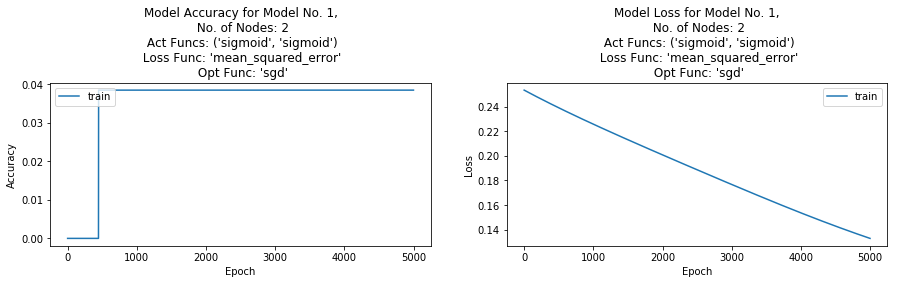

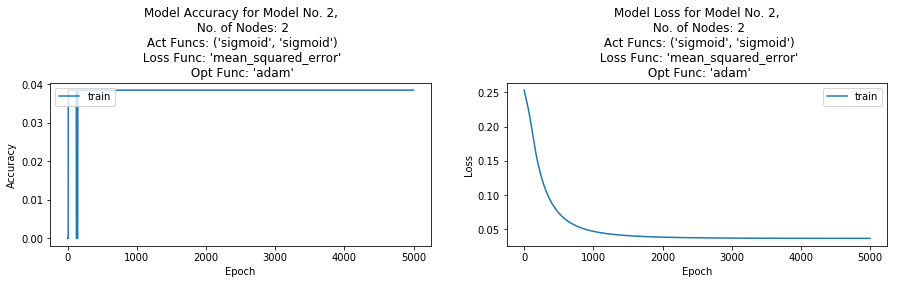

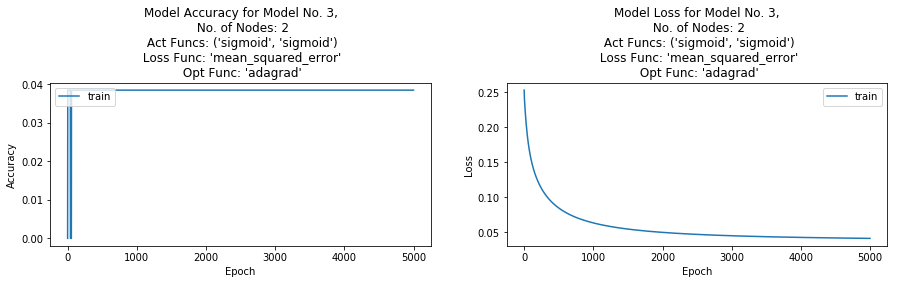

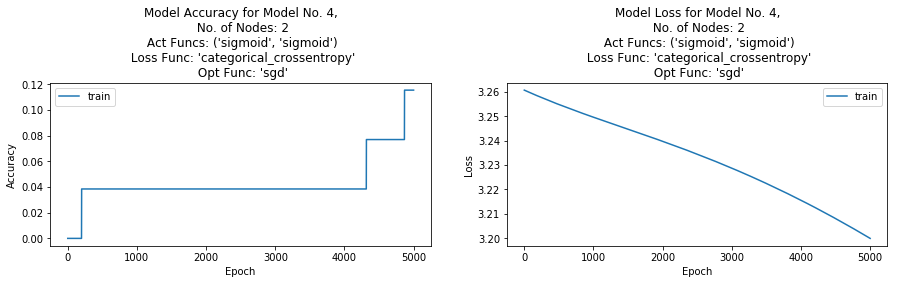

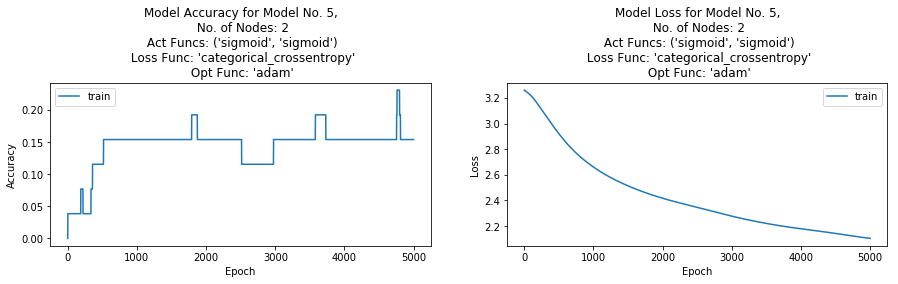

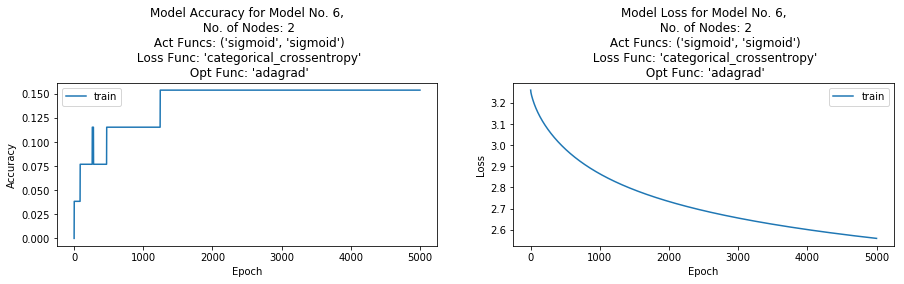

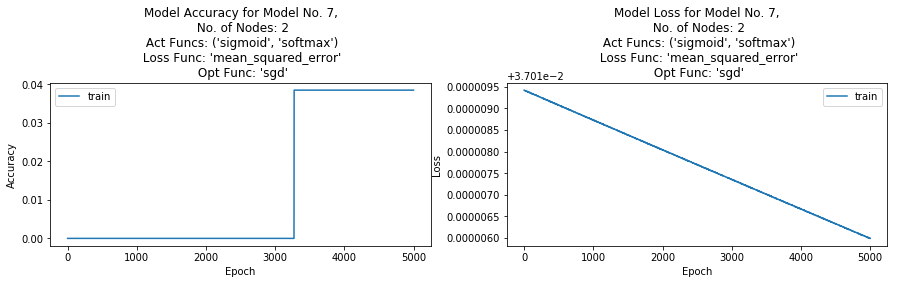

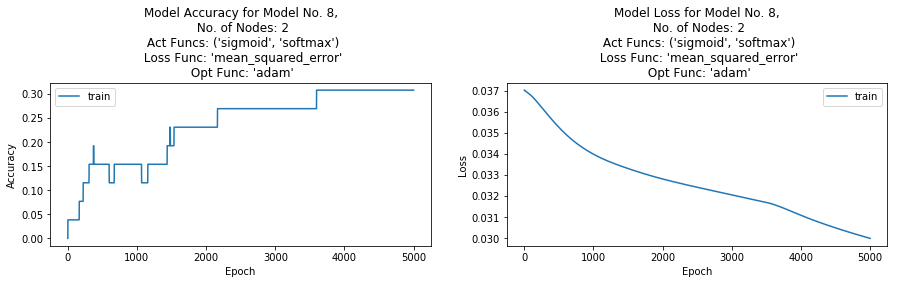

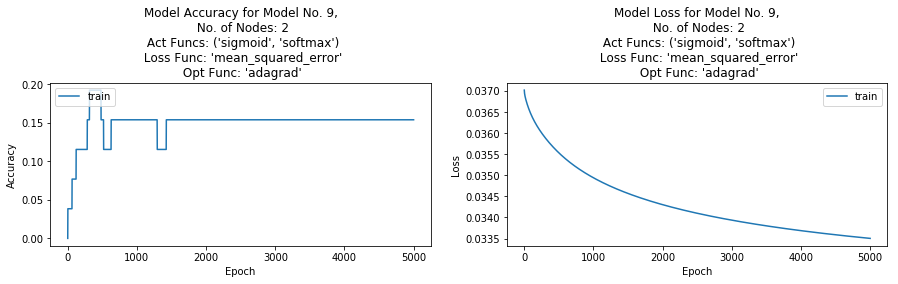

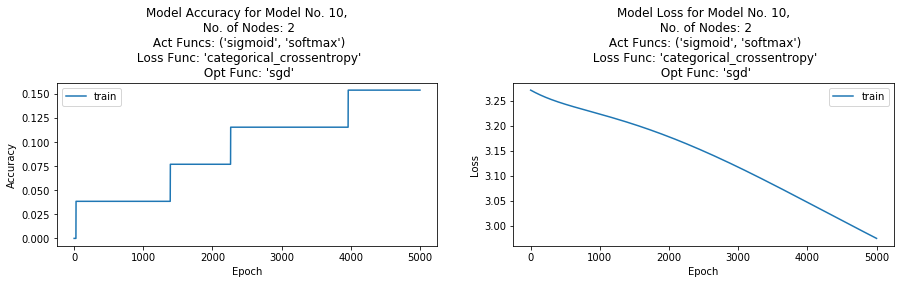

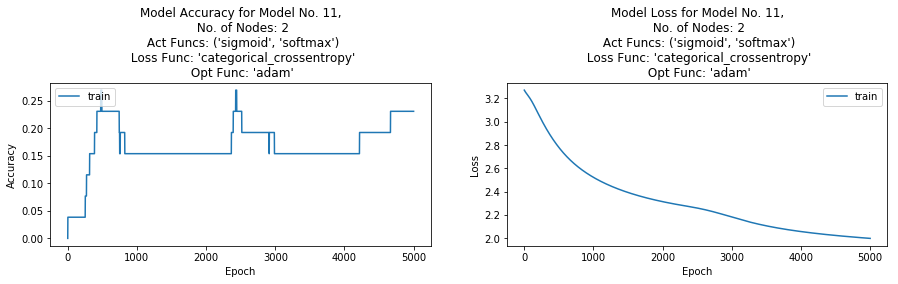

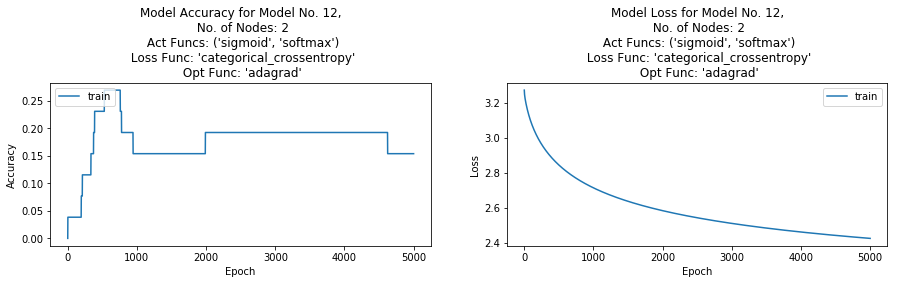

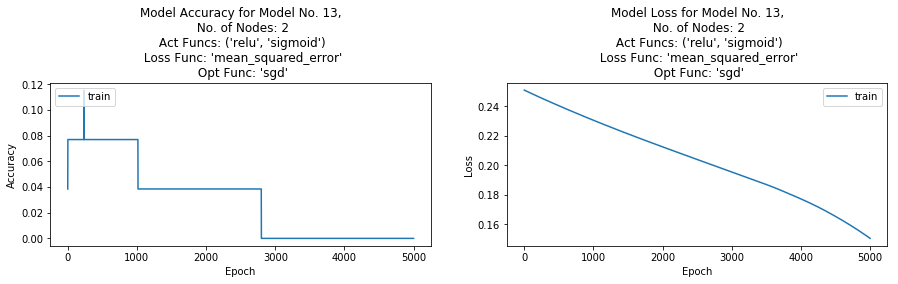

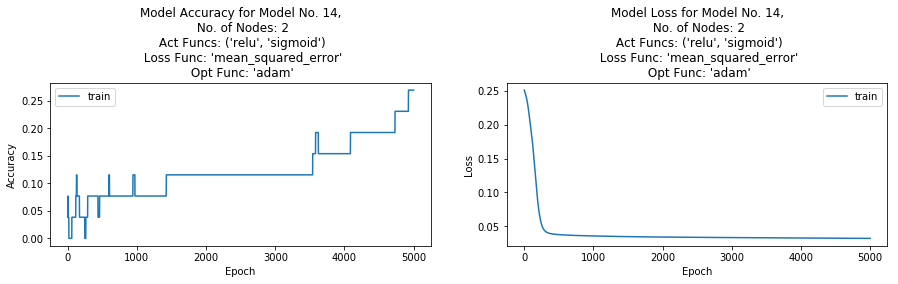

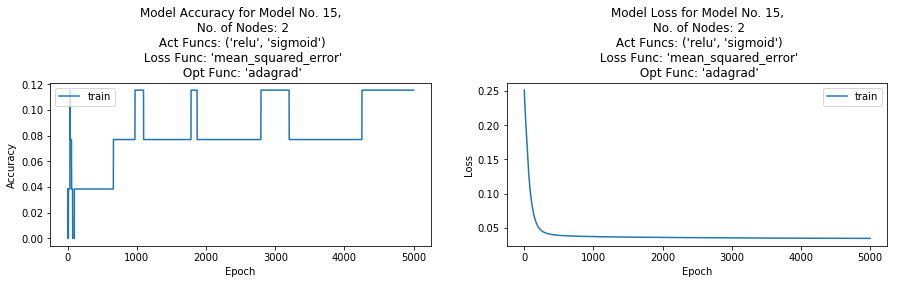

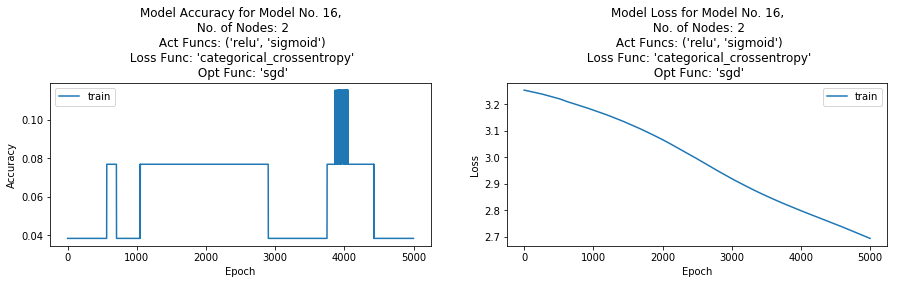

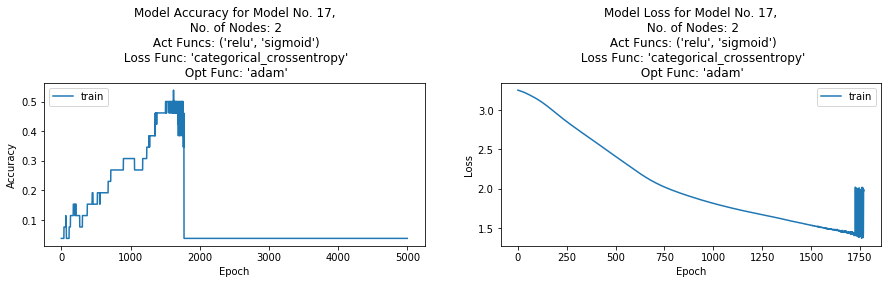

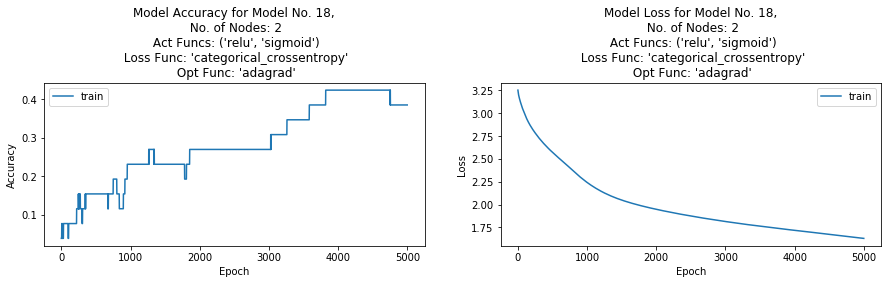

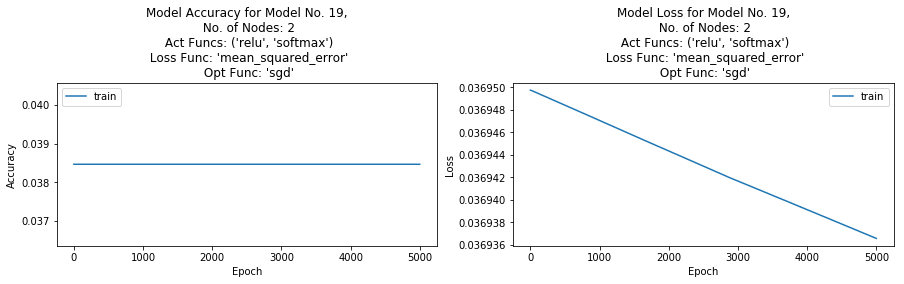

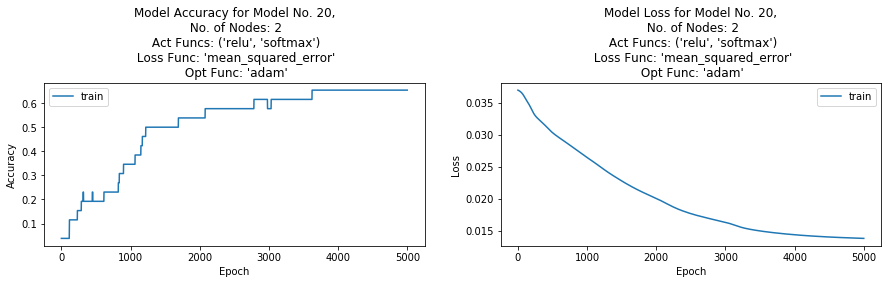

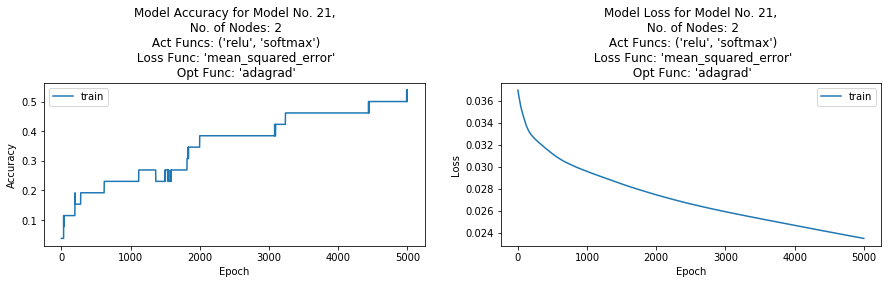

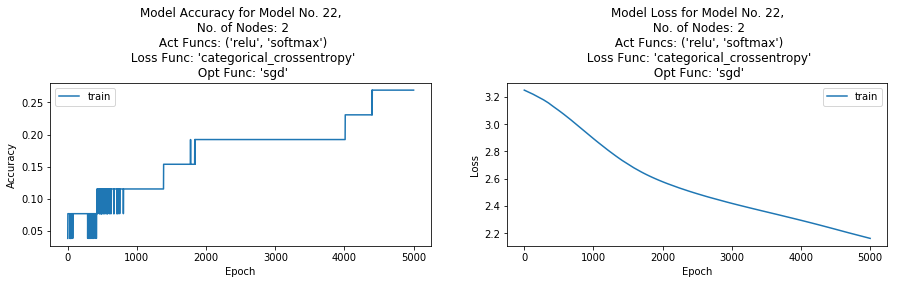

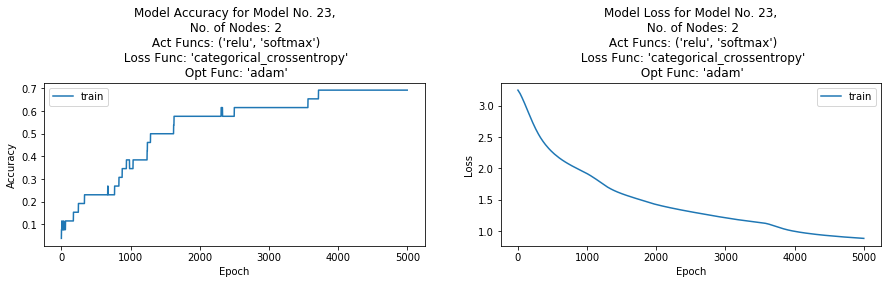

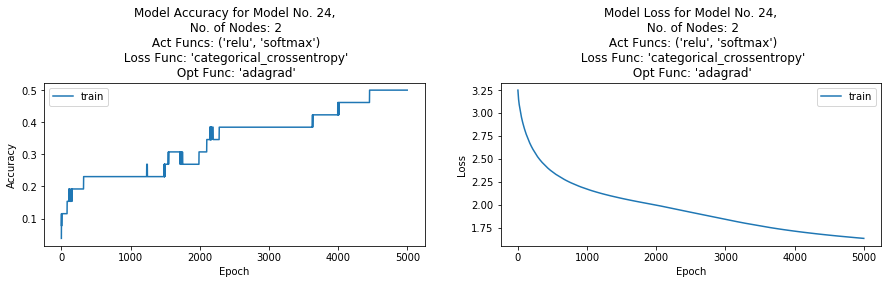

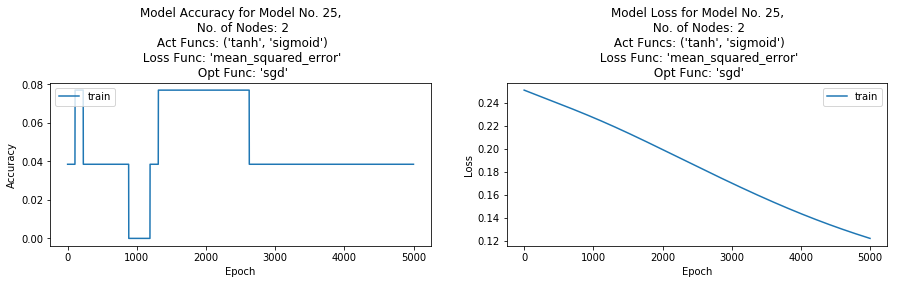

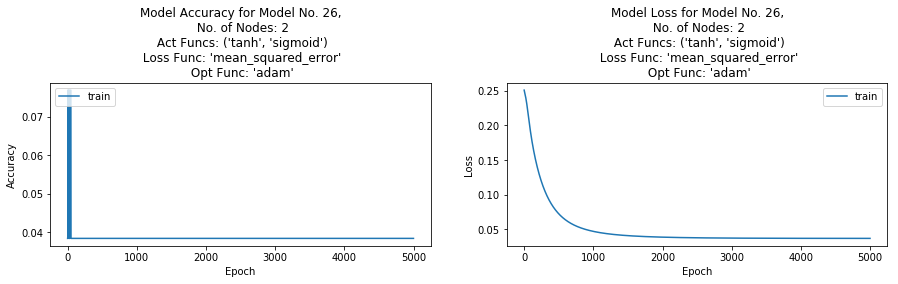

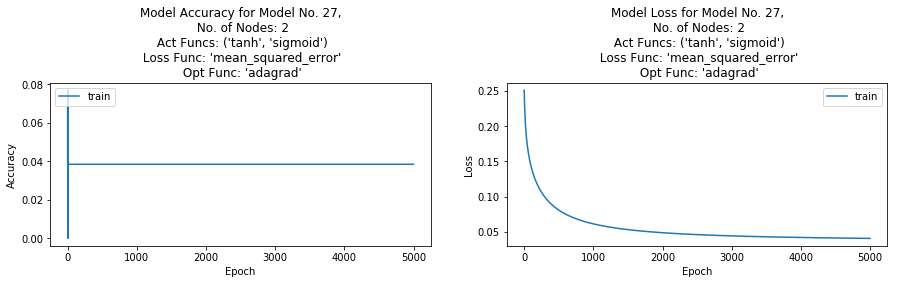

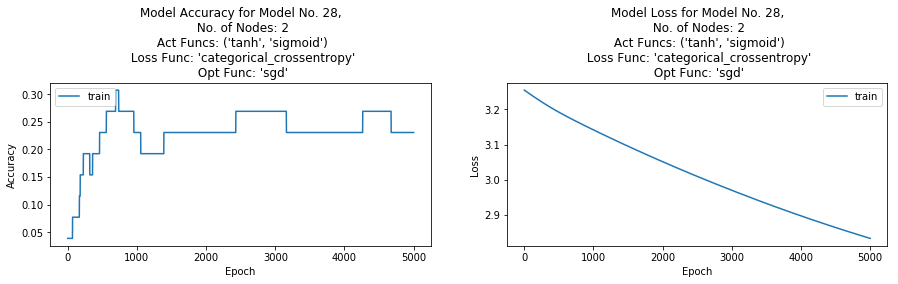

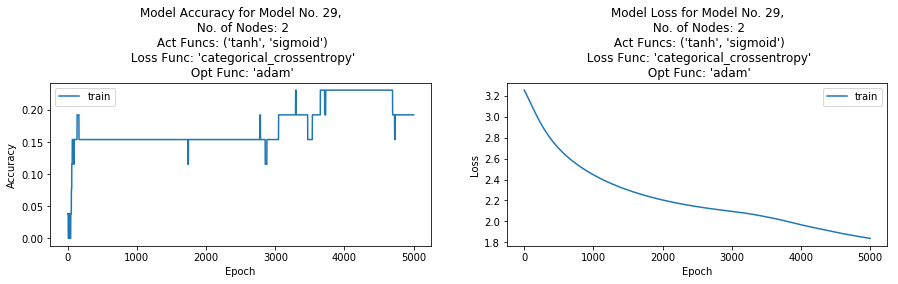

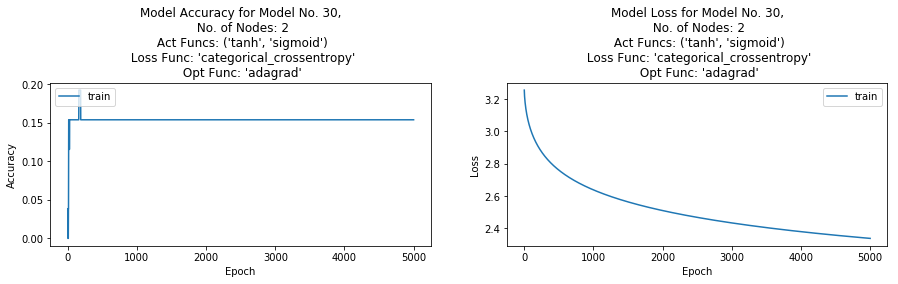

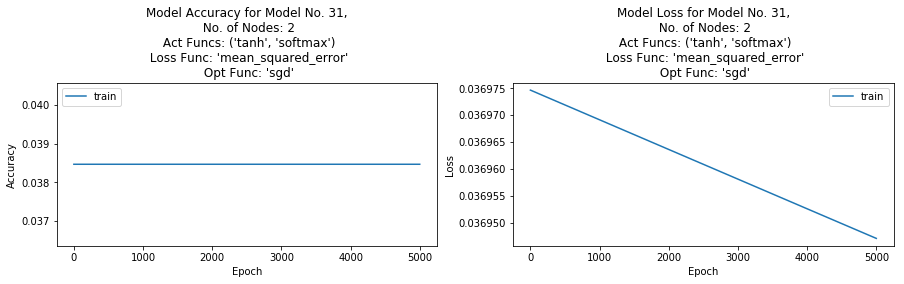

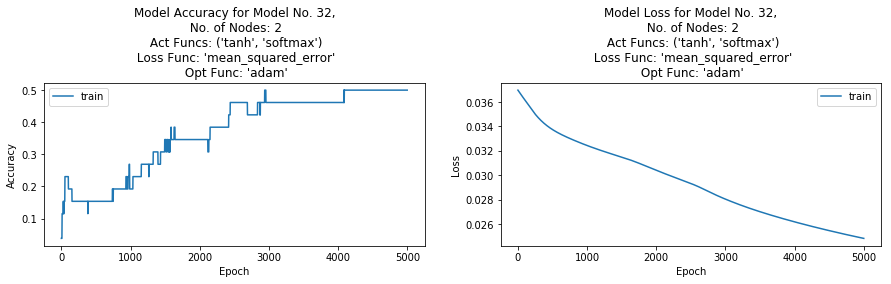

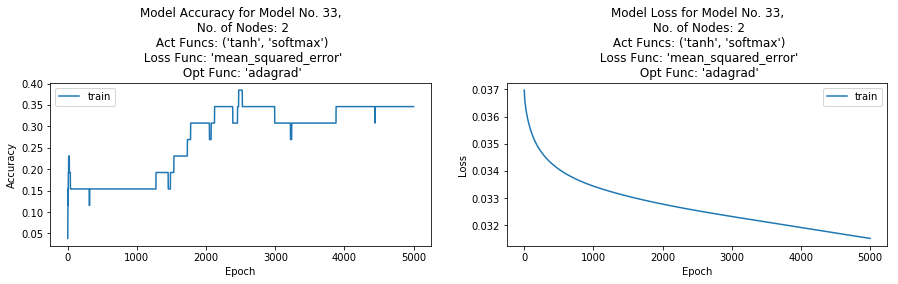

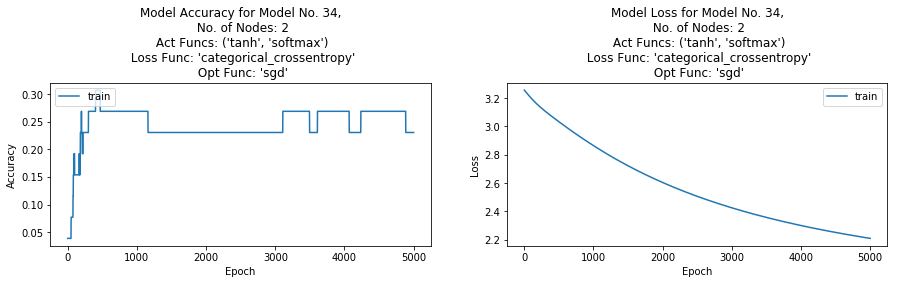

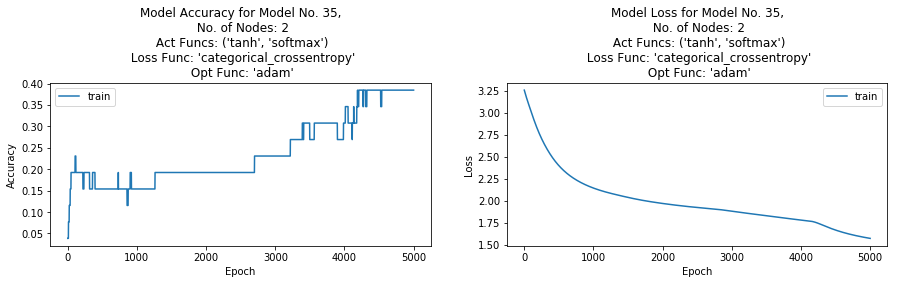

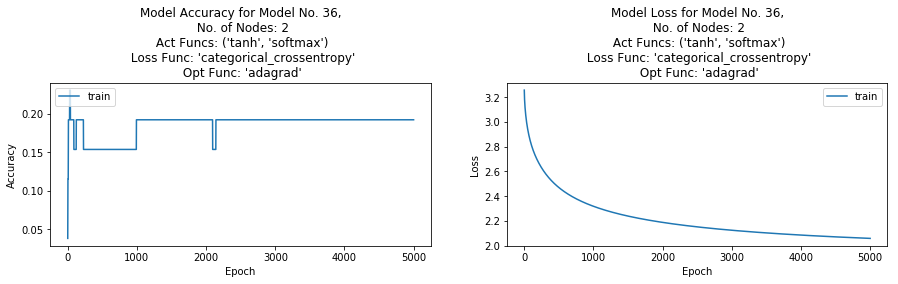

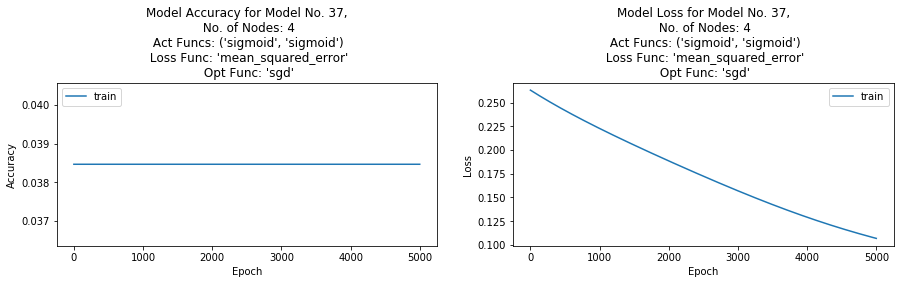

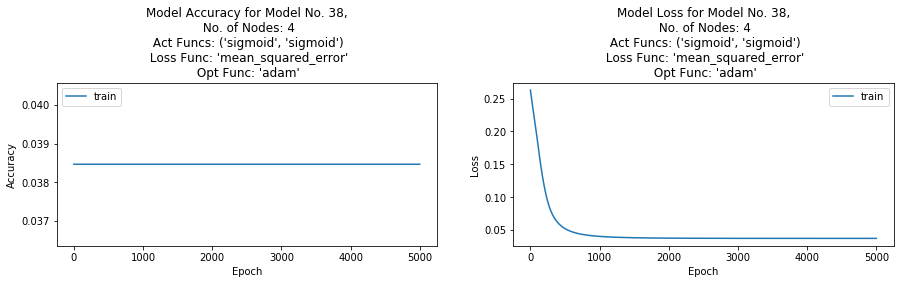

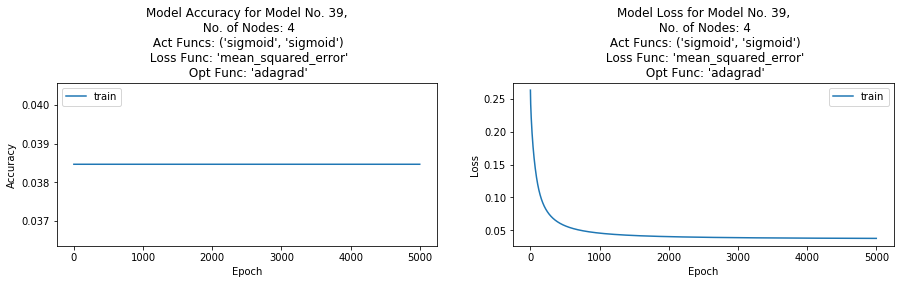

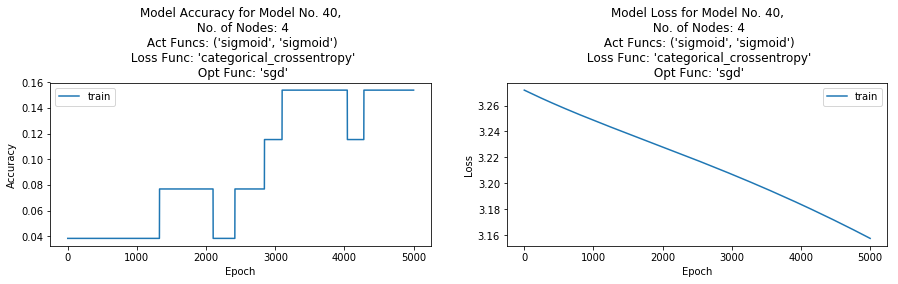

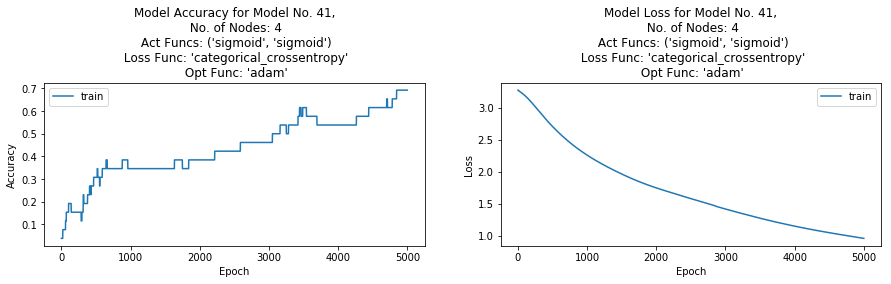

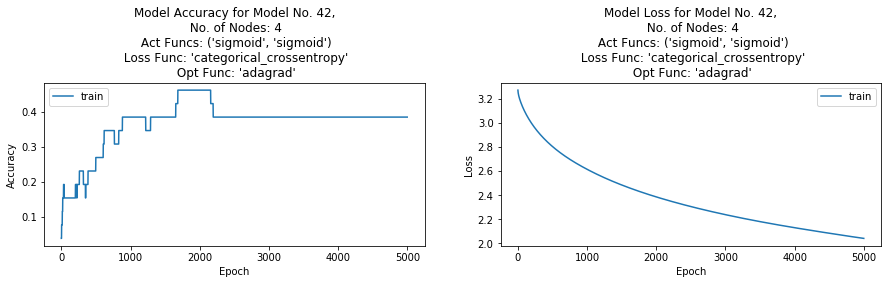

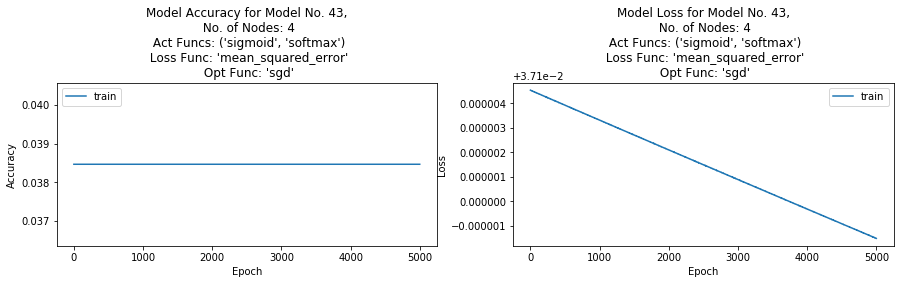

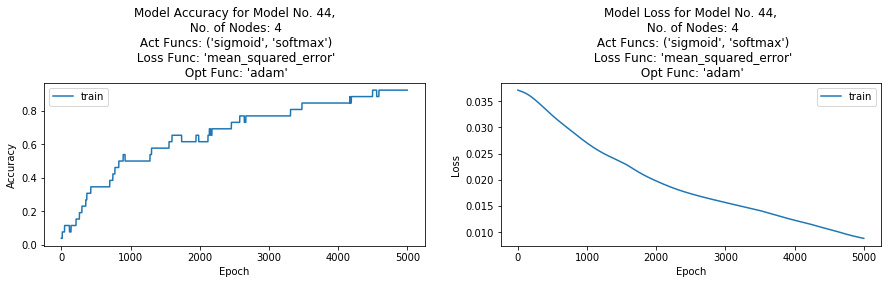

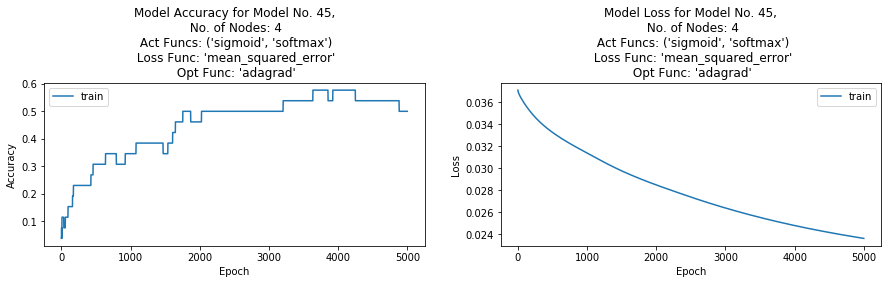

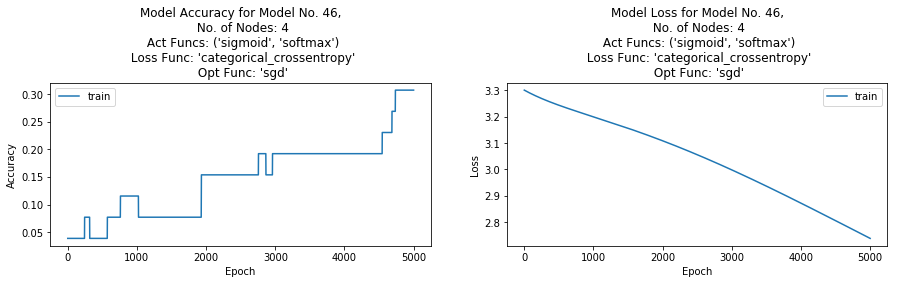

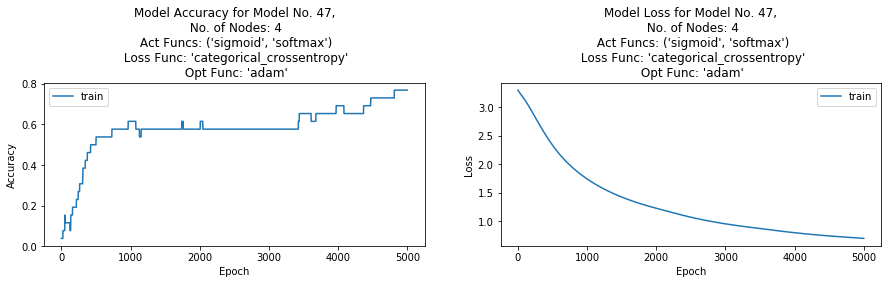

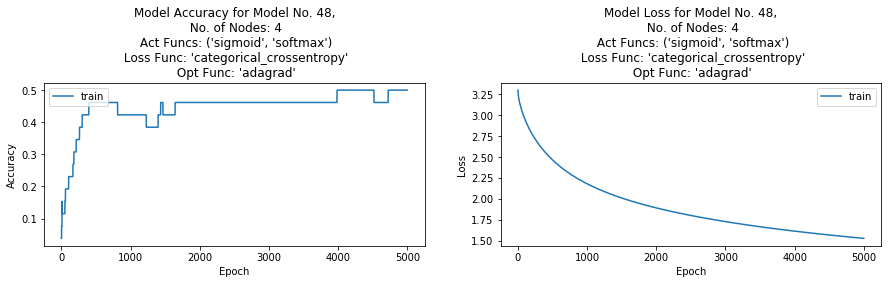

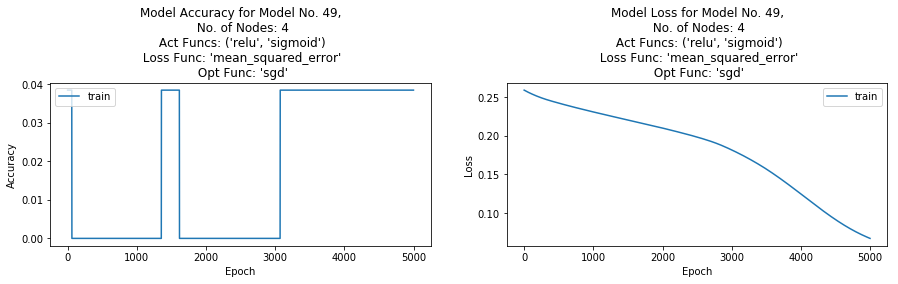

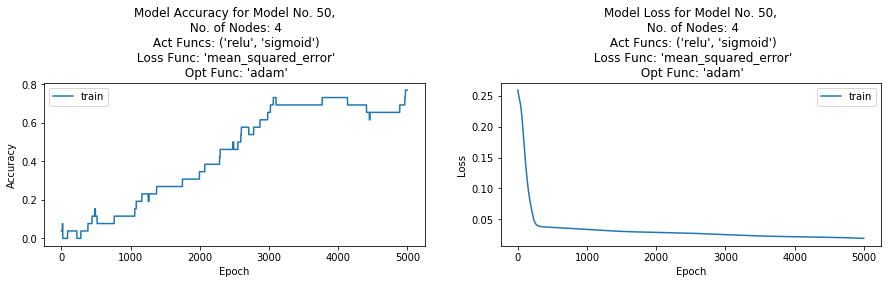

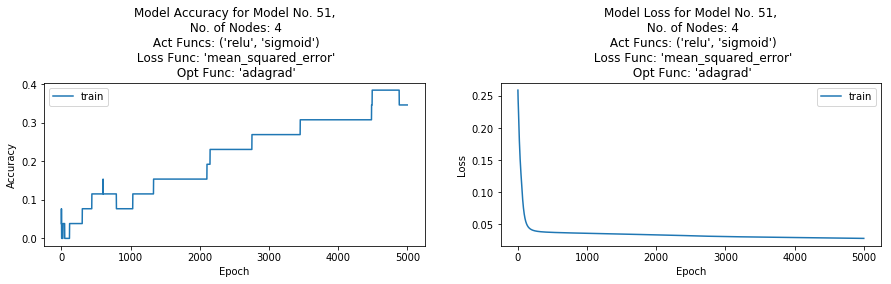

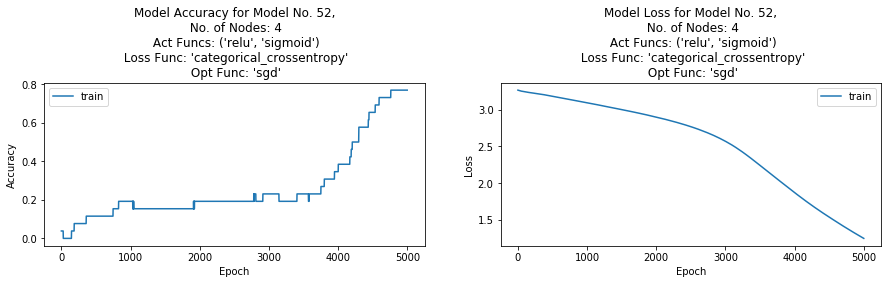

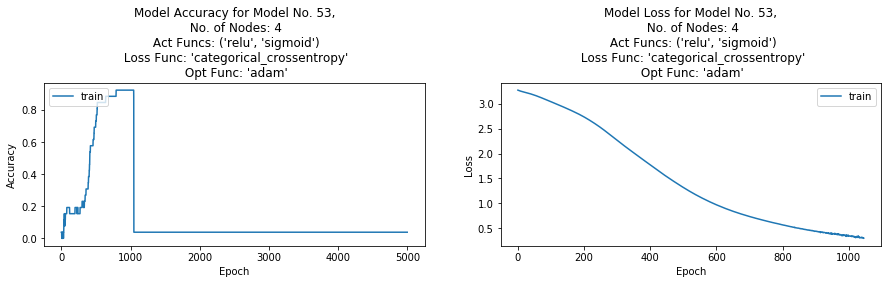

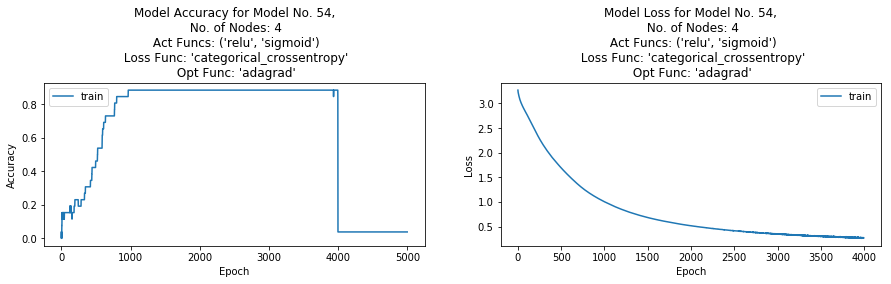

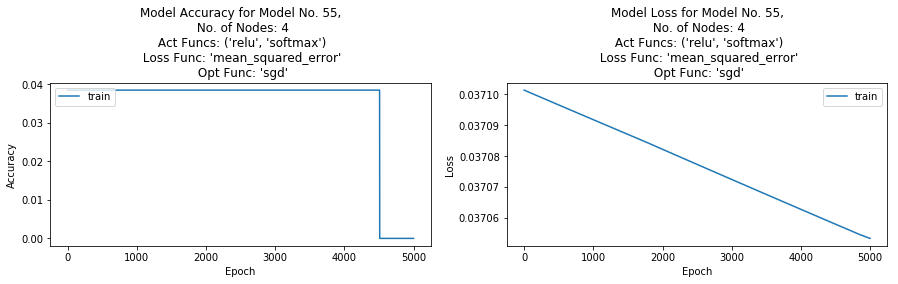

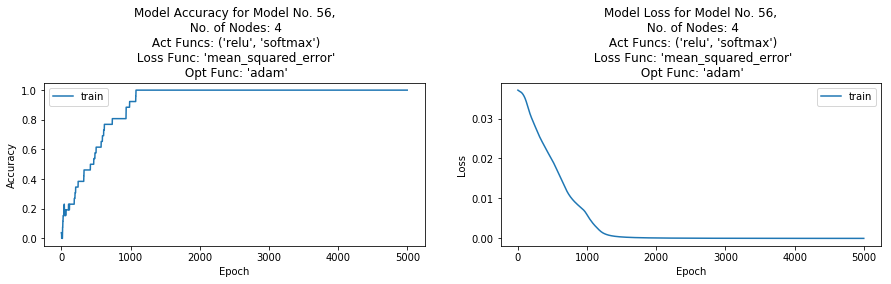

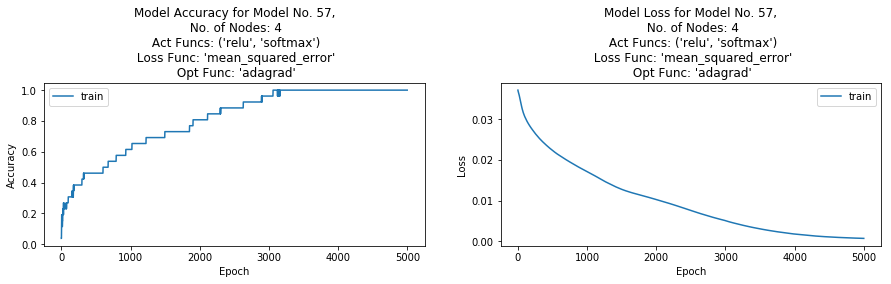

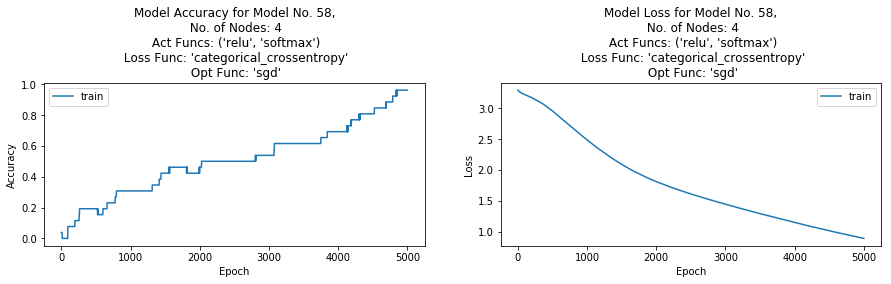

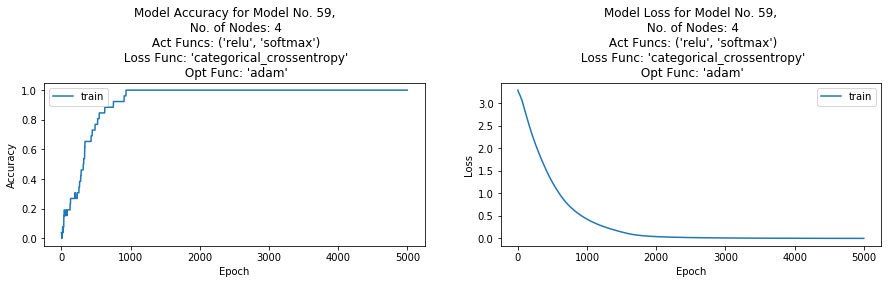

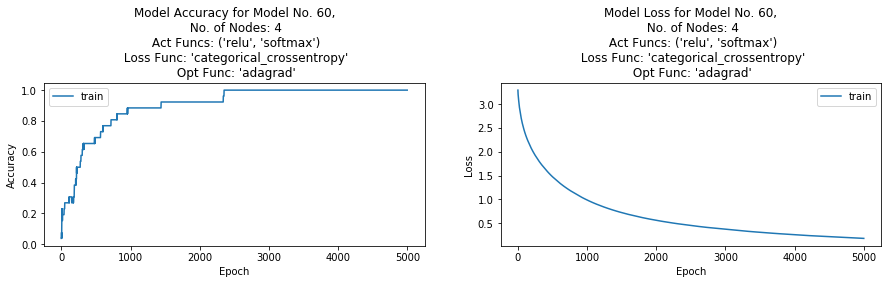

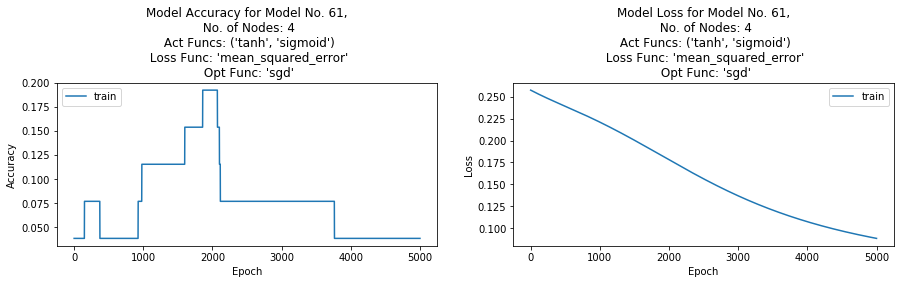

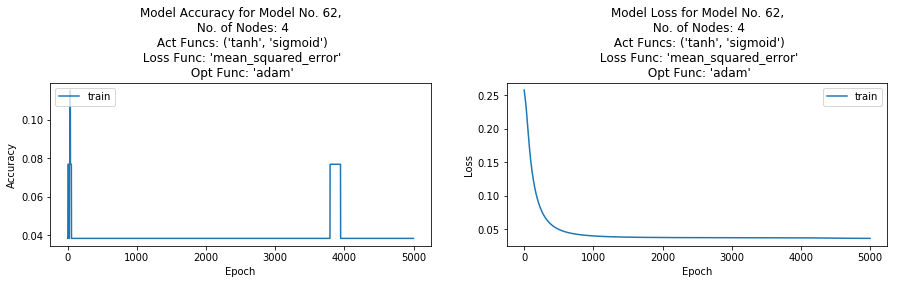

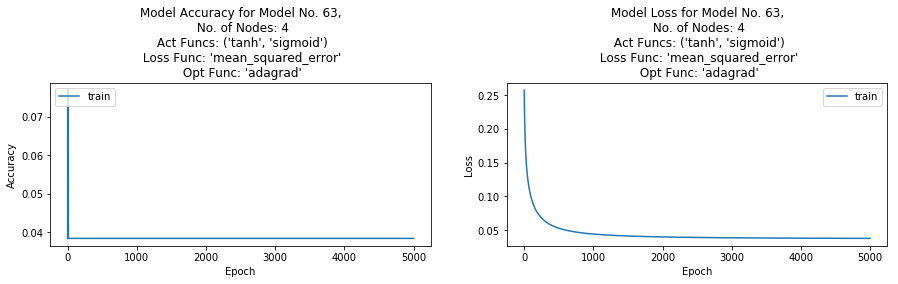

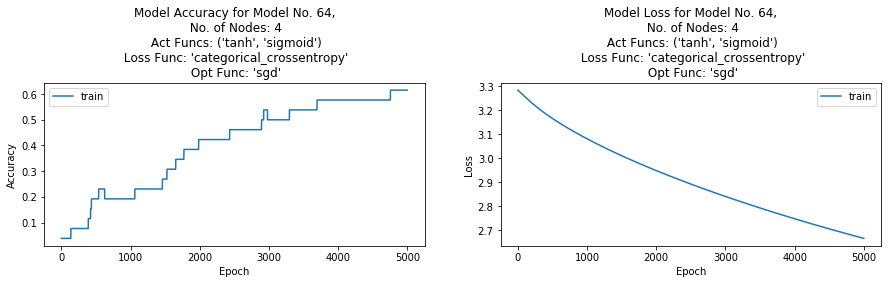

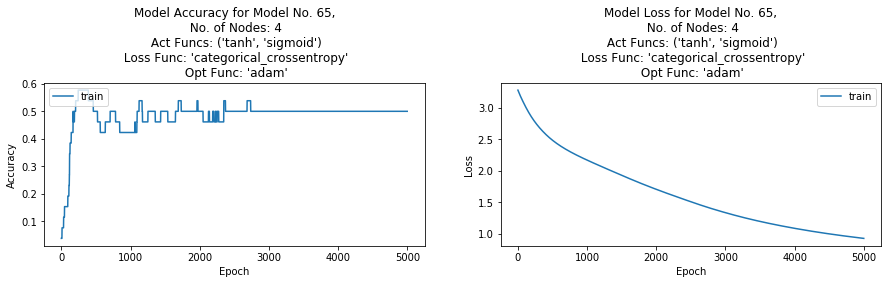

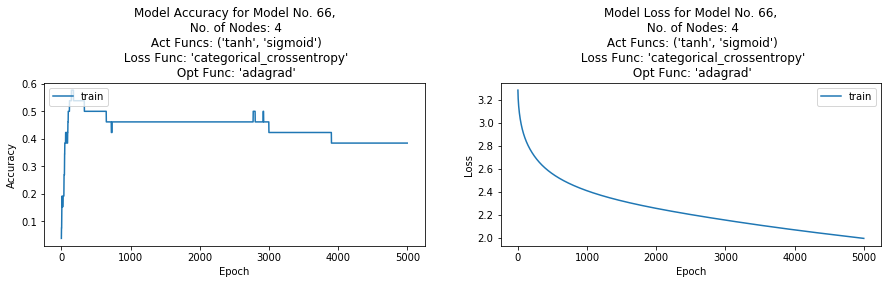

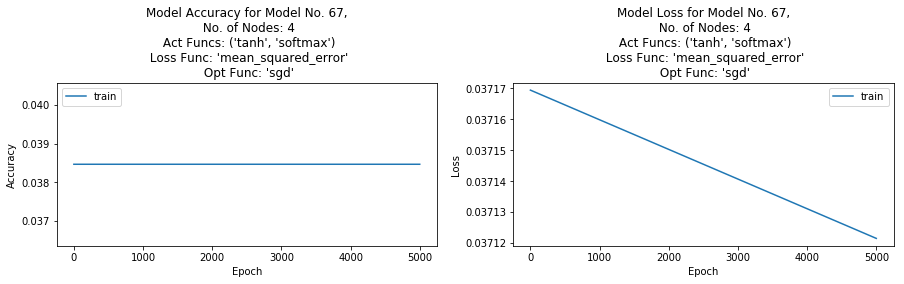

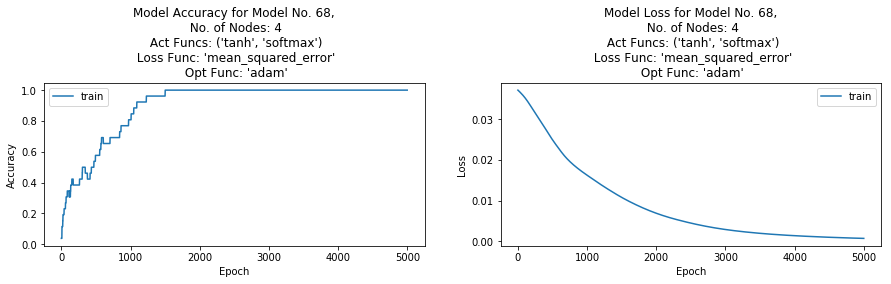

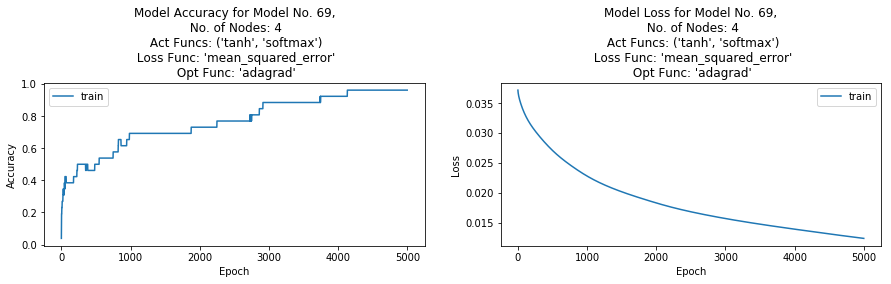

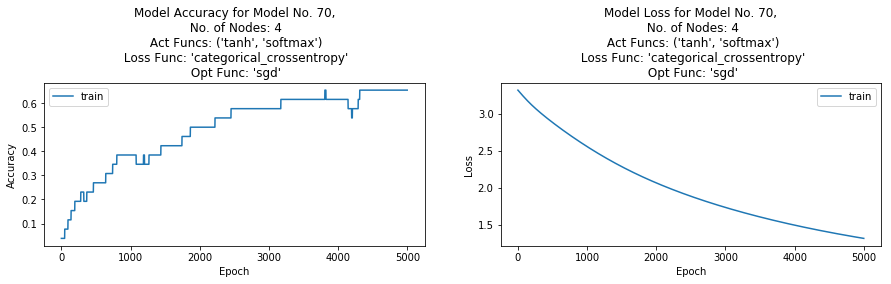

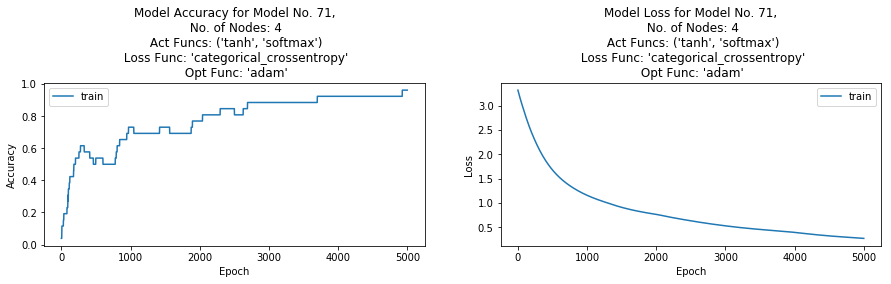

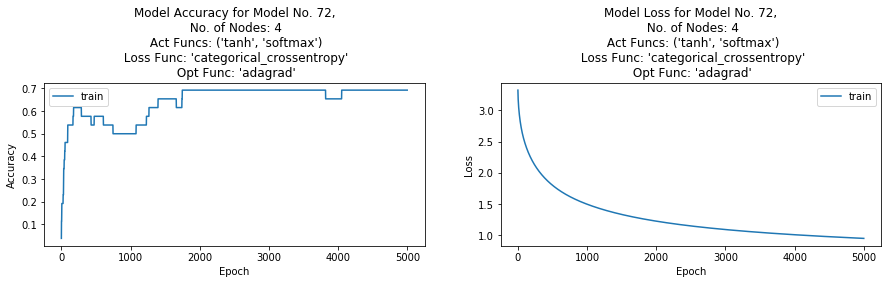

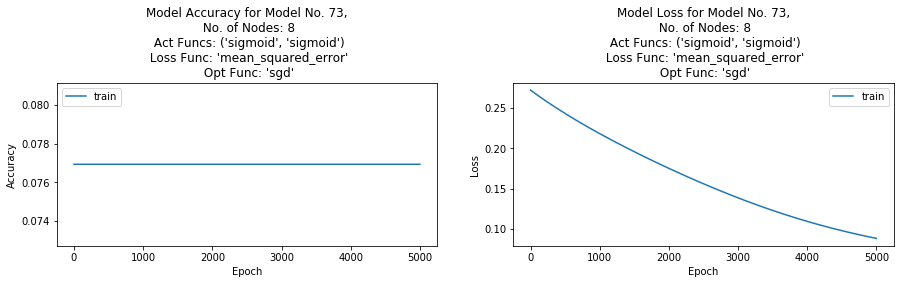

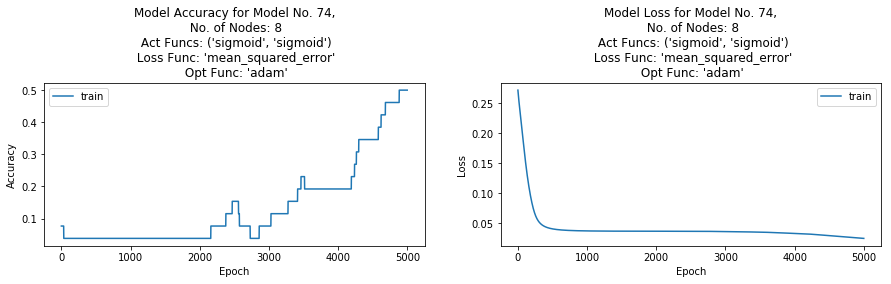

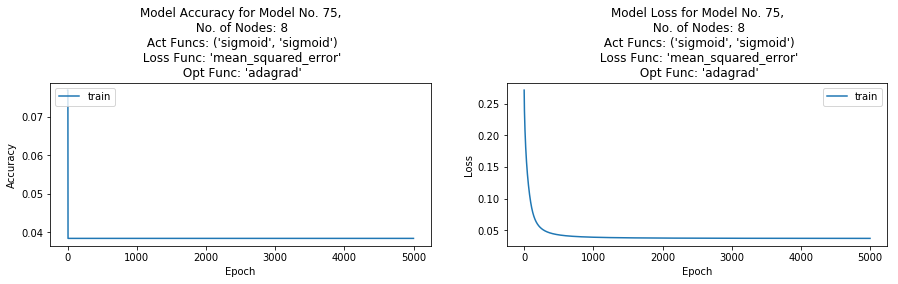

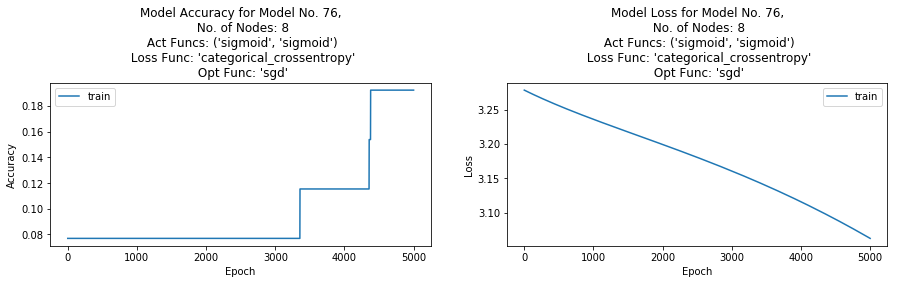

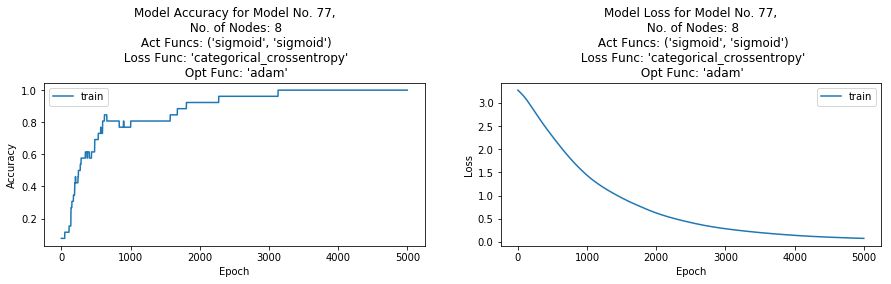

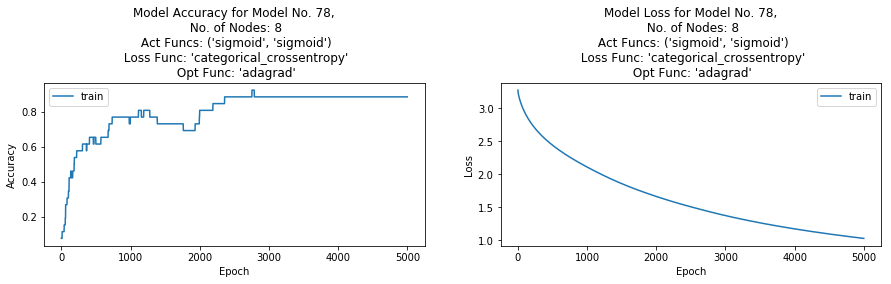

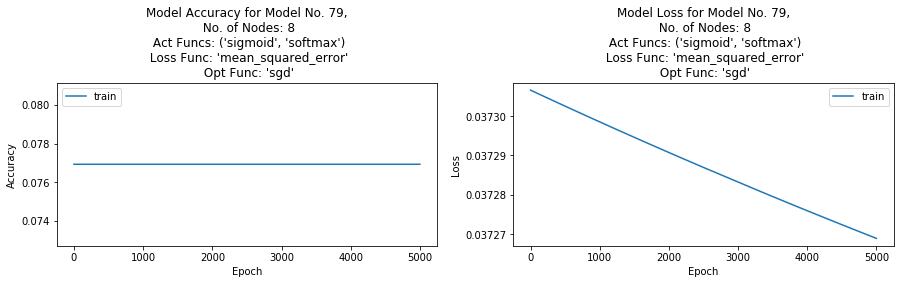

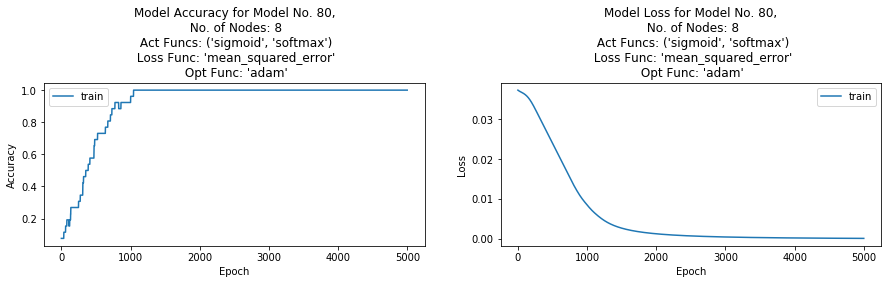

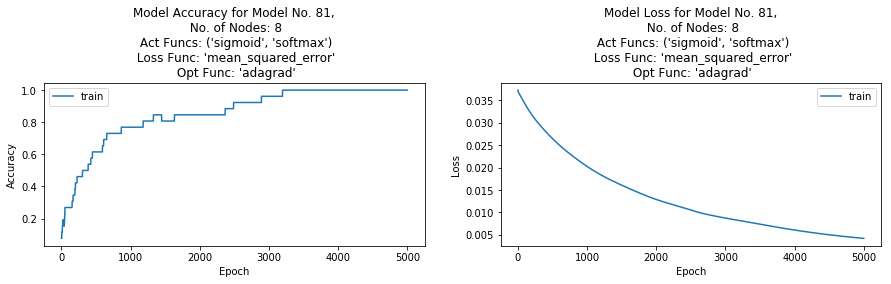

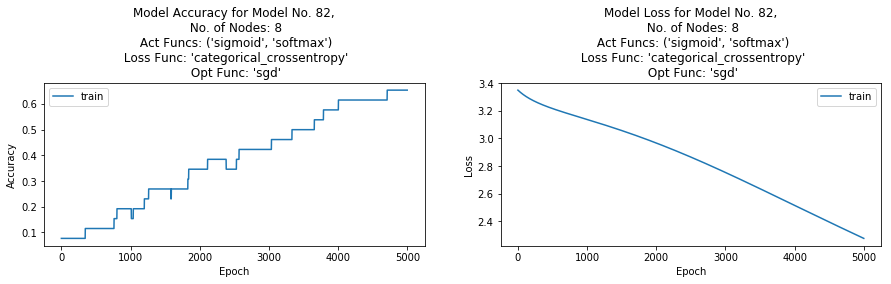

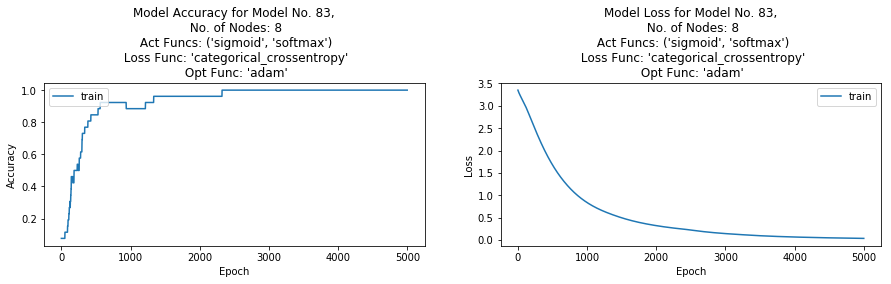

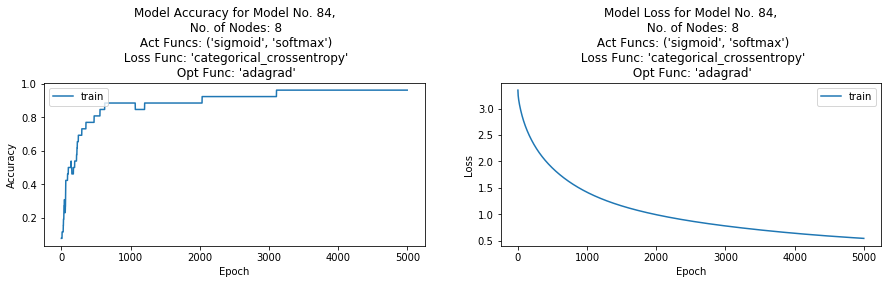

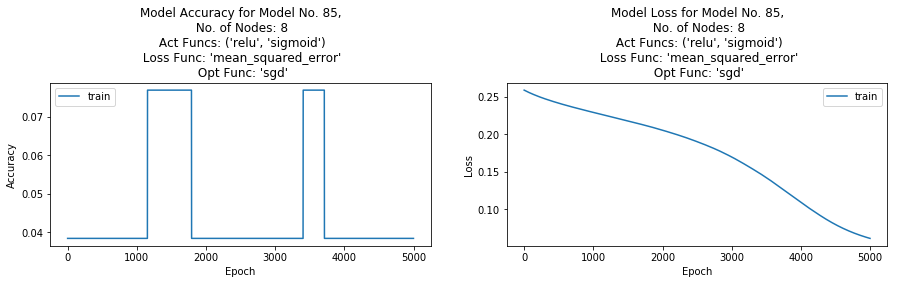

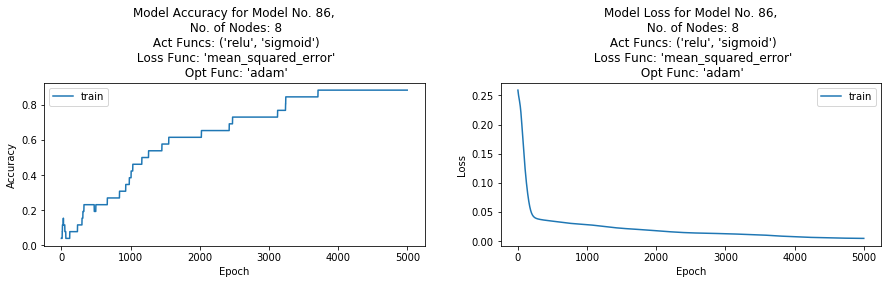

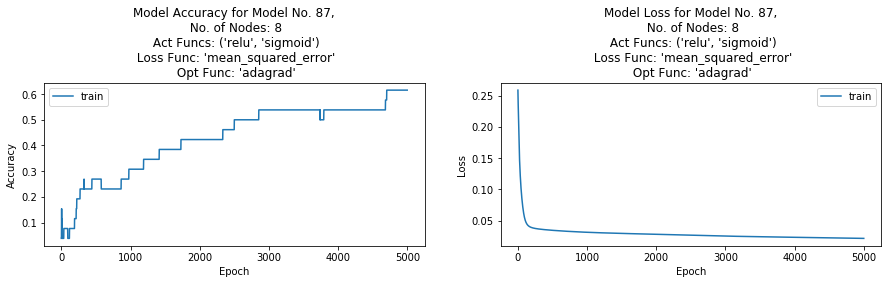

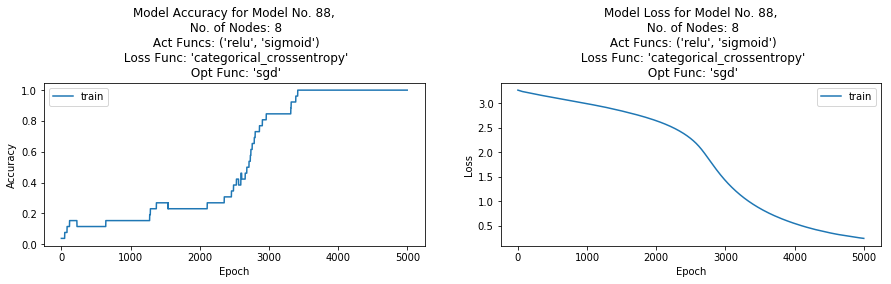

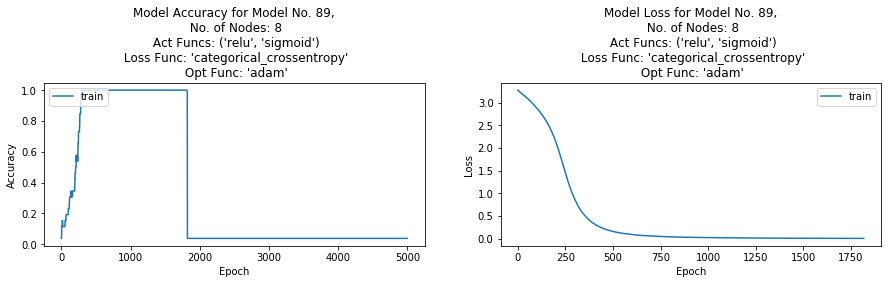

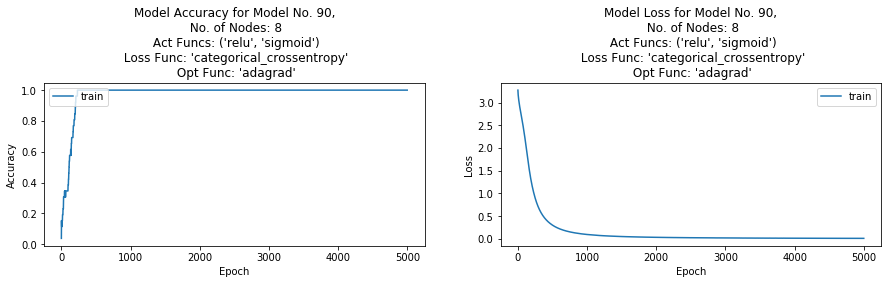

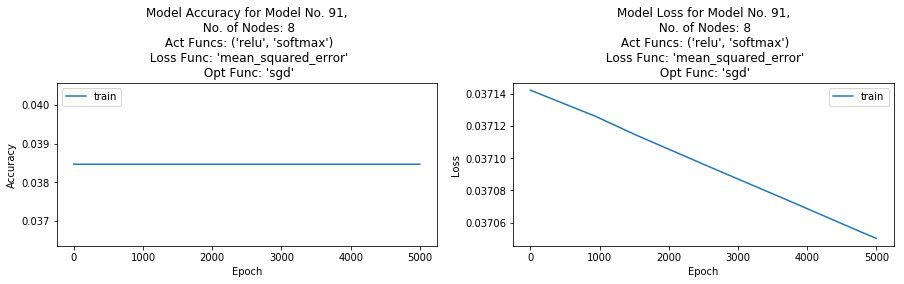

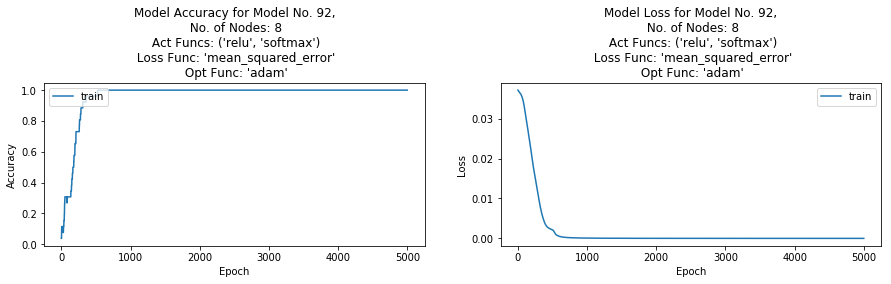

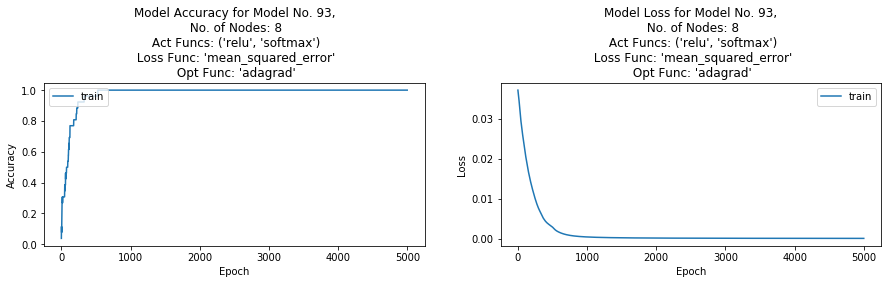

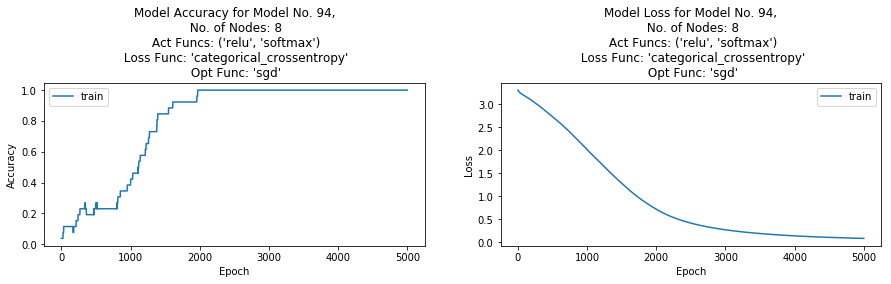

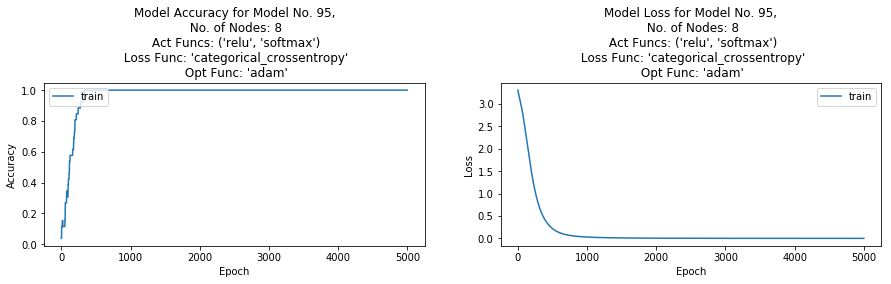

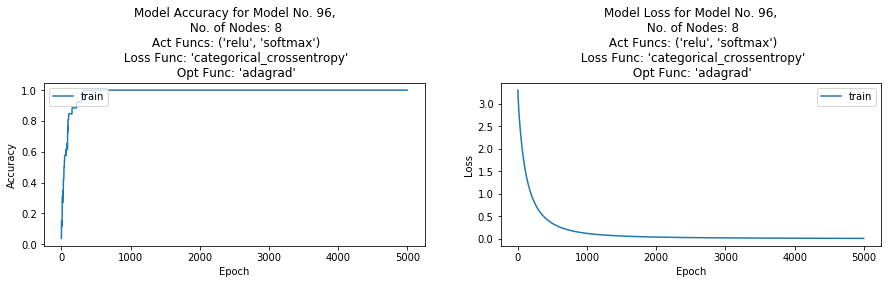

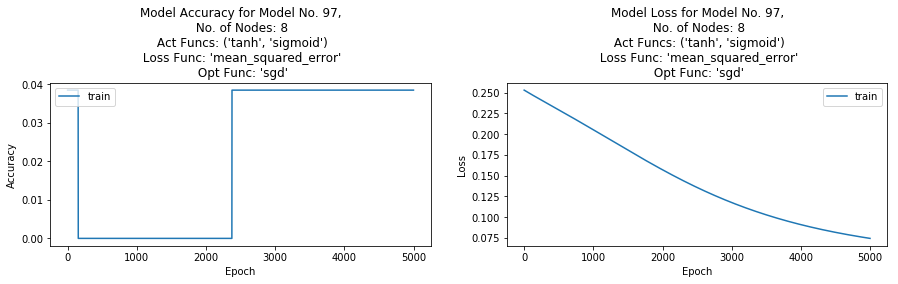

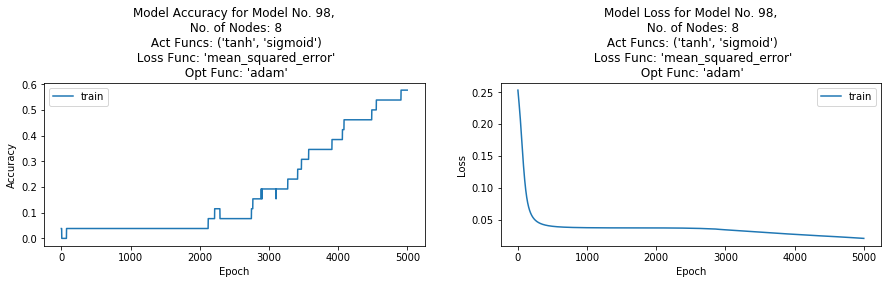

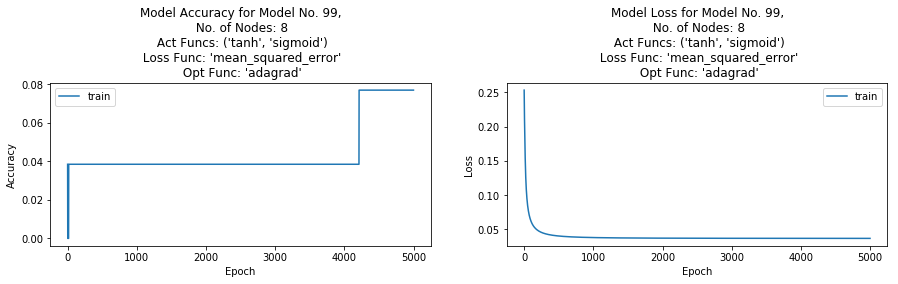

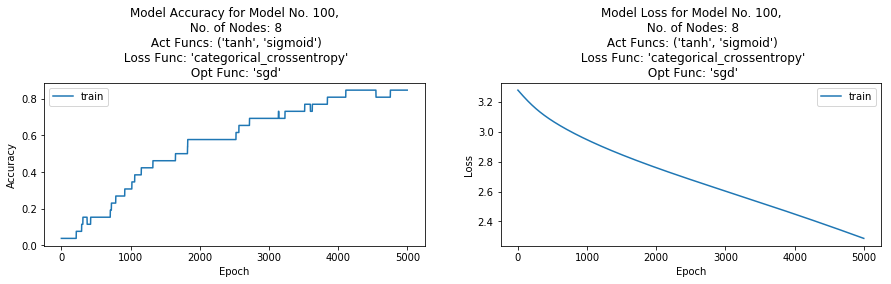

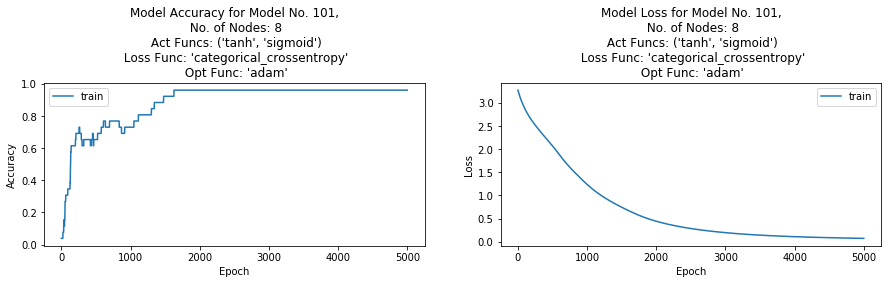

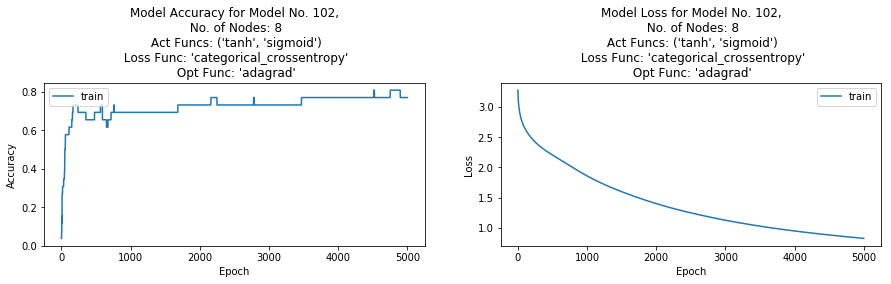

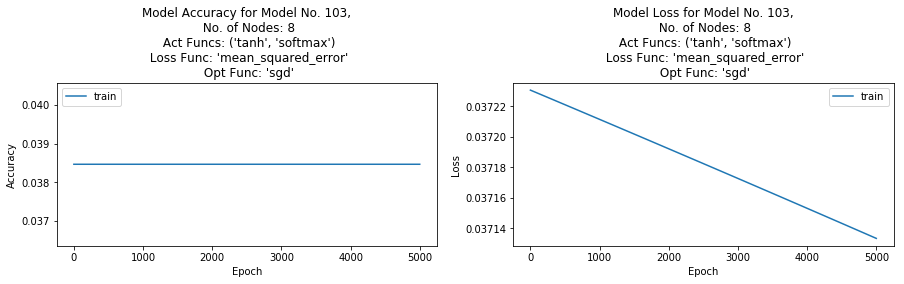

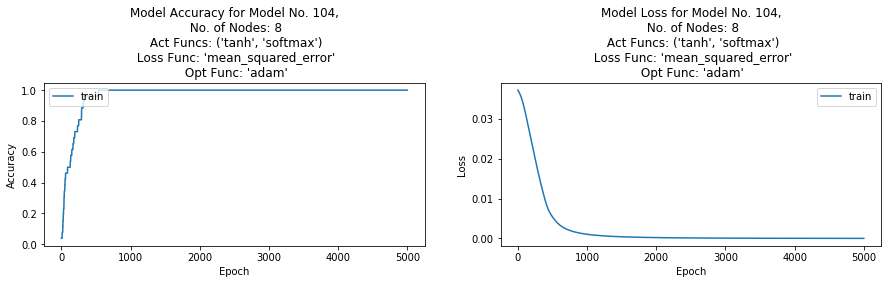

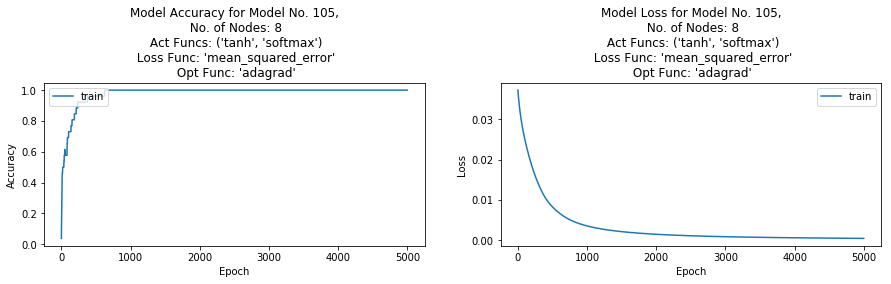

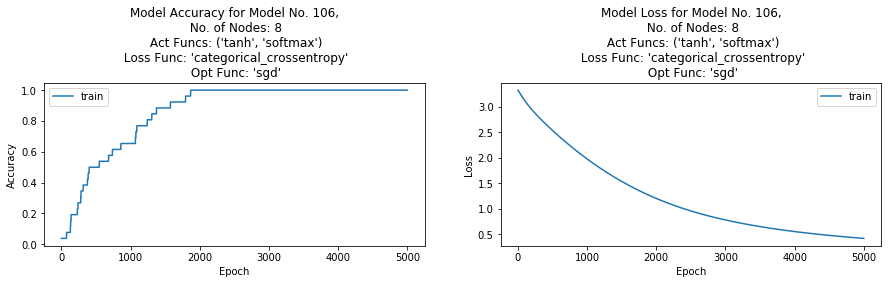

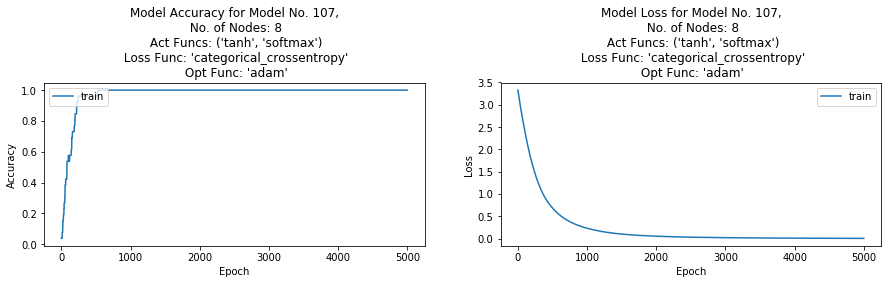

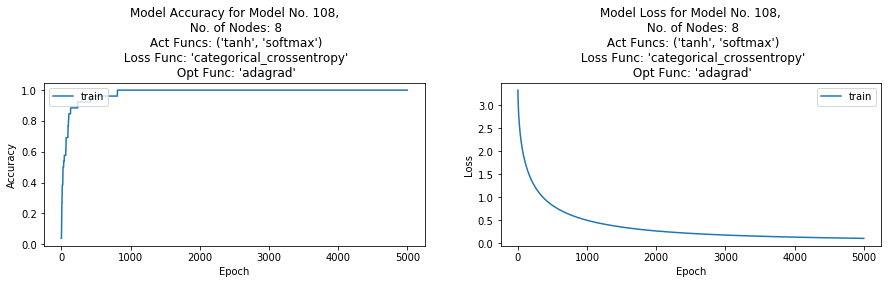

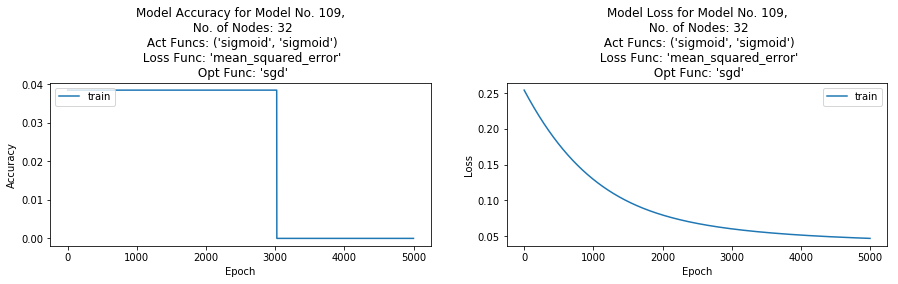

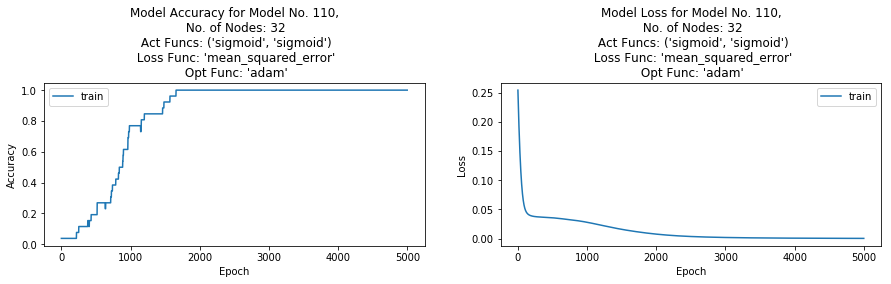

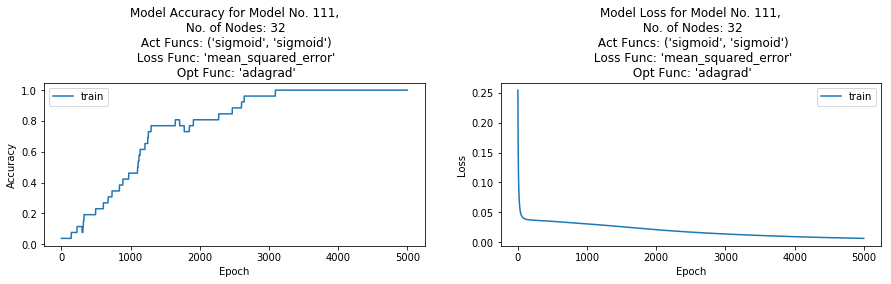

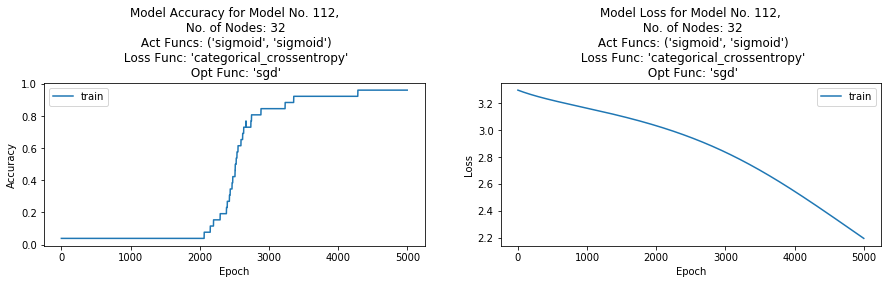

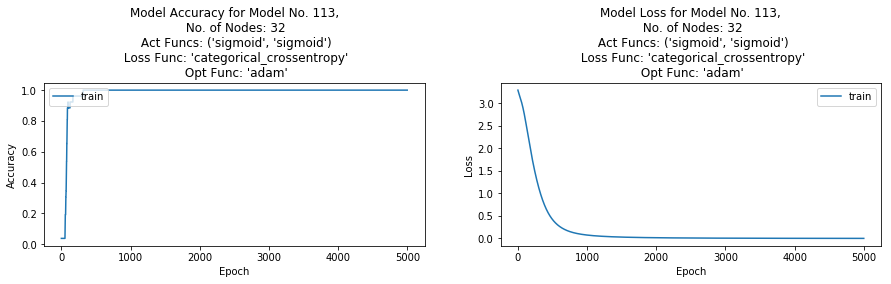

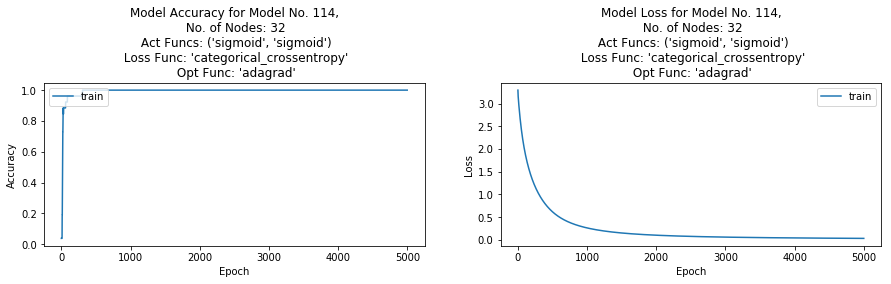

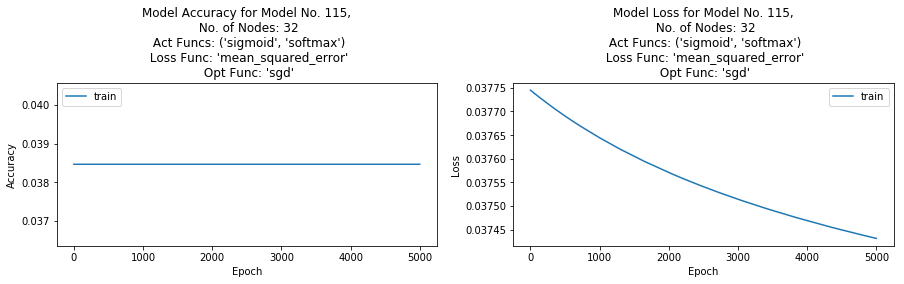

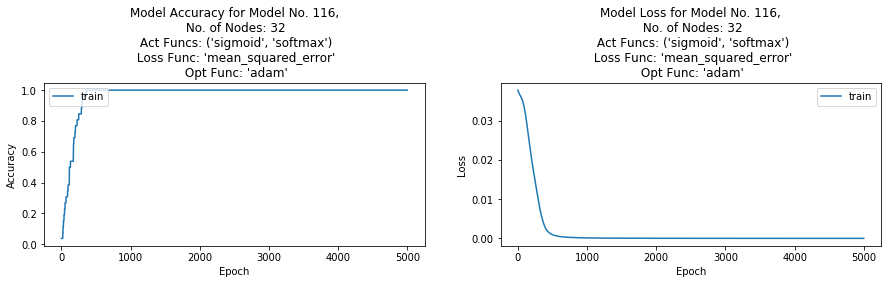

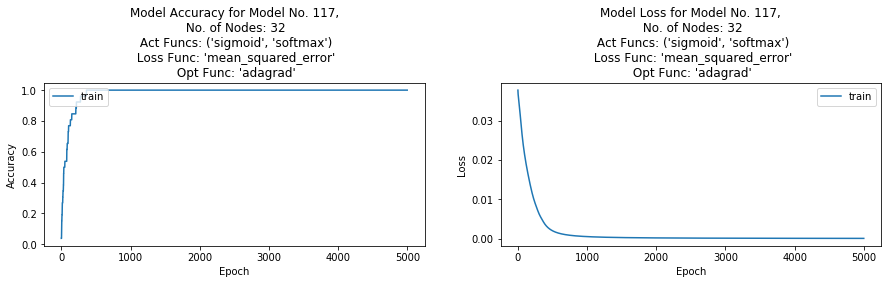

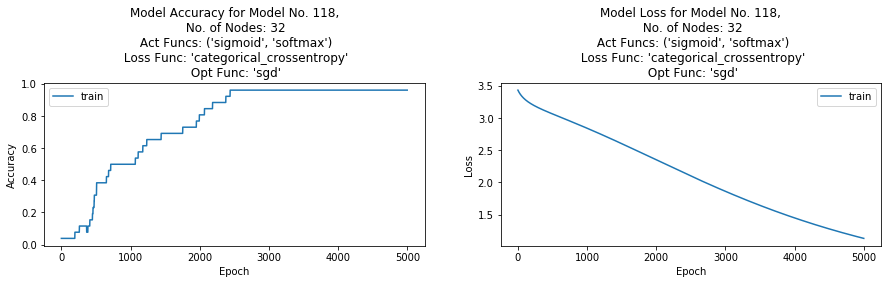

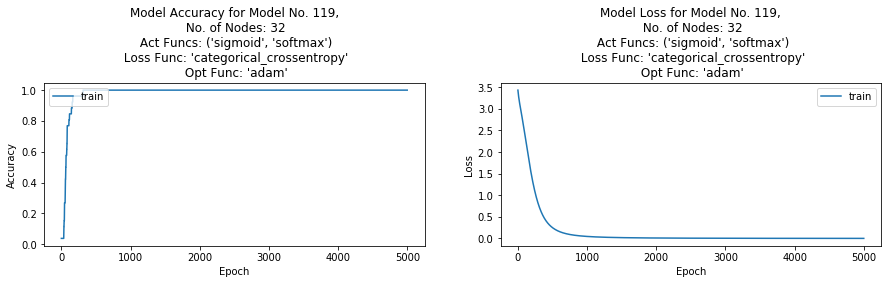

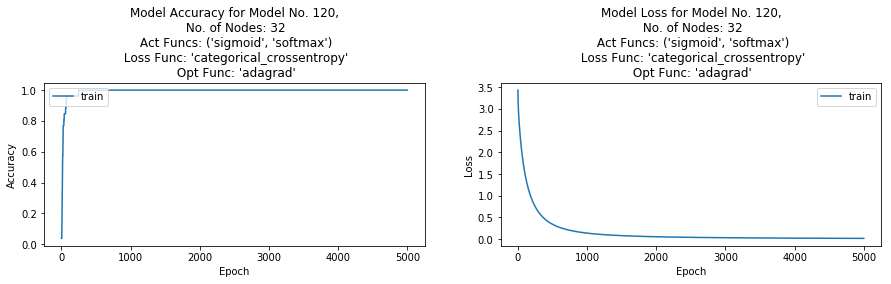

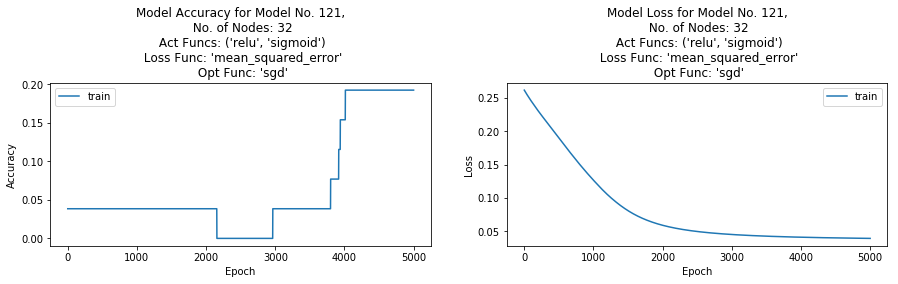

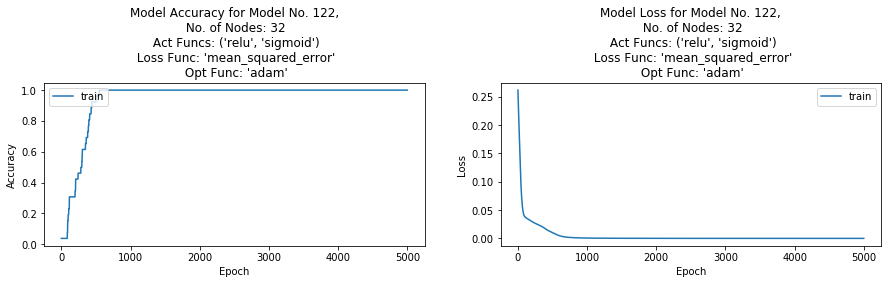

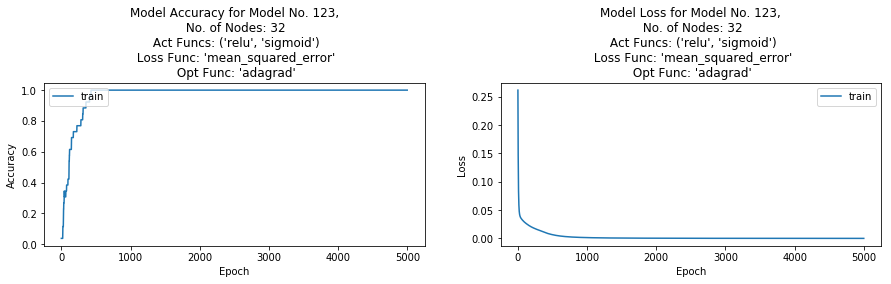

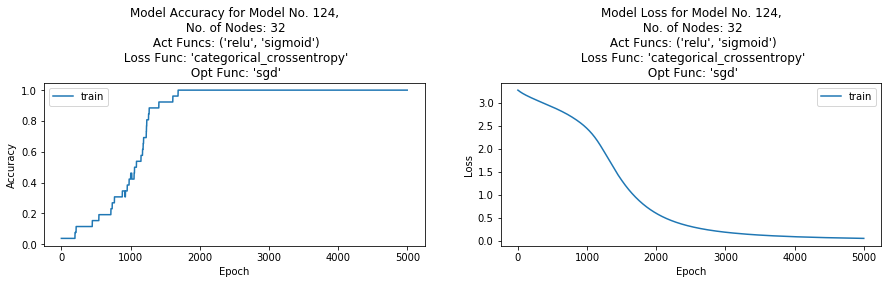

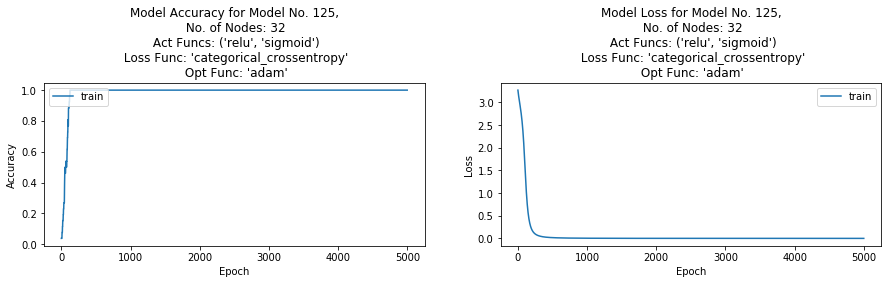

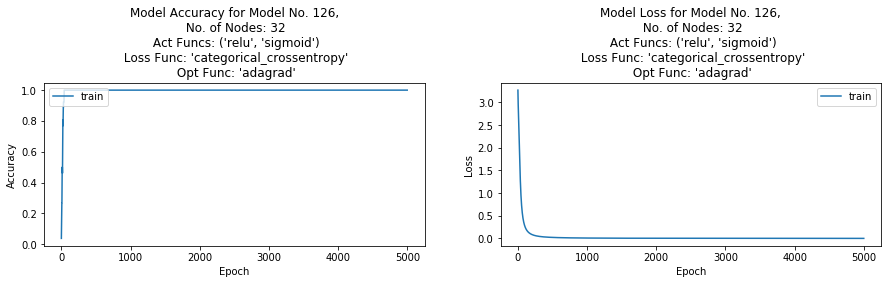

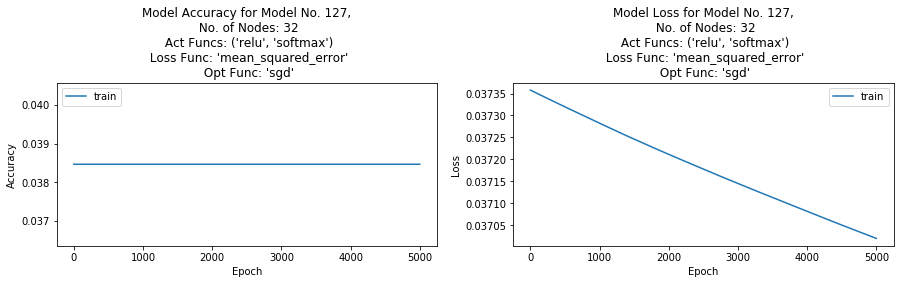

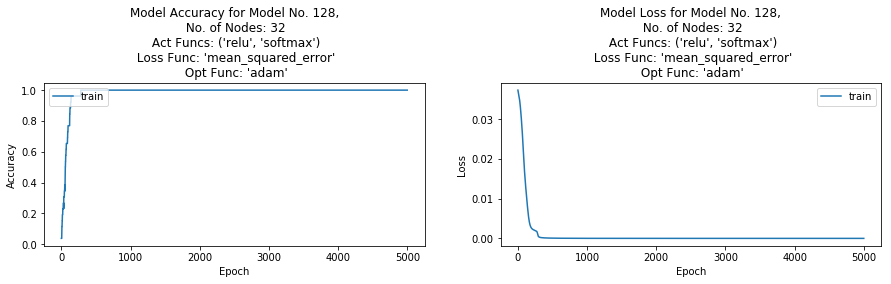

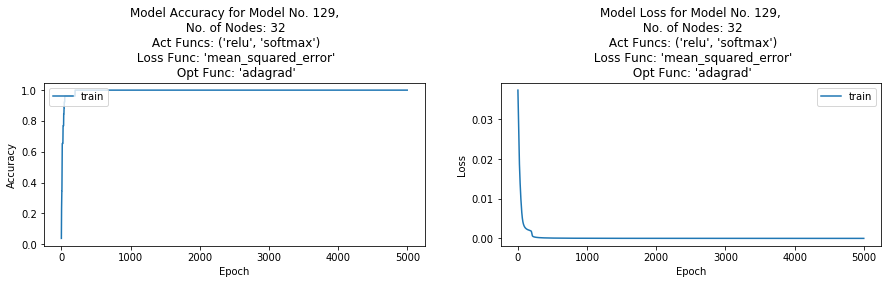

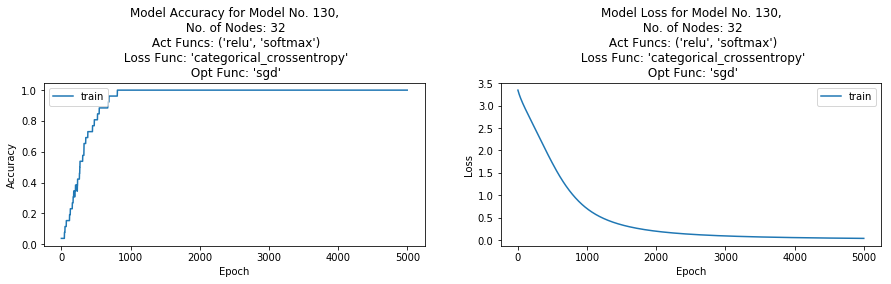

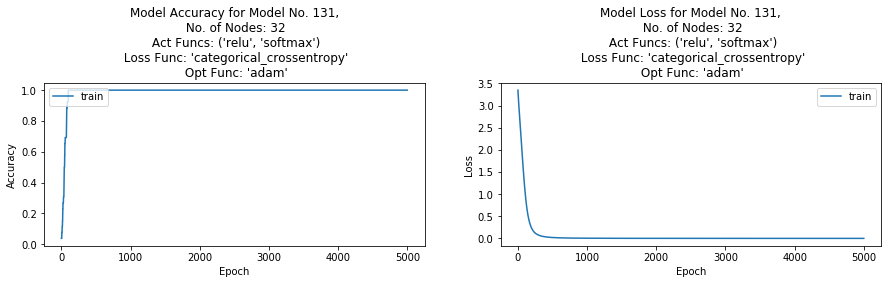

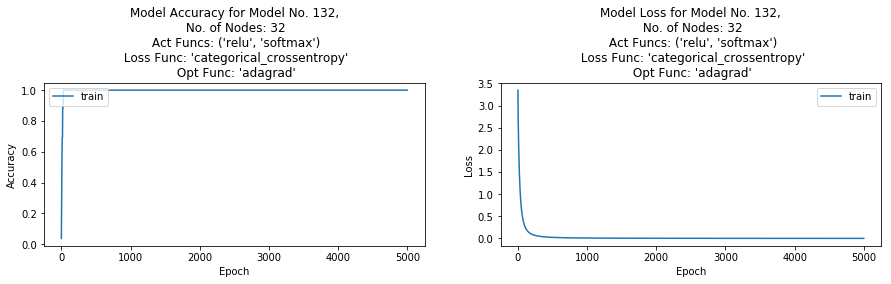

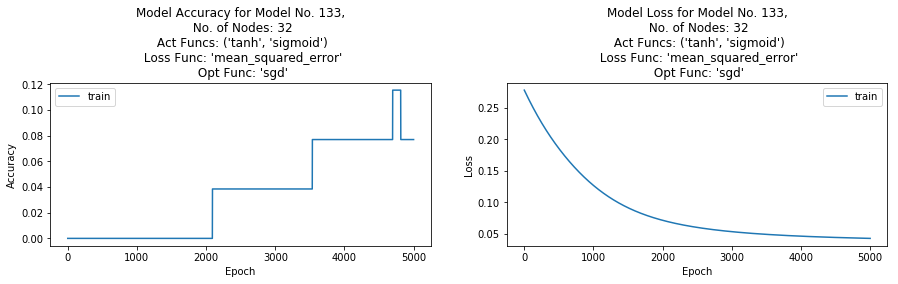

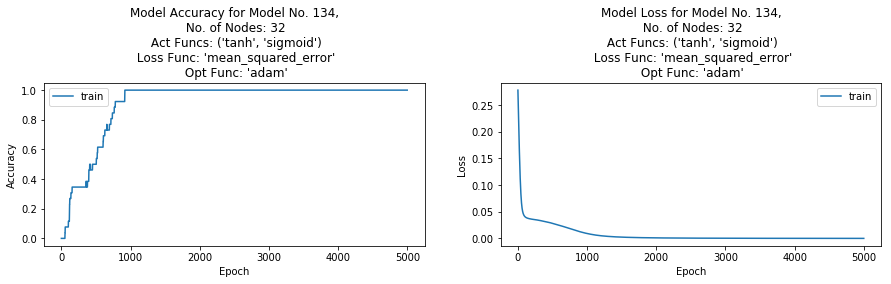

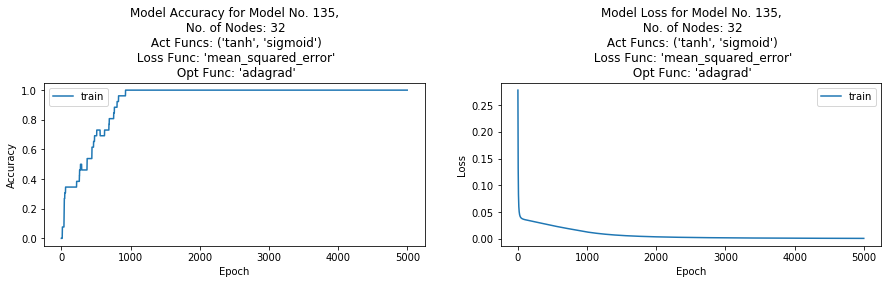

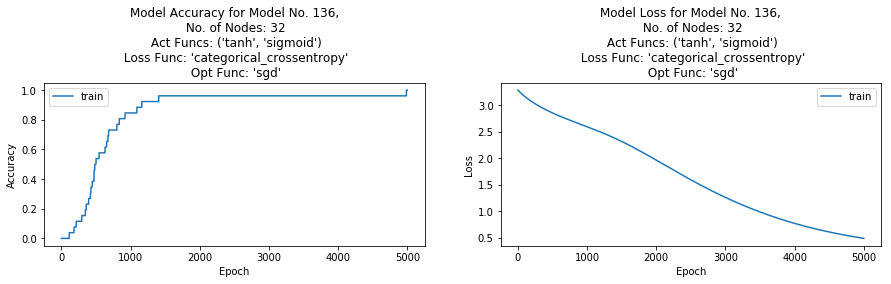

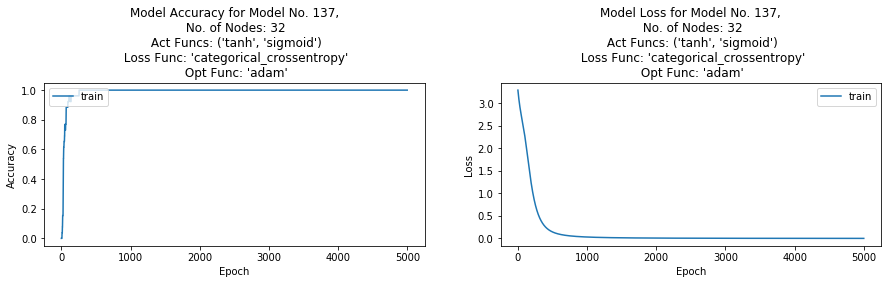

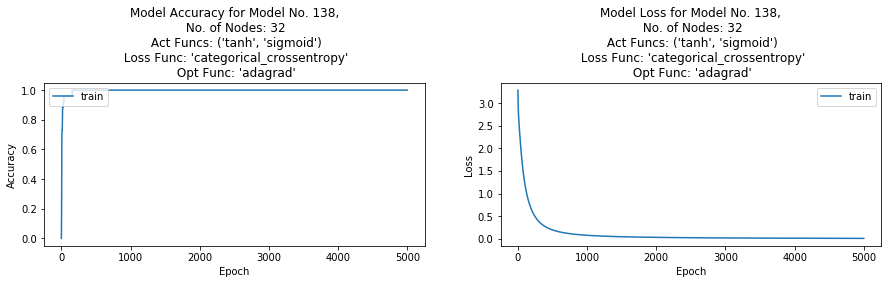

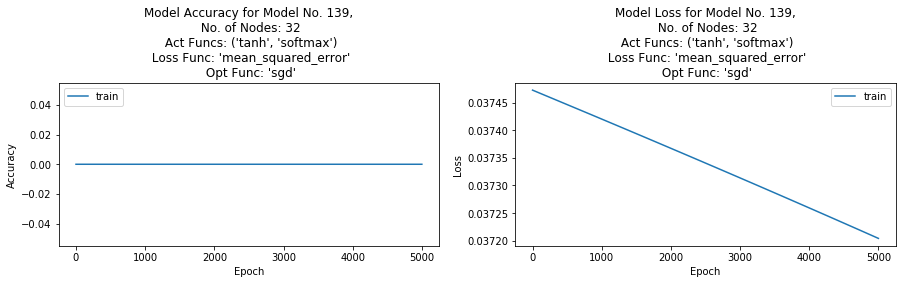

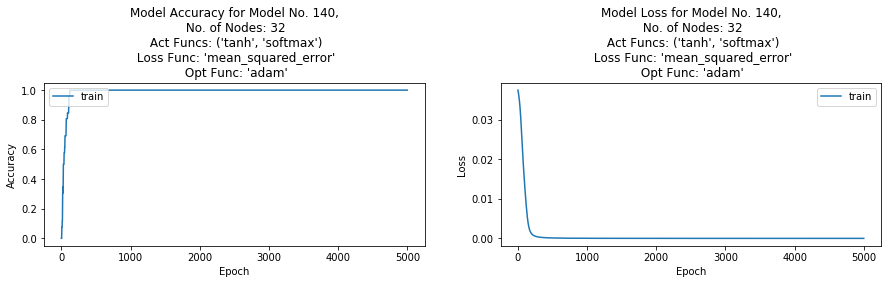

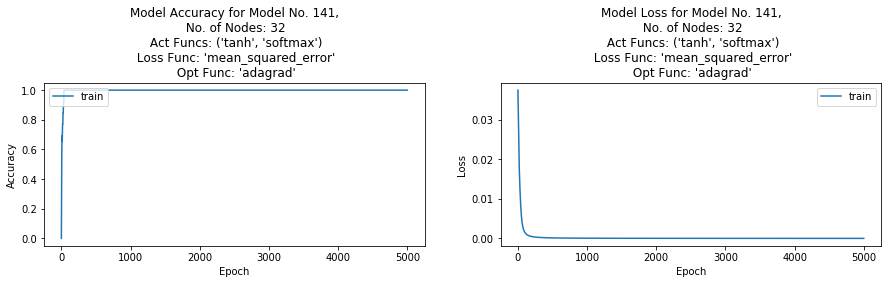

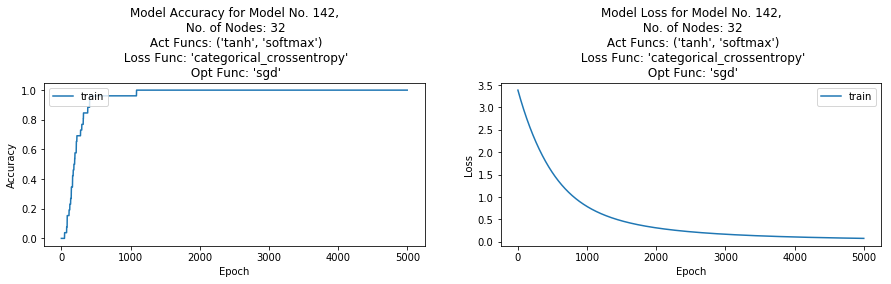

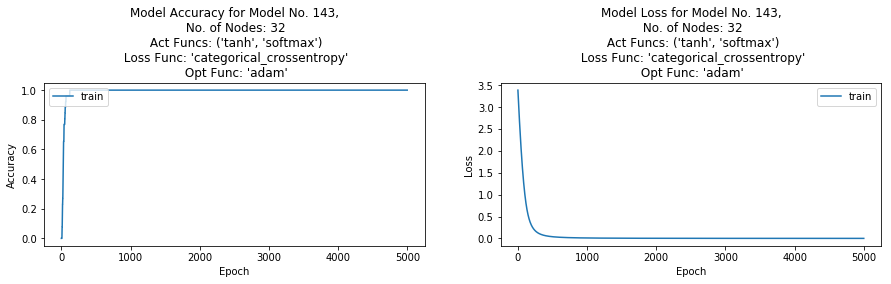

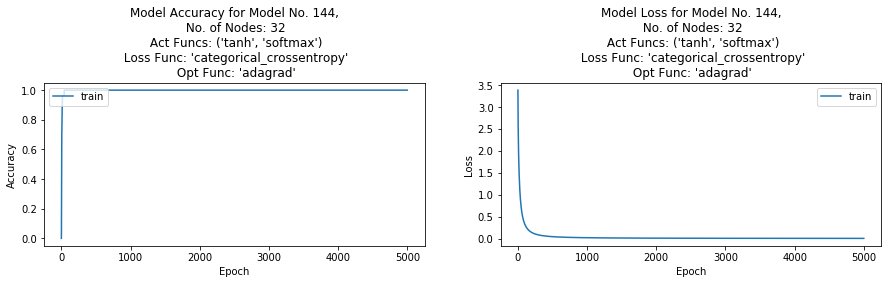

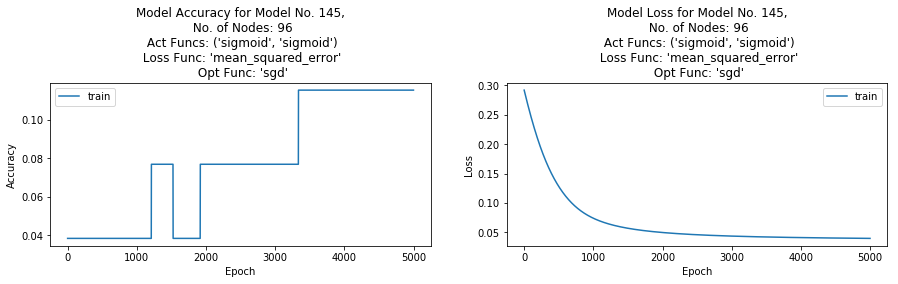

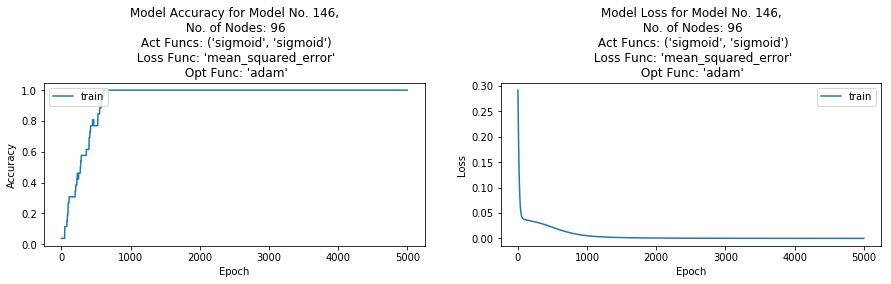

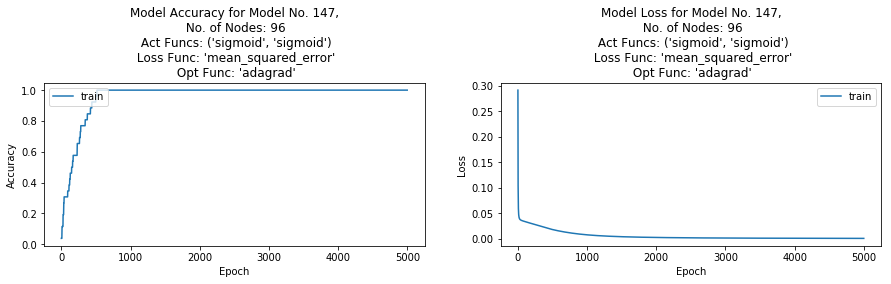

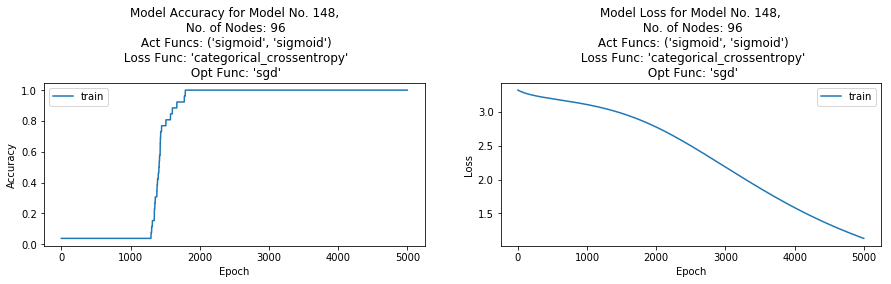

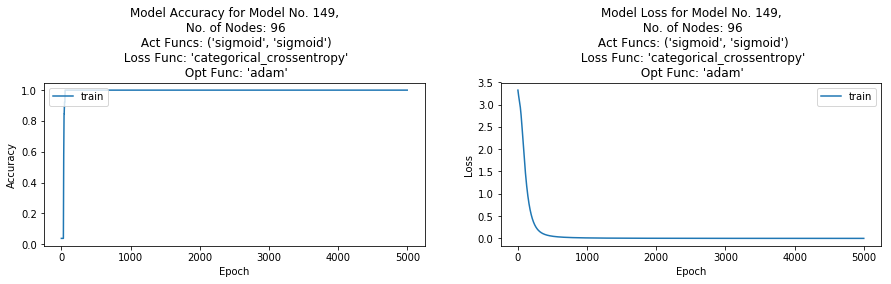

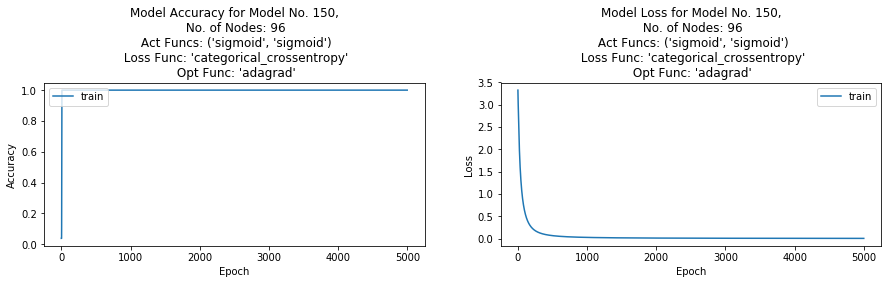

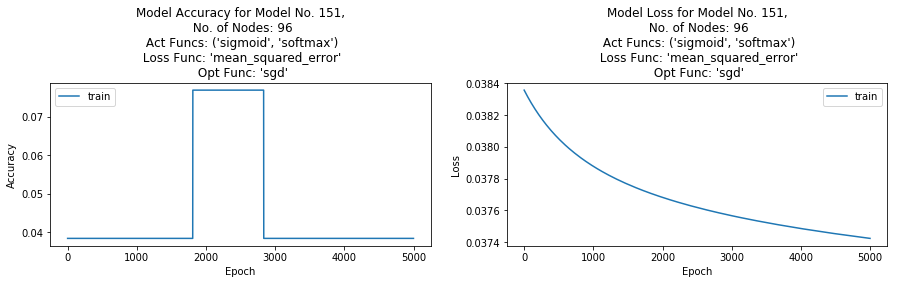

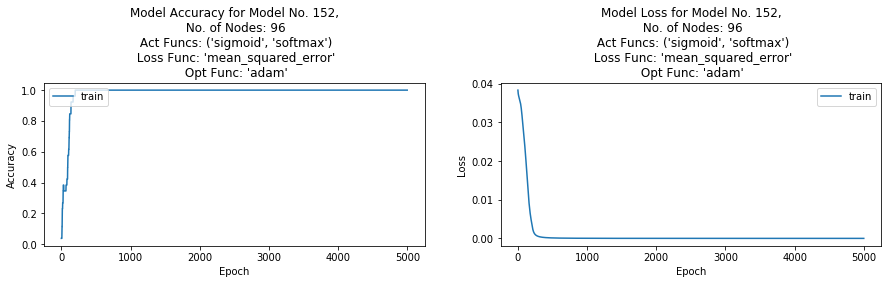

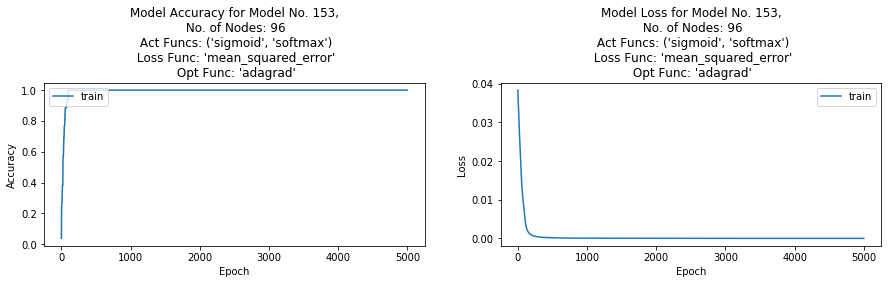

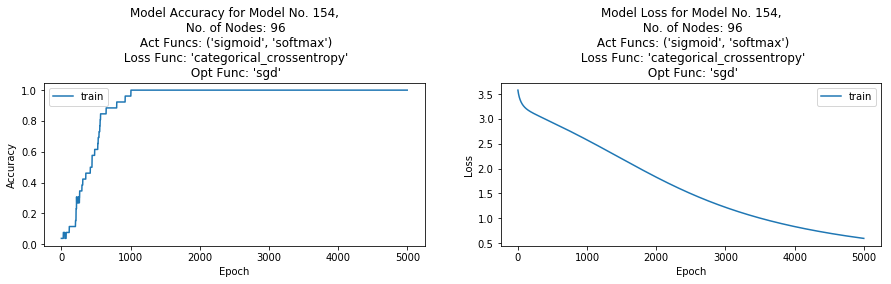

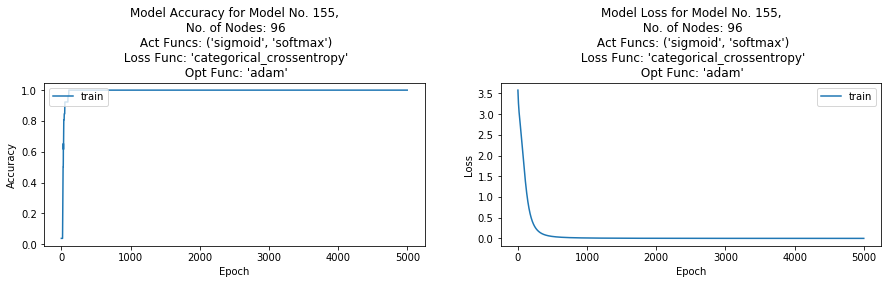

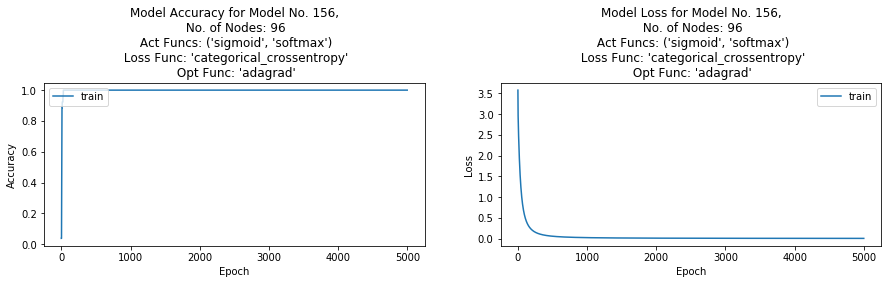

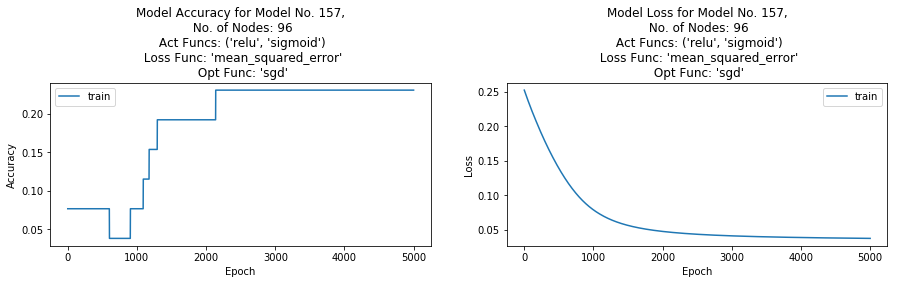

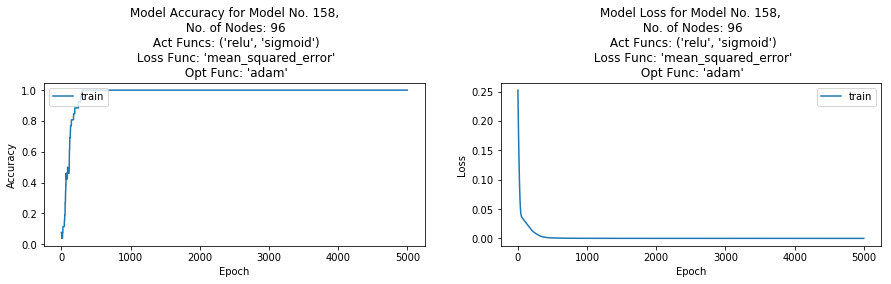

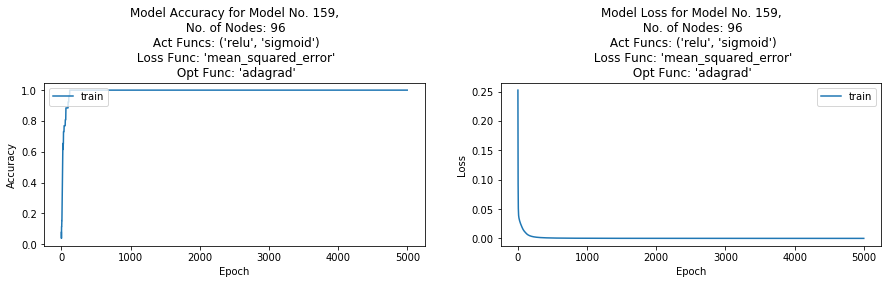

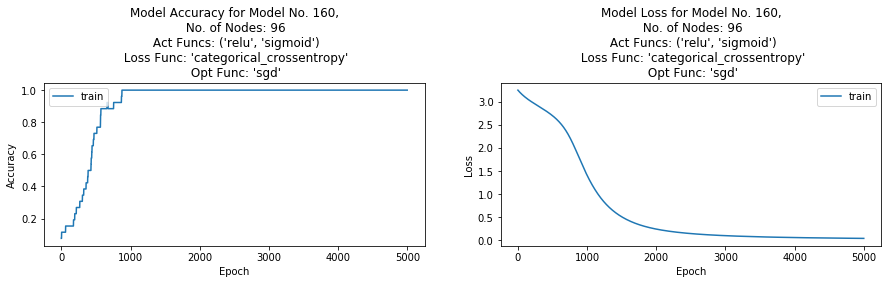

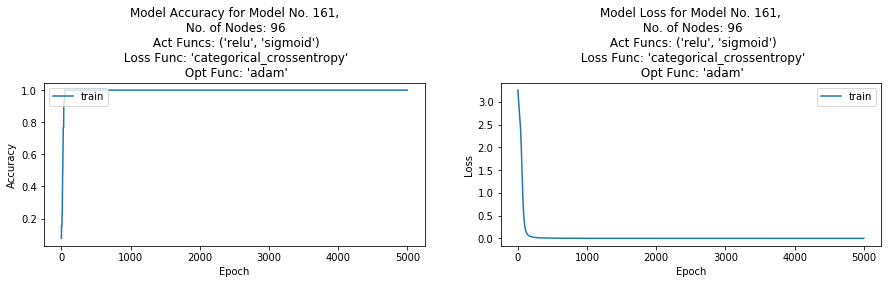

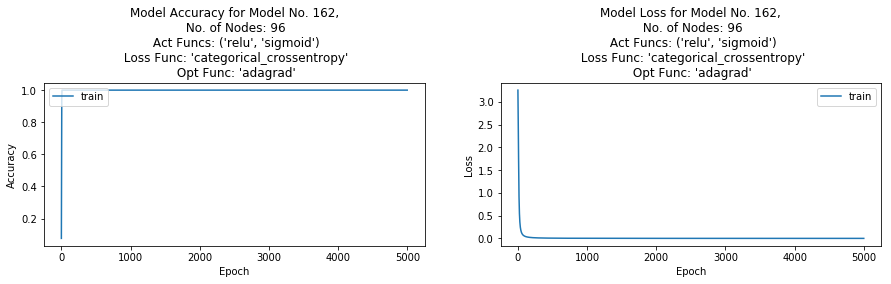

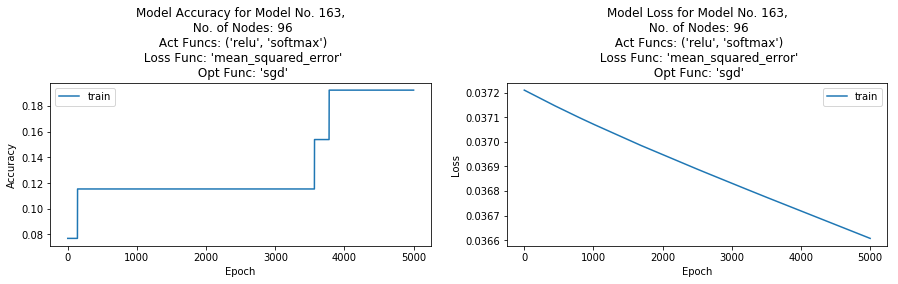

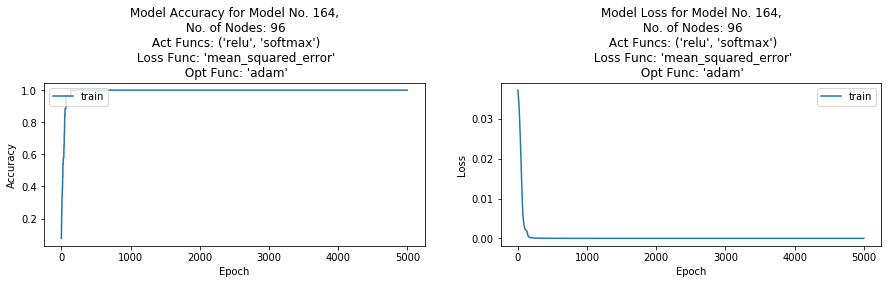

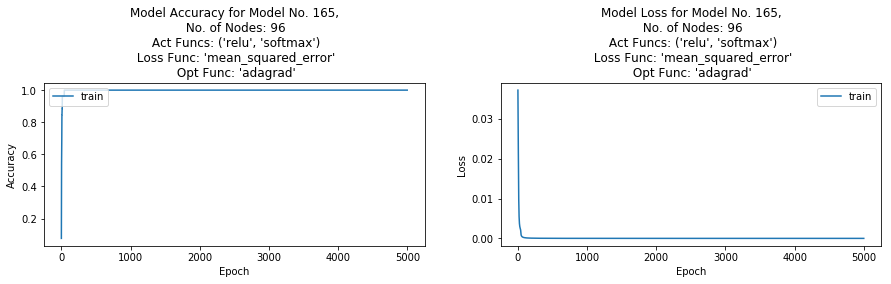

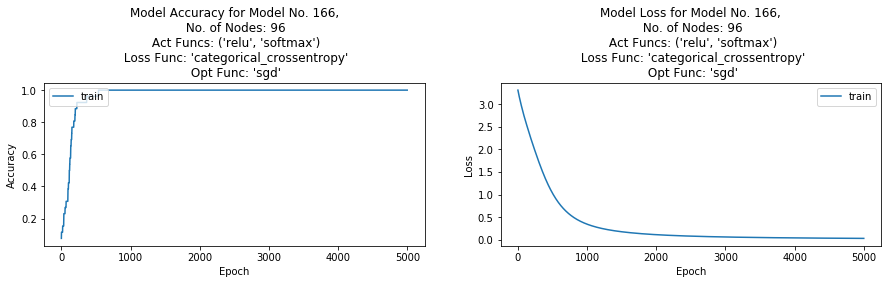

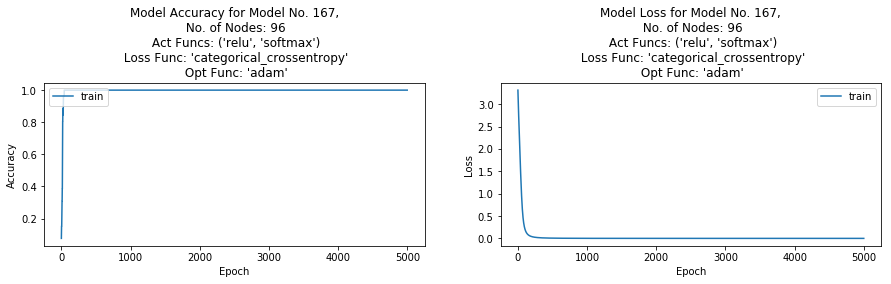

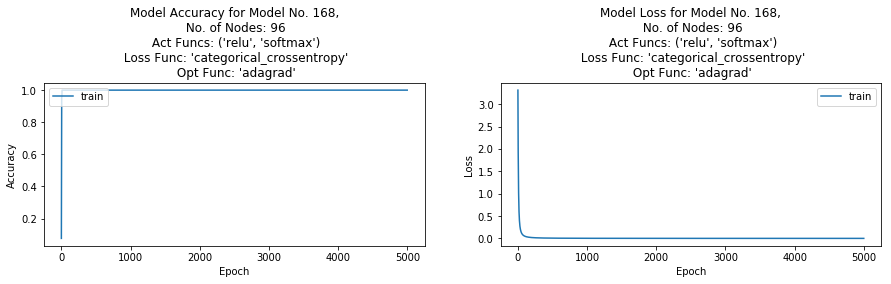

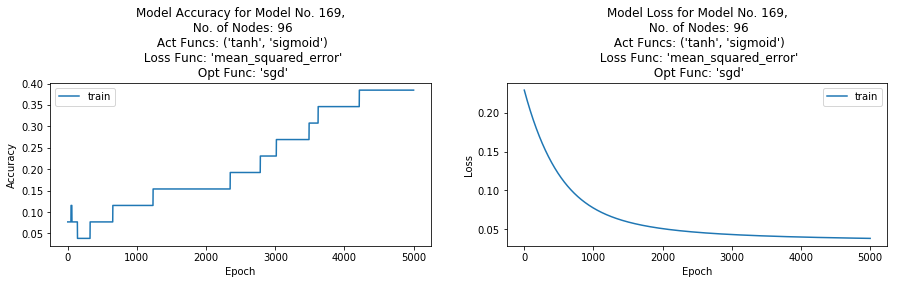

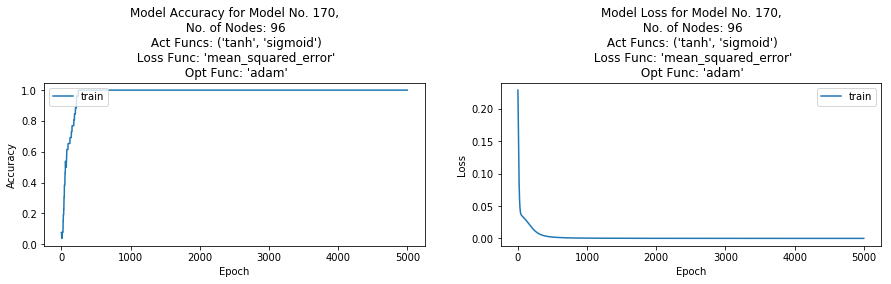

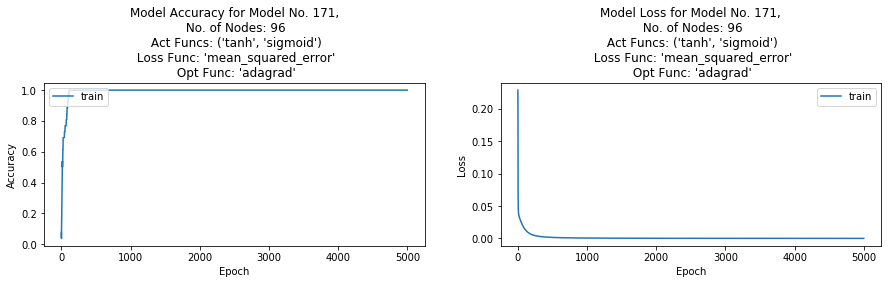

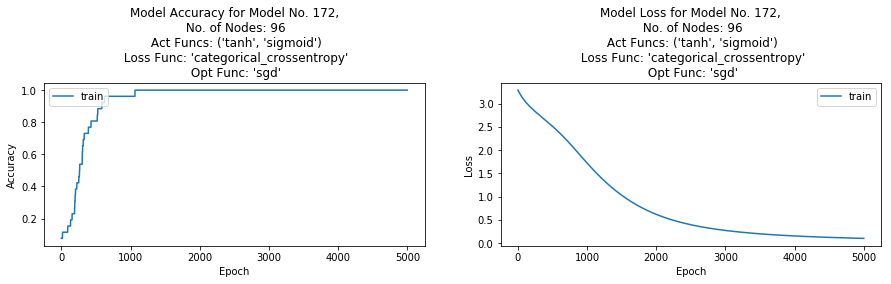

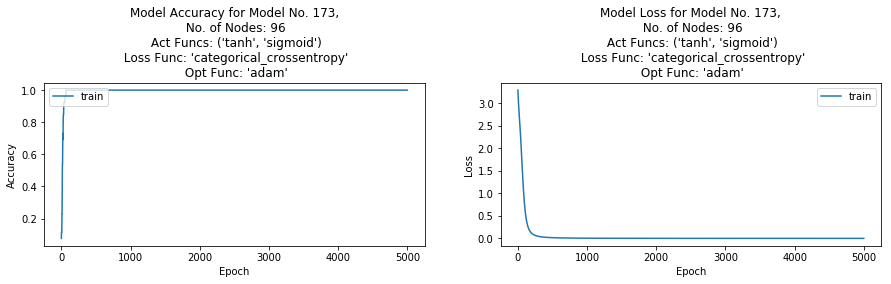

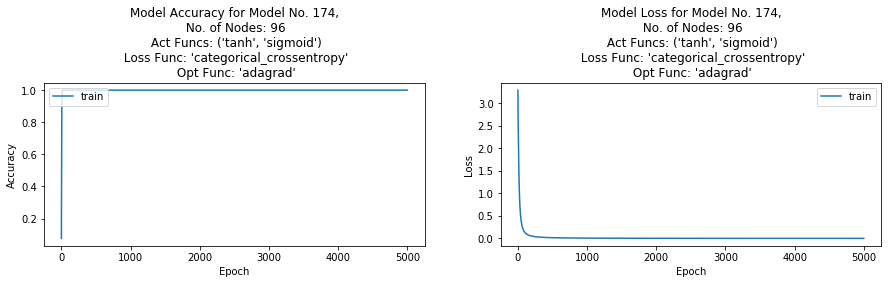

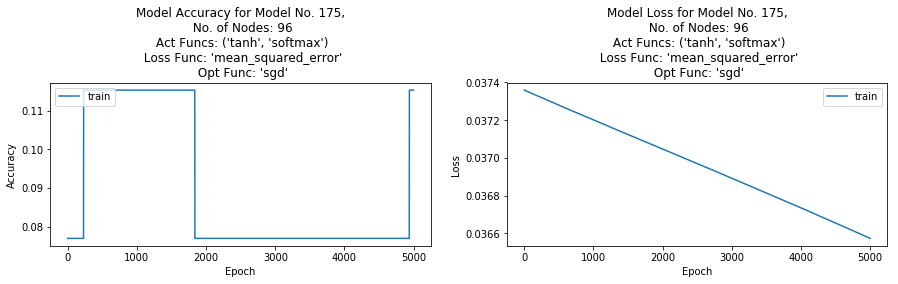

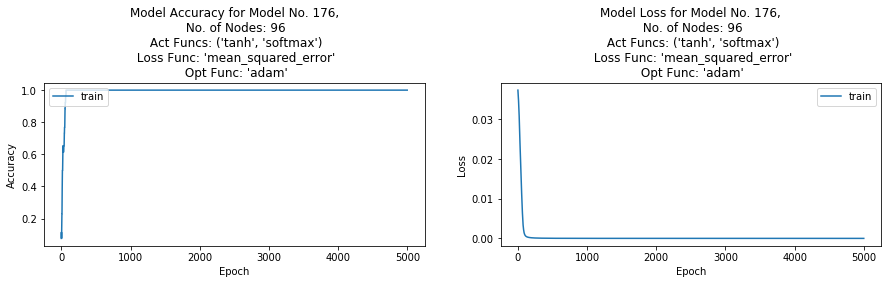

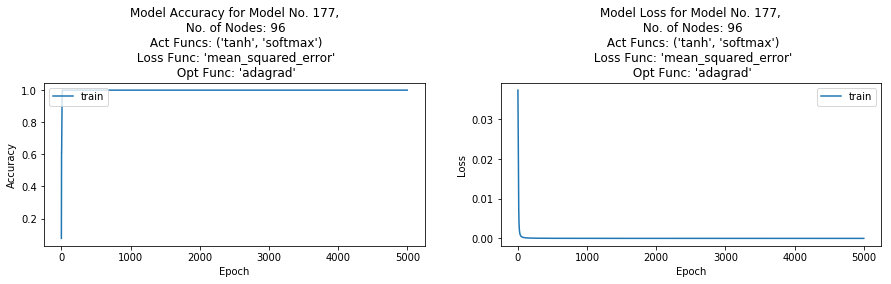

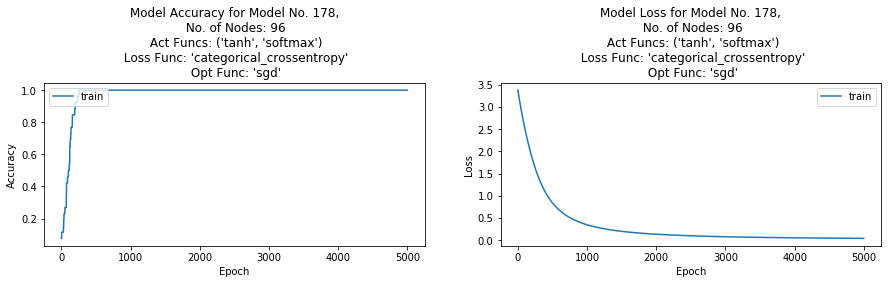

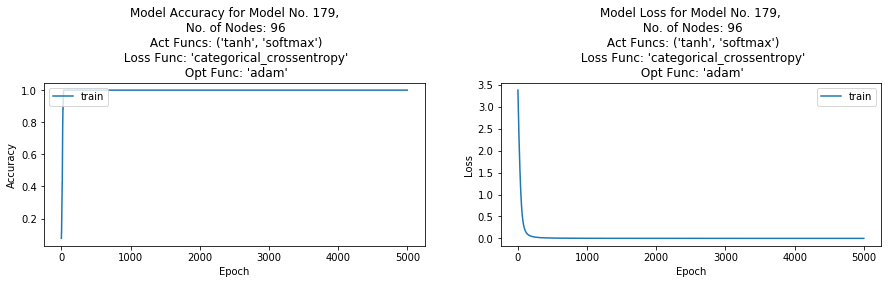

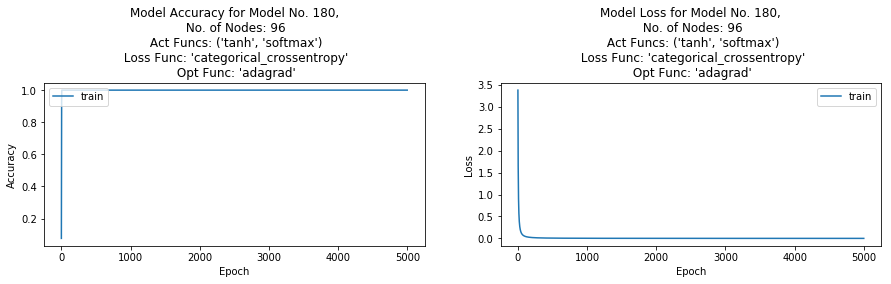

In [18]:
# Create a loop that uses Keras to model all model combinations to look for optimal model to solve XOR problem

for node in nodes:
    for act in hidden_activation:
        for out_act in out_activation:
            for l in loss_var:
                for opt in optimizer_var:

                    print('---------------------------------------------------------------')    
                    print("Model No.: %r" %model_id)
                    print("Number of Nodes: %r" %node)
                    print("Hidden Layer Activiation: %r" %act)
                    print("Output Layer Activiation: %r" %act)
                    print("Hidden Layer Loss Function: %r" %l)
                    print("Hidden Layer Optimizer: %r" %opt)
                    
                    start_time = time.clock() # start timer to evaluate how long it takes to train this base model
                    
                    # Set seeds for reproducible results
                    seed(1)
                    set_random_seed(2)
                    rn.seed(3)

                    # Create Model
                    model = Sequential()
                    model.add(Dense(node, input_dim=81, activation=act))
                    model.add(Dense(26, activation=out_act))

                    model.compile(loss=l,
                                  optimizer=opt,
                                  metrics=['categorical_accuracy'])

                    # Fit the model and create a histry for evaluation
                    history = model.fit(X_train, y_train, epochs=num_epochs, verbose=0)
                    #model.summary()
                    #model.get_weights()
                    evalu = model.evaluate(X_train, y_train, verbose=0)
                    
                    end_time = time.clock() # end timer
                    runtime = end_time - start_time  # seconds of wall-clock time 
                    print("\nProcessing time (seconds): %f" % runtime)  # print process time to train model        
                    processing_time.append(runtime) # append process time results to list for comparison table

                    # Plot figures
                    plot_figs('categorical_accuracy', 'loss', model_id, node, act, out_act, l, opt)

                    # Print validation accuracy
                    #print("Configuration Accuracy: %r" %evalu[1:])  # Not used
                    #validation_performance_results.append(evalu[1:]) # Not used
                    
                    # Identify and print maximum accuracy and epoch where that accuracy was realized
                    epoch_max = np.argmax(history.history['categorical_accuracy'])
                    acc_max = max(history.history['categorical_accuracy'])
                    print('Maxium Accuarcy: %r, Epochs Required to Achieve this Accuracy: %r' %(acc_max, epoch_max))
                    
                    # Append lists with values for this model ID
                    model_id_list.append(model_id) # initial model ID
                    node_list.append(node)
                    hidden_activation_list.append(act)
                    out_activation_list.append(out_act)
                    loss_var_list.append(l)
                    optimizer_var_list.append(opt)
                    max_acc_list.append(acc_max)
                    epoch_max_list.append(epoch_max)
                    
                    model_id += 1

In [24]:
# Create a dictionary to store the results of the trained models from code above.
data = OrderedDict([('Model ID', model_id_list),
                        ('Nodes', node_list),
                        ('Hidden Layer Activation', hidden_activation_list),
                        ('Output Layer Activation', out_activation_list),
                        ('Loss Function', loss_var_list),
                        ('Optimizer', optimizer_var_list),
                        ('Processing Time', processing_time),
                        ('Maximum Accuracy', max_acc_list),
                        ('No. of Epochs to Max Acc.',epoch_max_list)])

In [25]:
# Pickle the data for use in the future without having to run models again.  Write to binary file
file_name = 'Letter_NNModel_Compare_Results.pickle'
with open(file_name, 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

print('\n Run complete. Data objects sent to binary file %r' %file_name)


 Run complete. Data objects sent to binary file 'Letter_NNModel_Compare_Results.pickle'


In [259]:
# Extract objects from the dictionary object data
pickle_in = open(file_name,"rb")
data = pickle.load(pickle_in)

print('\n Loading of data complete. The binary file %r has been loaded' %file_name)


 Loading of data complete. The binary file 'Letter_NNModel_Compare_Results.pickle' has been loaded


In [260]:
# Create a table to display results of this experiment
results = pd.DataFrame(data)
print('\nTable 2: Benchmark Experiment: Keras Neural Networks for Letter Identification\n')
results 


Table 2: Benchmark Experiment: Keras Neural Networks for Letter Identification



Model ID  Nodes Hidden Layer Activation Output Layer Activation  \
0           1      2                 sigmoid                 sigmoid   
1           2      2                 sigmoid                 sigmoid   
2           3      2                 sigmoid                 sigmoid   
3           4      2                 sigmoid                 sigmoid   
4           5      2                 sigmoid                 sigmoid   
5           6      2                 sigmoid                 sigmoid   
6           7      2                 sigmoid                 softmax   
7           8      2                 sigmoid                 softmax   
8           9      2                 sigmoid                 softmax   
9          10      2                 sigmoid                 softmax   
10         11      2                 sigmoid                 softmax   
11         12      2                 sigmoid                 softmax   
12         13      2                    relu                 sigmoid   
13         14      2                    relu                 sigmoid   
14         15      2                    relu                 sigmoid   
15         16      2                    relu                 sigmoid   
16         17      2                    relu                 sigmoid   
17         18      2                    relu                 sigmoid   
18         19      2                    relu                 softmax   
19         20      2                    relu                 softmax   
20         21      2                    relu                 softmax   
21         22      2                    relu                 softmax   
22         23      2                    relu                 softmax   
23         24      2                    relu                 softmax   
24         25      2                    tanh                 sigmoid   
25         26      2                    tanh                 sigmoid   
26         27      2                    tanh                 sigmoid   
27         28      2                    tanh                 sigmoid   
28         29      2                    tanh                 sigmoid   
29         30      2                    tanh                 sigmoid   
30         31      2                    tanh                 softmax   
31         32      2                    tanh                 softmax   
32         33      2                    tanh                 softmax   
33         34      2                    tanh                 softmax   
34         35      2                    tanh                 softmax   
35         36      2                    tanh                 softmax   
36         37      4                 sigmoid                 sigmoid   
37         38      4                 sigmoid                 sigmoid   
38         39      4                 sigmoid                 sigmoid   
39         40      4                 sigmoid                 sigmoid   
40         41      4                 sigmoid                 sigmoid   
41         42      4                 sigmoid                 sigmoid   
42         43      4                 sigmoid                 softmax   
43         44      4                 sigmoid                 softmax   
44         45      4                 sigmoid                 softmax   
45         46      4                 sigmoid                 softmax   
46         47      4                 sigmoid                 softmax   
47         48      4                 sigmoid                 softmax   
48         49      4                    relu                 sigmoid   
49         50      4                    relu                 sigmoid   
50         51      4                    relu                 sigmoid   
51         52      4                    relu                 sigmoid   
52         53      4                    relu                 sigmoid   
53         54      4                    relu                 sigmoid   
54         55      4                    relu 

In [261]:
# Look at all models that have a perfect accruacy
print('\nTable 3: Neural Network Models that Provide Perfect Accuracy After Training\n')
results[results['Maximum Accuracy']==1]


Table 3: Neural Network Models that Provide Perfect Accuracy After Training



Model ID  Nodes Hidden Layer Activation Output Layer Activation  \
55         56      4                    relu                 softmax   
56         57      4                    relu                 softmax   
58         59      4                    relu                 softmax   
59         60      4                    relu                 softmax   
67         68      4                    tanh                 softmax   
76         77      8                 sigmoid                 sigmoid   
79         80      8                 sigmoid                 softmax   
80         81      8                 sigmoid                 softmax   
82         83      8                 sigmoid                 softmax   
87         88      8                    relu                 sigmoid   
88         89      8                    relu                 sigmoid   
89         90      8                    relu                 sigmoid   
91         92      8                    relu                 softmax   
92         93      8                    relu                 softmax   
93         94      8                    relu                 softmax   
94         95      8                    relu                 softmax   
95         96      8                    relu                 softmax   
103       104      8                    tanh                 softmax   
104       105      8                    tanh                 softmax   
105       106      8                    tanh                 softmax   
106       107      8                    tanh                 softmax   
107       108      8                    tanh                 softmax   
109       110     32                 sigmoid                 sigmoid   
110       111     32                 sigmoid                 sigmoid   
112       113     32                 sigmoid                 sigmoid   
113       114     32                 sigmoid                 sigmoid   
115       116     32                 sigmoid                 softmax   
116       117     32                 sigmoid                 softmax   
118       119     32                 sigmoid                 softmax   
119       120     32                 sigmoid                 softmax   
121       122     32                    relu                 sigmoid   
122       123     32                    relu                 sigmoid   
123       124     32                    relu                 sigmoid   
124       125     32                    relu                 sigmoid   
125       126     32                    relu                 sigmoid   
127       128     32                    relu                 softmax   
128       129     32                    relu                 softmax   
129       130     32                    relu                 softmax   
130       131     32                    relu                 softmax   
131       132     32                    relu                 softmax   
133       134     32                    tanh                 sigmoid   
134       135     32                    tanh                 sigmoid   
135       136     32                    tanh                 sigmoid   
136       137     32                    tanh                 sigmoid   
137       138     32                    tanh                 sigmoid   
139       140     32                    tanh                 softmax   
140       141     32                    tanh                 softmax   
141       142     32                    tanh                 softmax   
142       143     32                    tanh                 softmax   
143       144     32                    tanh                 softmax   
145       146     96                 sigmoid                 sigmoid   
146       147     96                 sigmoid                 sigmoid   
147       148     96                 sigmoid                 sigmoid   
148       149     96                 sigmoid                 sigmoid   
149       150     96                 sigmoid 

In [28]:
# Take a look at how many models have an accurcy of 1, grouped by the number of nodes in the model
perfect_acc_count = results[results['Maximum Accuracy']==1].groupby('Nodes')['Maximum Accuracy'].size()
perfect_acc_count

Nodes
4      5
8     17
32    28
96    30
Name: Maximum Accuracy, dtype: int64

In [262]:
# Find the best model
#perfect_acc_table = results[results['Maximum Accuracy']==1]
#perfect_acc_table.loc[perfect_acc_table['No. of Epochs to Max Acc.'].idxmin()]

# Find the model to use in this experiment.  I want to explore the sigmoid activation layer further, so I chose
    # not to use the model trained the quickest.
print('\nTable 4: Neural Network Models that Provice Perfect Accuracy After 10 or Fewer Epochs\n')
perfect_acc_table1 = results[results['Maximum Accuracy']==1]
perfect_acc_table1.loc[perfect_acc_table1['No. of Epochs to Max Acc.']<10]


Table 4: Neural Network Models that Provice Perfect Accuracy After 10 or Fewer Epochs



Model ID  Nodes Hidden Layer Activation Output Layer Activation  \
149       150     96                 sigmoid                 sigmoid   
161       162     96                    relu                 sigmoid   
167       168     96                    relu                 softmax   
179       180     96                    tanh                 softmax   

                Loss Function Optimizer  Processing Time  Maximum Accuracy  \
149  categorical_crossentropy   adagrad        14.296200               1.0   
161  categorical_crossentropy   adagrad        15.481363               1.0   
167  categorical_crossentropy   adagrad        16.858742               1.0   
179  categorical_crossentropy   adagrad        16.455259               1.0   

     No. of Epochs to Max Acc.  
149                          8  
161                          8  
167                          9  
179                          5



#### 4.3 Experiement #2 - Investigate Hidden Layer Node Activity in a Neural Network Model with a Large Number of Nodes
***

The results from Experiment #1 were used to identify a good model to focus on for the purpose of investigating they activity occuring in the hidden layer.  Once fitted using Keras, the weights and outputs from each node will be investigated to find out what is occuring and how the model is learning from the input data.  Additionally, a visualization of how each node is activating with each input category will be developed to provide greater insight into the workings of this hidden layer.  This will be accomplished by extracting the hidden layer output values for each input category and graphing them in a visual manner.  I also suspect that looking at the nodes with the strongest activations may also add some insight into patterns that may be impacting the desired outputs.

In [314]:
model_id = 149.2
node = 96
act = 'sigmoid'
out_act = 'sigmoid'
l = 'categorical_crossentropy'
opt = 'adagrad'
num_epochs = 10 # A few extra compared to what is needed just in case

In [315]:
start_time = time.clock() # start timer to evaluate how long it takes to train this base model

# Set seeds for reproducible results
seed(1)
set_random_seed(2)
rn.seed(3)

# Create Model
model = Sequential()
model.add(Dense(node, input_dim=81, activation=act, name='hidden_layer'))
model.add(Dense(26, activation=out_act, name='output_layer'))

model.compile(loss=l,
              optimizer=opt,
              metrics=['categorical_accuracy'])

# Fit the model and create a histry for evaluation
history = model.fit(X_train, y_train, epochs=num_epochs, verbose=0)

end_time = time.clock() # end timer
runtime = end_time - start_time  # seconds of wall-clock time 
print("\nProcessing time (seconds): %f" % runtime)  # print process time to train model 

# Identify and print maximum accuracy and epoch where that accuracy was realized
epoch_max = np.argmax(history.history['categorical_accuracy'])
acc_max = max(history.history['categorical_accuracy'])
print('Maxium Accuarcy: %r, Epochs Required to Achieve this Accuracy: %r' %(acc_max, epoch_max))


Processing time (seconds): 4.412409
Maxium Accuarcy: 1.0, Epochs Required to Achieve this Accuracy: 8


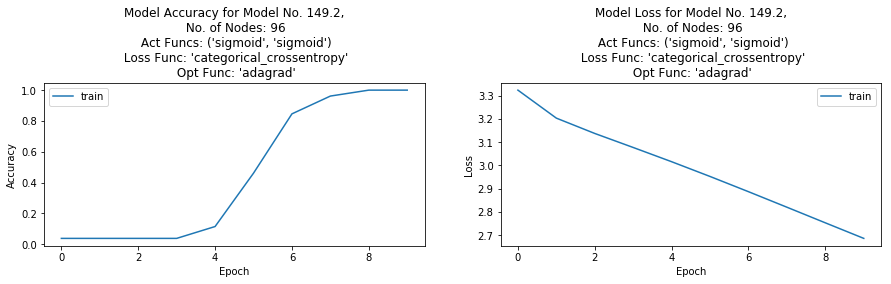

In [316]:
plot_figs('categorical_accuracy', 'loss', model_id, node, act, out_act, l, opt)

In [317]:
# Print the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 96)                7872      
_________________________________________________________________
output_layer (Dense)         (None, 26)                2522      
Total params: 10,394
Trainable params: 10,394
Non-trainable params: 0
_________________________________________________________________


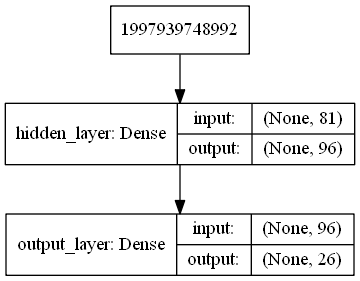

In [318]:
# Visualize this model
#from keras.utils import plot_model
#import IPython
plot_model(model, to_file='model.png',show_shapes=True, show_layer_names=True)
IPython.display.Image('model.png')

#https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
#https://medium.com/@zhang_yang/how-to-plot-keras-models-493469884fd5

In [319]:
# Print the model configuration
#model.get_config()

In [320]:
# Print the model weights and biases for each layer
hid_wts = model.get_weights()
hid_wts

[array([[ 0.16787729, -0.04757924,  0.16002691, ..., -0.04141013,
         -0.08750566, -0.11810407],
        [-0.02124725, -0.11111286,  0.20653485, ..., -0.10667074,
         -0.08404768,  0.00744551],
        [-0.07838183,  0.02385068,  0.06210875, ..., -0.2273874 ,
         -0.08231452,  0.02889234],
        ...,
        [-0.10059217,  0.09796816, -0.05324414, ...,  0.03471317,
          0.08865049,  0.01925539],
        [ 0.00100474, -0.02147005,  0.03765736, ..., -0.09959875,
          0.05144441, -0.1445905 ],
        [-0.05008907, -0.04576308,  0.21862018, ...,  0.2087901 ,
         -0.04852985,  0.12876557]], dtype=float32),
 array([ 0.0211222 , -0.01418149,  0.02996372, -0.03353162,  0.00878001,
        -0.02394149,  0.00227419, -0.00541051,  0.0424148 , -0.05684451,
         0.0526735 ,  0.0252114 ,  0.00879902, -0.0341449 , -0.0053481 ,
         0.01379693,  0.01112801, -0.01788476,  0.04680987,  0.04859675,
         0.03554752,  0.00910702,  0.01693071, -0.00919403,  0.006

Figure 2: Input Node to Hidden Layer Node Activation Weights


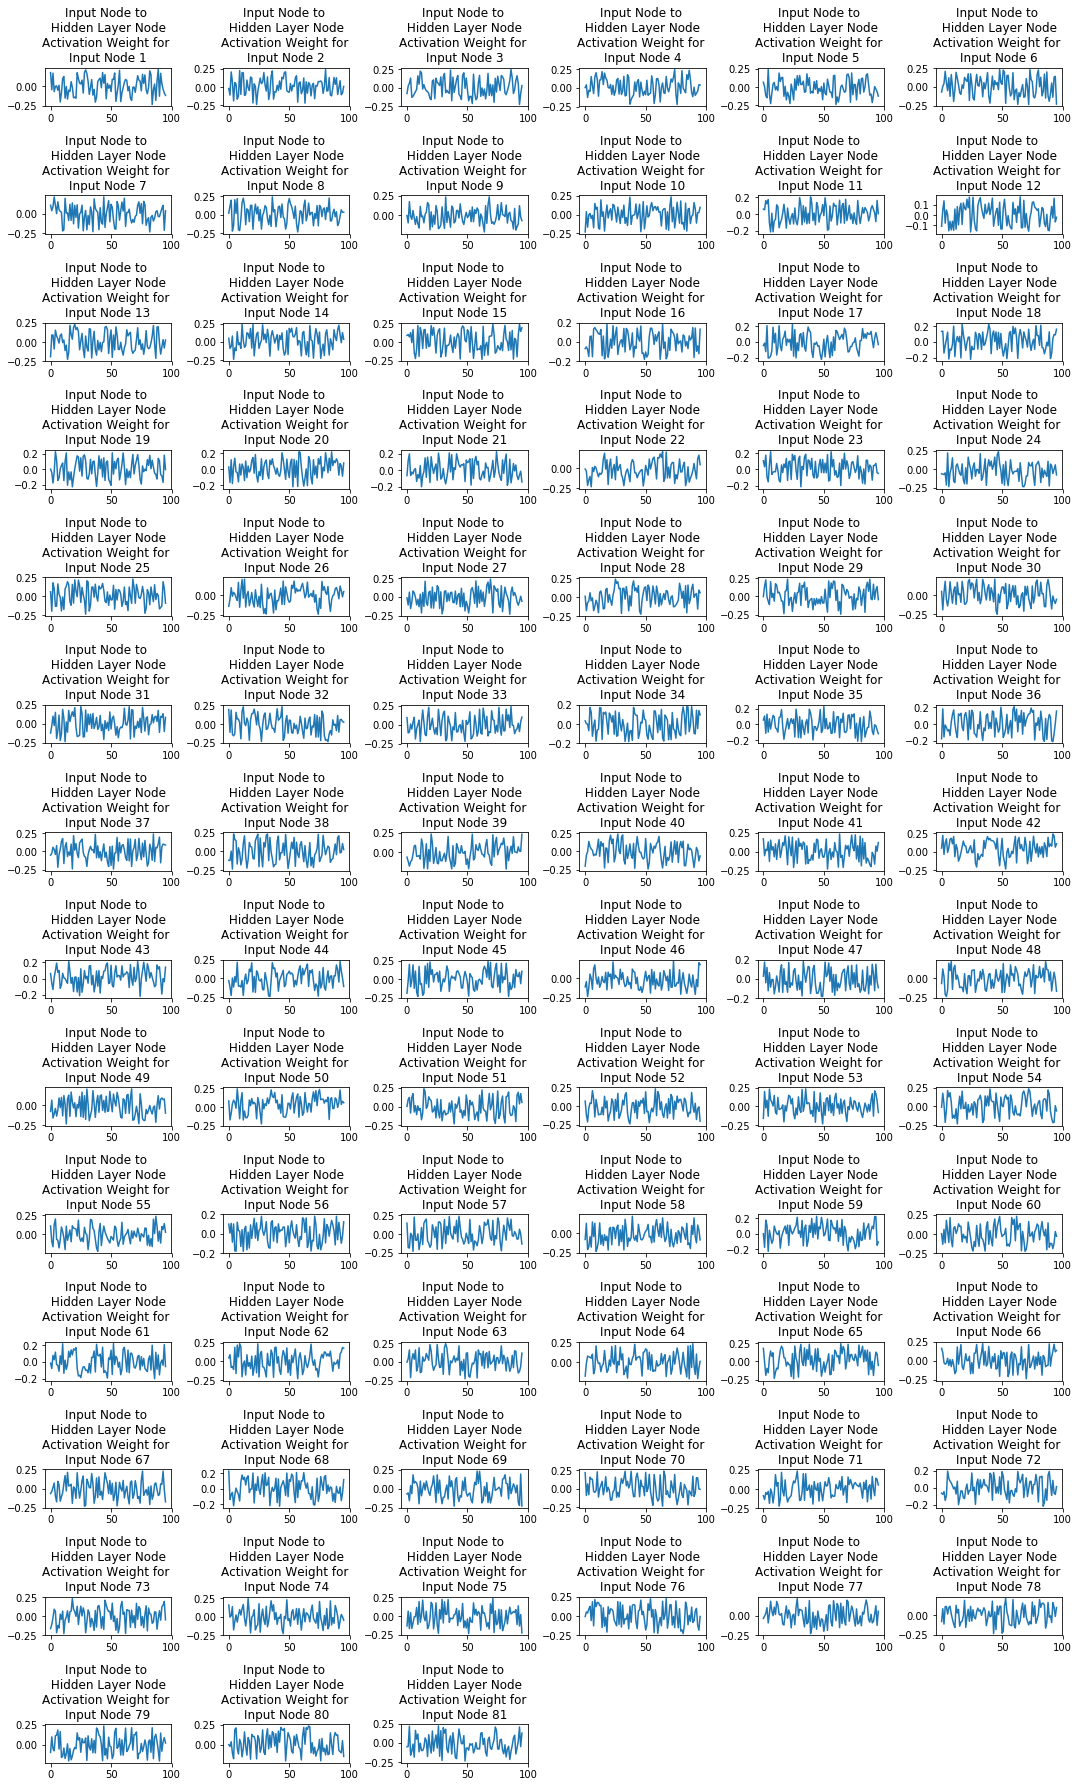

In [322]:
# Create plots to look at the hidden layer activations
print('Figure 2: Input Node to Hidden Layer Node Activation Weights')
fig = plt.figure(figsize=(15,30)) # Create figure, set fig size

for inp,num in zip(hid_wts[0], range(1,96)): # zip together the sliced array and the iteration number
    ax = fig.add_subplot(17,6,num) # Create and add the subplot
    ax.plot(inp) # Plot the subplot
    ax.set_title('Input Node to \n Hidden Layer Node \nActivation Weight for \nInput Node %r' %num) # Set plot title, call letter name from dict
    
plt.tight_layout()
plt.show() # Plot entire figure

In [297]:
# Take a look at the outputs for each node.
inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functor = K.function([inp, K.learning_phase()], outputs )   # evaluation function

# Testing
layer_outs = functor([X_train, 1.])
print(layer_outs)

# https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer

[array([[0.30864692, 0.46247894, 0.57555664, ..., 0.6719129 , 0.62847036,
        0.6689588 ],
       [0.47344878, 0.22638896, 0.552289  , ..., 0.3611079 , 0.5764184 ,
        0.5222354 ],
       [0.35185766, 0.41125667, 0.30773333, ..., 0.3082169 , 0.68058425,
        0.5231833 ],
       ...,
       [0.5663115 , 0.31305936, 0.65334827, ..., 0.74746025, 0.7353371 ,
        0.42536902],
       [0.6462512 , 0.29265255, 0.7012597 , ..., 0.63497823, 0.4805206 ,
        0.49270222],
       [0.5824034 , 0.397524  , 0.5385742 , ..., 0.69259083, 0.5194493 ,
        0.32034647]], dtype=float32), array([[0.42072415, 0.13603154, 0.14089525, 0.16047972, 0.1507136 ,
        0.19662958, 0.12435538, 0.29981312, 0.20553073, 0.1804415 ,
        0.1920957 , 0.15302044, 0.23000112, 0.20467615, 0.18817186,
        0.27686203, 0.13255063, 0.19166327, 0.14221552, 0.14431804,
        0.19043621, 0.17228404, 0.1933727 , 0.22927013, 0.1993137 ,
        0.1262581 ],
       [0.18445092, 0.35801542, 0.19012359, 0

In [298]:
# Check the shape of each layer's activations.  I would expect each layer to have a sample dimension
    # of 26 (26 letters), and the hidden layer to have a node dimension of 96 (96 nodes in layer), and 
    # the ouput layer to have a node dimension of 26 (26 outputs nodes in layer)
print('Shape of Hidden Layer Activiations: ', layer_outs[0].shape)
print('Shape of Output Layer Activiations: ', layer_outs[1].shape)

Shape of Hidden Layer Activiations:  (26, 96)
Shape of Output Layer Activiations:  (26, 26)


In [253]:
# Create a dictionary of all letters to label plots
letter_trans = {
    1:'A',
    2:'B',
    3:'C',
    4:'D',
    5:'E',
    6:'F',
    7:'G',
    8:'H',
    9:'I',
    10:'J',
    11:'K',
    12:'L',
    13:'M',
    14:'N',
    15:'O',
    16:'P',
    17:'Q',
    18:'R',
    19:'S',
    20:'T',
    21:'U',
    22:'V',
    23:'W',
    24:'X',
    25:'Y',
    26:'Z' 
}

Figure 3: Output Activation Plots for Each Letter


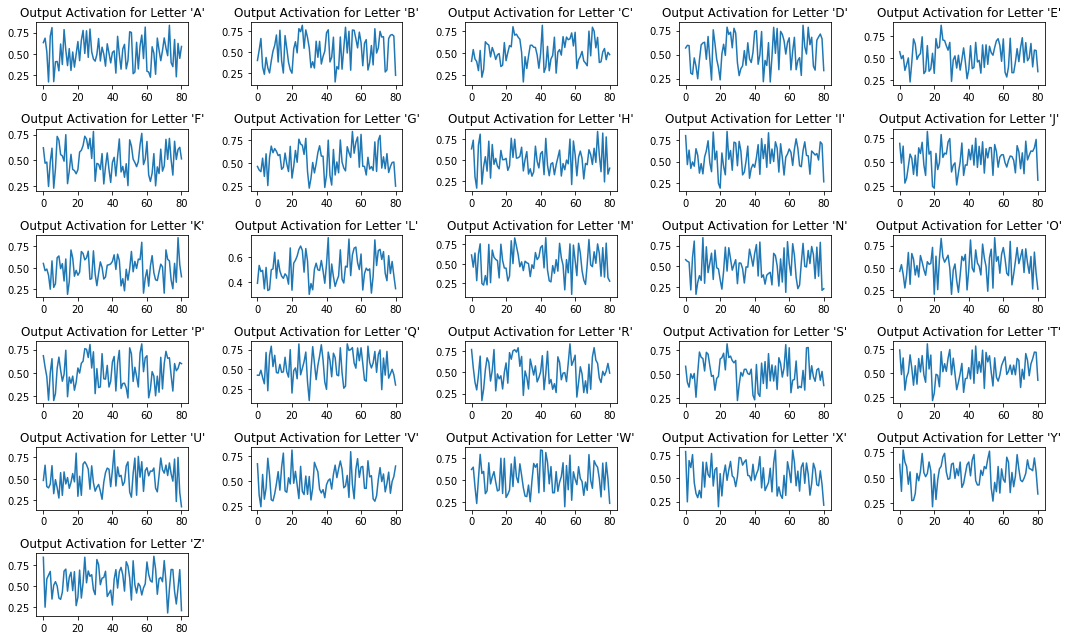

In [323]:
# Create plots to look at the hidden layer activations
print('Figure 3: Output Activation Plots for Each Letter')

fig = plt.figure(figsize=(15,9)) # Create figure, set fig size

for inp,num in zip(layer_outs[0], range(1,27)): # zip together the sliced array and the iteration number
    ax = fig.add_subplot(6,5,num) # Create and add the subplot
    ax.plot(inp) # Plot the subplot
    ax.set_title('Output Activation for Letter %r' %letter_trans.get(num)) # Set plot title, call letter name from dict
    
plt.tight_layout()
plt.show() # Plot entire figure

In [301]:
# Look at the 5 largest and 5 smallest node activation values for each letter.
print('Table 5: Five Strongest and Weakest Activations in a 96 Node Model\n')
print('    5 Strongest        5 Weakest')
for inp,num in zip(layer_outs[0], range(1,27)):
    arr = (-inp).argsort() # negative sign sorts in descending order
    print(letter_trans.get(num),arr[:5],arr[21:26])

Table 5: Five Strongest and Weakest Activations in a 96 Node Model

    5 Strongest        5 Weakest
A [73 20 43 88 50] [66 85 15 69 26]
B [59 29 73 40 10] [34  3 55 67 24]
C [ 9 85 27 59 73] [40 36 28 10 29]
D [73 59 40 24 29] [12 48 22 51 94]
E [59 73 13 29 31] [87 70 48 92  6]
F [73 59 13 78 44] [27 71 76 36 74]
G [85 59 55  9 41] [92 19  3 36 53]
H [78 73 59 89 40] [94 31 88 13 18]
I [73 24 44 59 67] [16 92 52 38 30]
J [73 44 29 59 11] [30 67 52 18 55]
K [59 51 24 94 53] [82  8 52 27 28]
L [41 73 10 25 13] [78 71 92 20  3]
M [89 68 40 73 76] [49 21 41 24 37]
N [78 68 89 73 25] [32  2 57 45 20]
O [59 73 55 41 36] [42 64  9 88 75]
P [13 73 27  9 59] [36  4 23 87 79]
Q [55 59  9 36 73] [38 28 62 19 27]
R [13 59 94 85 27] [76 23 18 21 53]
S [13 59 71 27 73] [41 29 32 86 40]
T [73 44 11 24 12] [38 67 52 16 55]
U [89 25 41 59 78] [21 34 13 37 55]
V [58 88 59 45 60] [48 66 57 44 78]
W [89 25 78 43  5] [88 73 49 41 62]
X [18 52 26 15 93] [ 2 61 74 49 45]
Y [52 18 82 30 24] [56 61  3 84 49]



#### 4.4 Experiement #3 - Investigate Output Layer Node Activity in a Neural Network Model with Only a Few Nodes
***

Similar to Experiment #2, this experiment is focused on visualizing the activations associated with the output layer.  Also, this experiment will consider the strongest activations for each input category will be reviewed to help provide and understanding of the role that the output layer has.  This again will be accomplished by extracting the output layer output values for each input category and graphing them in a visual manner. I suspect that the interpretation of this information will be much closer to a known reference frame, as it should closely resemble the target response variables that are predicted by the model.

Figure 4: Output Layer Node Activation Signatures for Each Letter Input


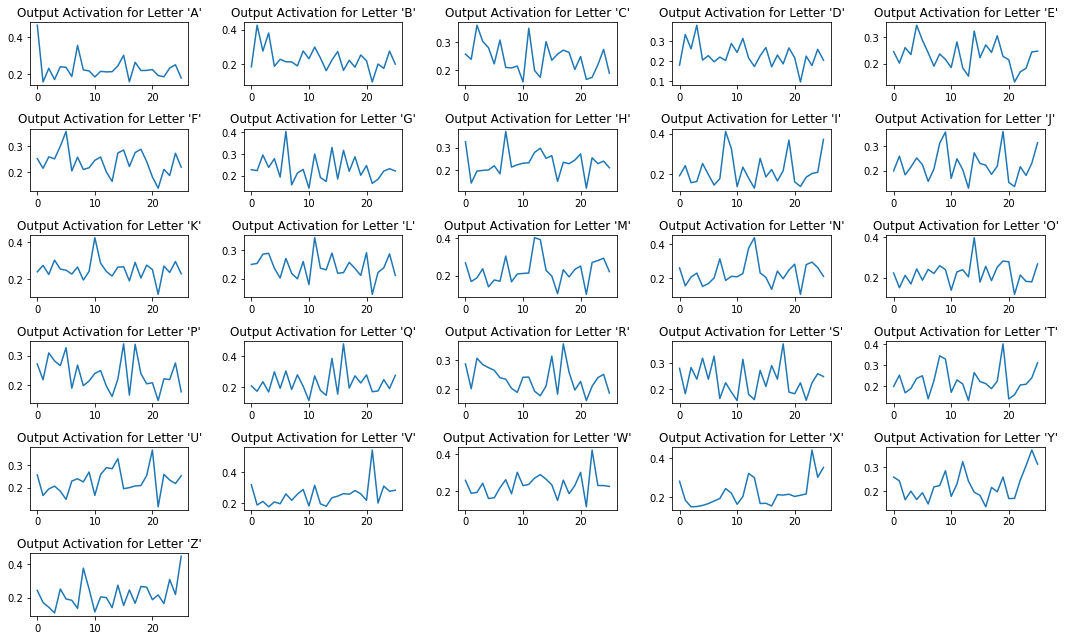

In [324]:
# Create plots to look at the output activations
print('Figure 4: Output Layer Node Activation Signatures for Each Letter Input')

fig = plt.figure(figsize=(15,9)) # Create figure, set fig size

for inp,num in zip(layer_outs[1], range(1,27)): # zip together the sliced array and the iteration number
    ax = fig.add_subplot(6,5,num) # Create and add the subplot
    ax.plot(inp) # Plot the subplot
    ax.set_title('Output Activation for Letter %r' %letter_trans.get(num)) # Set plot title, call letter name from dict
    
plt.tight_layout()
plt.show() # Plot entire figure

In [325]:
# Look at the 5 largest node activation values for each letter.
print('     5 Largest')
for inp,num in zip(layer_outs[1], range(1,27)):
    arr = (-inp).argsort() # negative sign sorts in descending order
    print(letter_trans.get(num),arr[0:5])

     5 Largest
A [ 0  7 15 17 24]
B [ 1  3 11  9  2]
C [ 2 11  6  3 14]
D [ 3  1 11  9 15]
E [ 4 14 18  5 11]
F [ 5  4 18 15 17]
G [ 6 14 16 11  2]
H [ 7  0 13 12 20]
I [ 8 25 19  9 14]
J [19  9 25  8 14]
K [10  3 24 17 11]
L [11 20 14  3 24]
M [12 13  7 24 23]
N [13 12  7 23 20]
O [14 19 20 25  8]
P [15 17  5  2  3]
Q [16 14  6  4  8]
R [17 15  2  0  3]
S [18  6  4 11 16]
T [19  8  9 25 14]
U [20 14 12 13  9]
V [21  0 11 23  9]
W [22  9 20 13 12]
X [23 25 12 24 13]
Y [24 12 25 23  9]
Z [25  8 23 14 18]




#### 4.5 Experiement #4 - Compare Hidden Layer Node Activity Between Layers in a Neural Network Model with Only a Few Nodes
***

The purpose of this experiement is to dive deeper into the activity of the hidden layer and consider how the activations of each node are learning the output data.  To look for potential patterns into what the hidden layer nodes are doing, this experiement will seek to identify common node activations between letters.  To complete this exercise, the hidden layer node outputs for each input category will be compared to the hidden layer node outputs of other input categories, seeking duplicates in node activation.

In [326]:
# Create a matrix of zeros to store duplicate cross-comparison values
dup_matrix = np.zeros((26,26)) 

In [327]:
# Loop through all comparisons to find where duplicates exist, write to matrix
for inp,i in zip(layer_outs[1], range(0,26)):
    for inp2,j in zip(layer_outs[1], range(0,26)):
        arr = (-inp).argsort()
        arr2 = (-inp2).argsort()
        dups = len(set(arr[0:10])&set(arr2[0:10]))
        dup_matrix[i,j] = dups

In [328]:
# Convert the matrix to a dataframe for easy use, view the dataframe
dup_matrix_df = pd.DataFrame(dup_matrix, index=letter_trans.values(), columns=letter_trans.values())
dup_matrix_df

A     B     C     D     E     F     G     H     I     J     K     L  \
A  10.0   3.0   5.0   4.0   6.0   8.0   4.0   5.0   2.0   4.0   4.0   4.0   
B   3.0  10.0   4.0   9.0   3.0   4.0   4.0   4.0   4.0   6.0   7.0   6.0   
C   5.0   4.0  10.0   5.0   7.0   7.0   9.0   2.0   5.0   4.0   4.0   7.0   
D   4.0   9.0   5.0  10.0   3.0   5.0   4.0   3.0   4.0   6.0   8.0   7.0   
E   6.0   3.0   7.0   3.0  10.0   7.0   7.0   3.0   6.0   5.0   2.0   4.0   
F   8.0   4.0   7.0   5.0   7.0  10.0   6.0   4.0   4.0   5.0   5.0   5.0   
G   4.0   4.0   9.0   4.0   7.0   6.0  10.0   3.0   5.0   4.0   3.0   7.0   
H   5.0   4.0   2.0   3.0   3.0   4.0   3.0  10.0   2.0   4.0   5.0   3.0   
I   2.0   4.0   5.0   4.0   6.0   4.0   5.0   2.0  10.0   8.0   3.0   4.0   
J   4.0   6.0   4.0   6.0   5.0   5.0   4.0   4.0   8.0  10.0   5.0   5.0   
K   4.0   7.0   4.0   8.0   2.0   5.0   3.0   5.0   3.0   5.0  10.0   5.0   
L   4.0   6.0   7.0   7.0   4.0   5.0   7.0   3.0   4.0   5.0   5.0  10.0   
M   4.0   4.0   2.0   3.0   2.0   2.0   3.0   8.0   1.0   2.0   5.0   3.0   
N   5.0   3.0   2.0   3.0   2.0   3.0   2.0   8.0   1.0   2.0   5.0   3.0   
O   2.0   2.0   5.0   2.0   5.0   3.0   6.0   3.0   8.0   6.0   1.0   4.0   
P   8.0   5.0   6.0   6.0   6.0   8.0   5.0   4.0   2.0   4.0   6.0   5.0   
Q   3.0   1.0   6.0   1.0   6.0   4.0   7.0   2.0   7.0   5.0   1.0   4.0   
R   7.0   5.0   7.0   6.0   7.0   8.0   6.0   3.0   3.0   4.0   5.0   5.0   
S   5.0   3.0   8.0   3.0   9.0   6.0   8.0   3.0   6.0   5.0   2.0   5.0   
T   4.0   5.0   4.0   5.0   6.0   5.0   4.0   3.0   8.0   9.0   4.0   5.0   
U   2.0   4.0   2.0   3.0   4.0   2.0   3.0   7.0   5.0   5.0   3.0   4.0   
V   3.0   4.0   4.0   4.0   6.0   3.0   4.0   3.0   6.0   5.0   3.0   3.0   
W   4.0   3.0   3.0   3.0   2.0   3.0   3.0   7.0   2.0   2.0   4.0   5.0   
X   3.0   4.0   1.0   3.0   3.0   1.0   1.0   6.0   4.0   5.0   3.0   2.0   
Y   3.0   5.0   1.0   4.0   3.0   1.0   1.0   6.0   4.0   5.0   4.0   3.0   
Z   4.0   2.0   4.0   2.0   6.0   3.0   4.0   3.0   8.0   6.0   1.0   2.0   

      M     N     O     P     Q     R     S     T     U     V     W     X  \
A   4.0   5.0   2.0   8.0   3.0   7.0   5.0   4.0   2.0   3.0   4.0   3.0   
B   4.0   3.0   2.0   5.0   1.0   5.0   3.0   5.0   4.0   4.0   3.0   4.0   
C   2.0   2.0   5.0   6.0   6.0   7.0   8.0   4.0   2.0   4.0   3.0   1.0   
D   3.0   3.0   2.0   6.0   1.0   6.0   3.0   5.0   3.0   4.0   3.0   3.0   
E   2.0   2.0   5.0   6.0   6.0   7.0   9.0   6.0   4.0   6.0   2.0   3.0   
F   2.0   3.0   3.0   8.0   4.0   8.0   6.0   5.0   2.0   3.0   3.0   1.0   
G   3.0   2.0   6.0   5.0   7.0   6.0   8.0   4.0   3.0   4.0   3.0   1.0   
H   8.0   8.0   3.0   4.0   2.0   3.0   3.0   3.0   7.0   3.0   7.0   6.0   
I   1.0   1.0   8.0   2.0   7.0   3.0   6.0   8.0   5.0   6.0   2.0   4.0   
J   2.0   2.0   6.0   4.0   5.0   4.0   5.0   9.0   5.0   5.0   2.0   5.0   
K   5.0   5.0   1.0   6.0   1.0   5.0   2.0   4.0   3.0   3.0   4.0   3.0   
L   3.0   3.0   4.0   5.0   4.0   5.0   5.0   5.0   4.0   3.0   5.0   2.0   
M  10.0   9.0   2.0   4.0   2.0   3.0   2.0   2.0   6.0   4.0   7.0   7.0   
N   9.0  10.0   2.0   4.0   2.0   3.0   2.0   2.0   6.0   4.0   7.0   7.0   
O   2.0   2.0  10.0   1.0   8.0   2.0   6.0   6.0   5.0   5.0   3.0   4.0   
P   4.0   4.0   1.0  10.0   2.0   9.0   5.0   4.0   2.0   3.0   4.0   2.0   
Q   2.0   2.0   8.0   2.0  10.0   3.0   7.0   5.0   4.0   5.0   2.0   3.0   
R   3.0   3.0   2.0   9.0   3.0  10.0   6.0   4.0   2.0   4.0   3.0   2.0   
S   2.0   2.0   6.0   5.0   7.0   6.0  10.0   5.0   4.0   6.0   2.0   3.0   
T   2.0   2.0   6.0   4.0   5.0   4.0   5.0  10.0   5.0   5.0   2.0   5.0   
U   6.0   6.0   5.0   2.0   4.0   2.0   4.0   5.0  10.0   5.0   7.0   7.0   
V   4.0   4.0   5.0   3.0   5.0   4.0   6.0   5.0   5.0  10.0   2.0   6.0   
W   7.0   7.0   3.0   4.0   2.0   3.0   2.0   2.0   7.0   2.0  10.0   5.0   
X   7.0   7.0   4.0   2.0   3.0   2.0   3.0   5.0   7.0   6.0   5.0  10.0   
Y

Figure 5: Node Activation Comparison Heat Map


Text(0.5, 1.0, 'Node Activation Comparison Heat Map')

<Figure size 432x288 with 0 Axes>

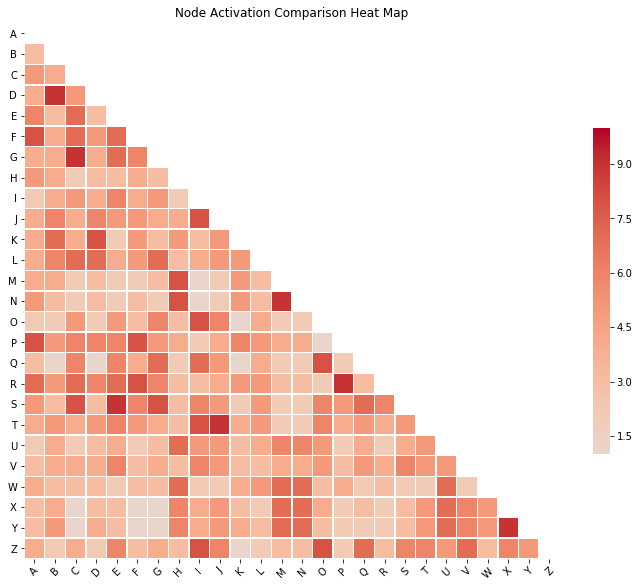

In [329]:
# Create a heat map to identify where letters experience common hidden layer node activation.
print('Figure 5: Node Activation Comparison Heat Map')

top = np.zeros_like(dup_matrix_df, dtype=np.bool)
    
#This numpy function returns the indices from the upper triangle of an array and sets them to TRUE for use as a mask. 
top[np.triu_indices_from(top)] = True

#Establish a Matlib (plt) figure container
fig=plt.figure()

#Build figure parameters
fig, ax = plt.subplots(figsize=(12,12))

#Define the seaborn heatmap function.  We will plot the passed correlation.  
#We will use the mask "top" we just built.
#We will use a color map of coolwarm.     
sns.heatmap(dup_matrix_df, mask=top, cmap='coolwarm',  
    center = 0, square=True,  #Center location and shape = square.
    linewidths=.5, cbar_kws={'shrink':.5}) #linewidth and colorbar parameters set.
    #annot = True, annot_kws={'size': 9}, fmt = '.3f') #Annotation and annotation parameters, 3 decimals.       
plt.xticks(rotation=45) # rotate variable labels on columns (x axis) 
plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
plt.title('Node Activation Comparison Heat Map')   #title



#### 4.6 Experiement #5 - Plot Hidden Layer Node Outputs as Images in a Neural Network Model with Only a Few Nodes
***

Past exeriments have focused on visualizing the data in a way that is similar to how the neural networks interpret the data, meaning that it is very flat and linear.  Since this is not the way that humans best visualize an image, this experiment is focused on trying to convert the output of the hidden layer back into an image, similar to where this project started.  This will be done by taking the hidden layer output for each input category and reshaping it into a grid which can be plotted as an image.  The intent of this experiement will be to find if there are any visual indicators as to what the hidden layer has learned.

In [330]:
# Need to create a new NN to easily create an output image.  Looking for a perfect sqaure number of nodes.
model_id = 149.3
node = 81
act = 'sigmoid'
out_act = 'sigmoid'
l = 'categorical_crossentropy'
opt = 'adagrad'
num_epochs = 10 # A few extra compared to what is needed just in case

In [331]:
start_time = time.clock() # start timer to evaluate how long it takes to train this base model

# Set seeds for reproducible results
seed(1)
set_random_seed(2)
rn.seed(3)

# Create Model
model = Sequential()
model.add(Dense(node, input_dim=81, activation=act, name='hidden_layer'))
model.add(Dense(26, activation=out_act, name='output_layer'))

model.compile(loss=l,
              optimizer=opt,
              metrics=['categorical_accuracy'])

# Fit the model and create a histry for evaluation
history = model.fit(X_train, y_train, epochs=num_epochs, verbose=0)

end_time = time.clock() # end timer
runtime = end_time - start_time  # seconds of wall-clock time 
print("\nProcessing time (seconds): %f" % runtime)  # print process time to train model 

# Identify and print maximum accuracy and epoch where that accuracy was realized
epoch_max = np.argmax(history.history['categorical_accuracy'])
acc_max = max(history.history['categorical_accuracy'])
print('Maxium Accuarcy: %r, Epochs Required to Achieve this Accuracy: %r' %(acc_max, epoch_max))


Processing time (seconds): 4.859353
Maxium Accuarcy: 0.9230769276618958, Epochs Required to Achieve this Accuracy: 9


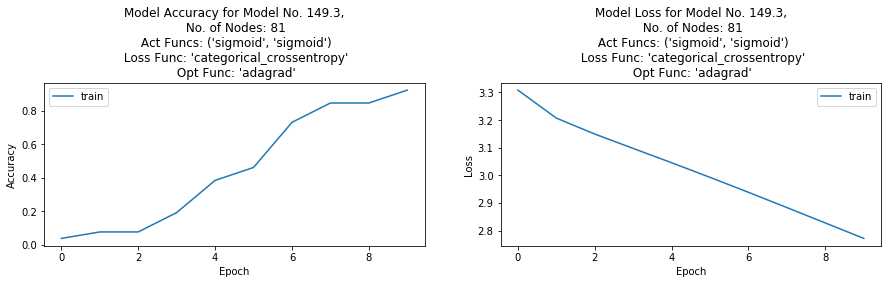

In [332]:
plot_figs('categorical_accuracy', 'loss', model_id, node, act, out_act, l, opt)

In [333]:
# Take a look at the outputs for each node.
inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functor = K.function([inp, K.learning_phase()], outputs )   # evaluation function

# Testing
layer_outs = functor([X_train, 1.])
print(layer_outs)

[array([[0.63150215, 0.68372416, 0.5253228 , ..., 0.6223704 , 0.44677442,
        0.5861599 ],
       [0.40190503, 0.5264323 , 0.66523695, ..., 0.7128769 , 0.6942606 ,
        0.22410378],
       [0.40713853, 0.540684  , 0.43386522, ..., 0.42562574, 0.5086773 ,
        0.48302144],
       ...,
       [0.7897452 , 0.24635312, 0.6923459 , ..., 0.58195794, 0.43401405,
        0.2104997 ],
       [0.6313238 , 0.36741447, 0.7718996 , ..., 0.69423866, 0.5572124 ,
        0.34138545],
       [0.8391092 , 0.24973759, 0.5831589 , ..., 0.47688976, 0.6927195 ,
        0.20882922]], dtype=float32), array([[0.4627932 , 0.15630203, 0.22984964, 0.16942015, 0.23834231,
        0.2355493 , 0.18566647, 0.3536653 , 0.22153494, 0.21596459,
        0.18338853, 0.2136308 , 0.21068054, 0.21179423, 0.24327338,
        0.30045217, 0.15718651, 0.26262808, 0.21799555, 0.21867424,
        0.22337183, 0.19112489, 0.1842907 , 0.23135471, 0.24942064,
        0.1777784 ],
       [0.18635008, 0.4250865 , 0.27679247, 0

Figure 6: Hidden Layer Activations Plotted as Images


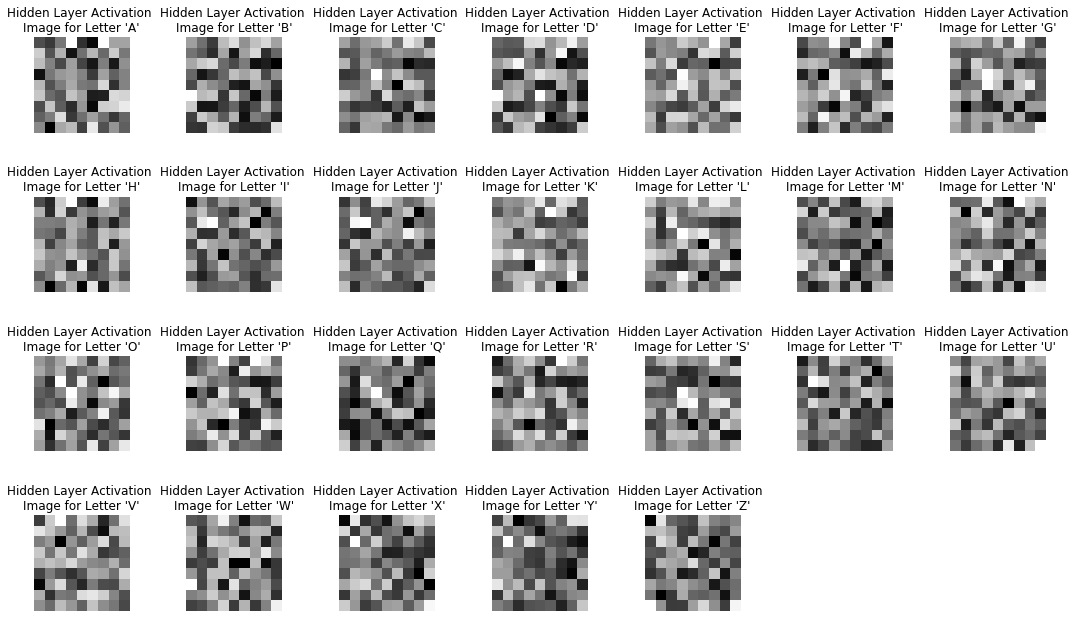

In [334]:
# Plot the activations of each node after inpur for each letter
print('Figure 6: Hidden Layer Activations Plotted as Images')

fig = plt.figure(figsize=(15,9)) # Create figure, set fig size

for inp,num in zip(layer_outs[0], range(1,27)): # zip together the sliced array and the iteration number
    ax = fig.add_subplot(4,7,num)
    image = inp.reshape(9, 9)
    ax.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    ax.axis("off")
    ax.set_title('Hidden Layer Activation \nImage for Letter %r' %letter_trans.get(num)) # Set plot title, call letter name from 
    
plt.tight_layout()
plt.show()

### 5.0 Results
***

#### 5.1 EDA Results
***

In the EDA, the provided dataset proved to be a complete file of 26 observations, each representing a letter of the English alphabet.  Each observation consisted of 82 features, where 81 of them were binary pixel values and the last one being the target variable, or the letter that it represented.  No values were missing from the dataset, and the statistical summary  of the data shown in Table 1 indicated that pixel distribution amongst of the entire dataset was not uniform.

Reshaping each observation and plotting as an image provided clear representations of each letter.  This visualization provides a good baseline and understanding of how humans see the output (reshaped to a grid) opposed to how the neural network will see the data (81 input features).

#### 5.2 Experiment #1 Results
***

Due to the large number of components that were evaluated in all possible combinations, the resulting Table 2 includes 179 different models. This comprehensive table provides plenty of data to make some general observations about how how the dataset can be modeled, and provides information to meet objectives 1, 2, and 3 of this project.

Beginning with the number of nodes in the hidden layer, Table 2 and Table 3 clearly provides a method for using the "Nodes" and "Maximum Accuracy" column for evaluating the impact that varying layer sizes has.  Models with only 2 nodes in their hidden layer are not able to achieve a perfect accuracy with the 5,000 epochs, but as additional nodes are added to the layer, an increasing number of perfect models are achieved.  Specifially, for hidden layers with 4, 8, 32, and 96 nodes, there are 5, 17, 28, and 30 perfect models.  Additionally, by looking at the "No. of Epochs to Max Acc." column, it can be seen that as the number of nodes in the hidden layer increases, the number of epochs needed to train a perfect model decreases for the majority of model combinations.

In reviewing the hidden layer activation function, it can be seen in the models with perfect accuracy shown in Table 3 suggest that with a small number of nodes, the relu activation is the most effective.  The tanh function appears in one perfect 4-node model, but the sigmoid activation function does not appear at all.  It isn't until the models that have 8 nodes in the hidden layer that the sigmoid function can provide a perfect model.  As the number of nodes increases in the model, it looks like the activation function plays less of a deciding role in training a perfect model, as all three activation functions appear more equally in models with 32 and 96 nodes.  Similarly, the output layer activation function appears to play a significant role in smaller node networks with the softmax function being the only successful activation function in the 4 node network, and by far the most successful function in the 8 node network.  As the number of nodes increases, the sigmoid and softmax functions become equal.

The loss function does not appear to affect results to a great degree, as there is a good balance between the mean squared error and categorical crossentorpy functions in all network sizes.

The optimization function appears to have a significant impact in the ability of the model to learn from input data and create a perfect accuracy.  This makes sense since the optimization function is the primary mechanism to allow the model to complete an optimized method for bacpropogation.  The AdaGrad and ADAM optimization functions appear to be the best options since they appear in an approximately equal number of successful models.  AdaGrad does appear to provide a quicker solution shown by the smaller number of epochs needed to find the optimal model weights.  As for SDG, this optimizer does not appear to be as successful, as it appears in only a few models, and where it does yeild a perfect model, it takes signifiantly more epochs to train.


#### 5.3 Experiment #2 Results
***

After selecting a successful model that uses 96 nodes, the hidden layer weights and biases were able to be extracted and reviewed using the model.get_weights() function.  These weights appear to to have a range of -0.25 to 0.25, and appear to fluctuate with each node.  This is shown in Figure 2.  This is what would be expected, as the connection weights with each node are trained individually in each iteration of backpropogation, and will result in slightly different values.  This indicates that each of the 96 nodes in the hidden layer learns a slightly different representation of the 81 inputs, providing the model with 96 new representations of the input data. Because of the nature of randomly generated wieghts at the initiation of the network, there does not appear to be any patterns that exists between nodes or weights within a single node.

Another item that was reviewed was the activity of the nodes in the hidden layer.  By extracting the outputs from the hidden layer, it was possible to get an understanding of what this hidden layer was actually doing with every observation input.  Figure 3 shows how each of the 96 nodes is activated for each observation and provides insight into what information is being passed to the output layer for prediction.  Moreso than the weights of the hidden layer, I found this to be informative in explaining more tangibly what the model was actually doing once trained.  I found it interesting that the hidden layer node activation signatures of similarly shaped letters were more similar than letters with differing shapes.  For example, looking at the activation signature for a I and a J shows similarities, both differing significantly from an H activation signature.  With similar nodes activating with these similar shaped letters, it suggests that the hidden layer is identifying letters with similar features, not necessarily the letter itself.  To support this, I looked at the 5 nodes with the strongest activations and the 5 weakest activations in Table 5.  Looking at similar letters such and I and J show that these letters share three of these top 5 nodes, however the letter H has only 1 shared top five node activation.

#### 5.4 Experiment #3 Results
***

While not directly supporting the objectives of this project, Experiment #3 did provide some insight into how the output layer is working.  In Figure 4, each letter input provides a different output layer activation, and as expected, the largest spike in these graphs correlate to the number associated to the input letter.  What is interesting here is that there are several other spikes or strong node activations in these outputs, suggesting some letters are recognized by the model in a very similar way. Taking the letters I and J again, the output signal sees these as very similar but different letters, separated almost entirely by a single output activation.  Comparing the output activation from an H in comparison shows a much different node signature.

#### 5.5 Experiment #4 Results
***

Returning to the activations of the hidden layer, Experiment #4 shows a heat map that correlates dupliate hidden layer activation nodes.  What makes this Figure 5 informative is that the correlation is showing what letters share similar node activiations in the their top 10 hidden layer nodes.  This helps to convey the similarity in how the neural network is seeing each letter.  Some notable similarities are again the letters I and J, but this heatmap also suggests the following letter pairs have strong similarities: D and B, N and M, P and R, N and W, T and J, and Y and X.  This points to similarieis in linear edges of each letter such as the vertical line in I and J, diagnol lines in Y and X, vertical and diagnol lines in N and W, and rounded lines in P and R.

#### 5.6 Experiment #4 Results
***

In continuing to focus on the output of the hidden layer rather than the wieghts, Experiment #5 focused on attempting to visualize the outputs of of the hidden layer in the way that a human would see the data.  The results of this exercise shown in Figure 6 did not yeild an image of a letter or any specific patterns as I anticipated it would.  Instead, the outputs from the hidden layer appear to be a random image of varying pixel darknesses.  Upon further consideration, this is most likely due to the random nature with which each node and their respective weights are initialized, causing any patterns that exist to be identified in a more scattered fashion than the visual fashion in how humans would observe the data.  This is fine, however, as the neural network uses the output layer to interpret the patterns that are found into a final prediction.

When considering similar letters, it is again evident that their respective images are similar.  Taking our example of the letters I and J again, their images have dark pixels in extremely similar positions, as well as light pixels in similar positions.  This suggests that the neural network is "seeing" these letters as very similar, which we as humans can confirm with our vision.

### 6.0 Conclusions
***

In conclusion, there are a wide variety of tools and components that are available in building neural networks, and each dataset and desired outcome will require a different combination of these.  When developing a neural network for a customer, it is important to fully understand the problem and test a variety of combinations to identify the ideal solution to the problem, considering factors such as data availability, speed of training, desired accuracy, and production usage.  In a classification problem such as the one we saw in this project, it is recommended to use a categorical cross entropy loss to tune the model to provide accurate categorical results.

In addition to providing guidance on how to develop and train a neural network for a potential future project, this exercise helped to provide insight into what the nodes in a hidden layer are responding to.  The experiments conducted suggest that these nodes and the weights controlling their activation learn from the data inputs and backpropagation to create new representations of the data.  These representations provide patterns in the data, seen by humans as pixels, that the model can identify and associate to a target output response.  These patterns appear to be general edges in the letter images such as horizontal, vertical, and diagonal lines. 
